# An Introduction to Probability and Simulation

Following [An Introduction to Probability and Simulation by Kevin Ross](https://bookdown.org/kevin_davisross/probsim-book/).

In [2]:
from symbulate import *
%matplotlib inline

### 1.2 Interpretations of probability

If three fair six-sided dice are rolled, what is more likely: a sum of 9 or a sum of 10?

Text(0, 0.5, 'Number of sets of 3 rolls')

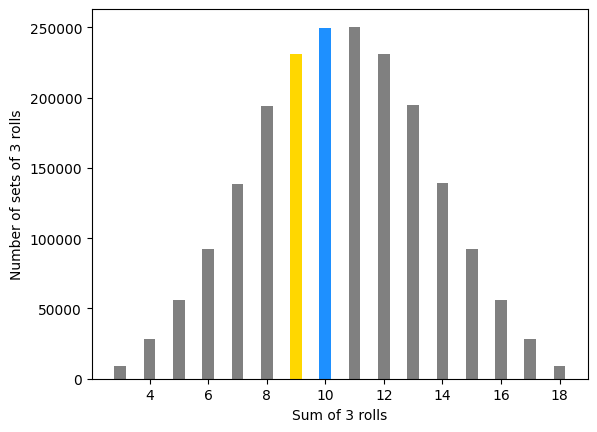

In [2]:
import numpy as np
import matplotlib.pyplot as plt
results = np.zeros(16)
num_rolls = 2000000
rng = np.random.default_rng()

for i in range(num_rolls):
    roll1 = rng.integers(1, 7)
    roll2 = rng.integers(1, 7)
    roll3 = rng.integers(1, 7)
    roll_sum = roll1 + roll2 + roll3
    results[roll_sum-3] += 1

categories = np.arange(3, 19, 1)
colors = ['gray' if c != 9 and c!= 10 else 'gold' if c == 9 else 'dodgerblue' for c in categories]
plt.bar(categories, results, width=0.4, color=colors)
plt.xlabel("Sum of 3 rolls")
plt.ylabel("Number of sets of 3 rolls")

How does the running proportion of coin flips that result in a head change?

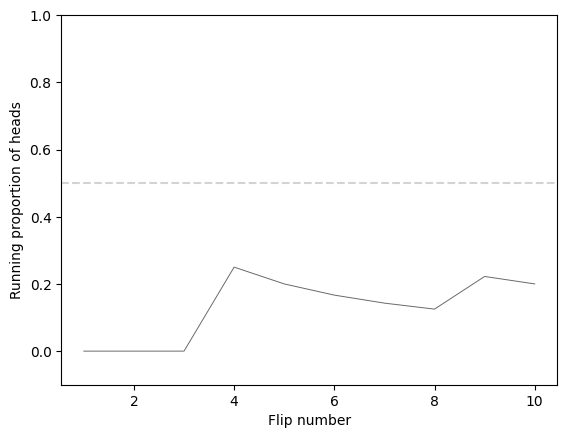

<Axes: xlabel='Flip number', ylabel='Running proportion of heads'>

In [3]:
def coin_flip_simulation(total_rolls, axis=None):
    num_total = total_rolls
    num_rolls = 0
    num_heads = 0
    proportions = []
    rng = np.random.default_rng()
    
    for i in range(num_total):
        num_rolls += 1
        result = rng.integers(0, 2)
        if result != 0:
            num_heads += 1
        proportion = num_heads / num_rolls
        proportions.append(proportion)
    
    plt.plot(np.arange(1, num_total + 1), proportions, linewidth=0.7, color="dimgray")
    ax = plt.gca()
    if axis is None:
        plt.xlabel("Flip number")
        plt.ylabel("Running proportion of heads")
        plt.axhline(y=0.5, color='lightgray', linestyle='--')
        plt.ylim(-0.1, 1)
        plt.show()
    return ax

coin_flip_simulation(10)

In [4]:
coin_flip_simulation(100)

<Axes: xlabel='Flip number', ylabel='Running proportion of heads'>

In [5]:
coin_flip_simulation(1000)

<Axes: xlabel='Flip number', ylabel='Running proportion of heads'>

### 2.5 Introduction to Simulation

Define probability space for simulating the 16 equally likely ordered pairs of rolls via a box model:

In [6]:
P = BoxModel([1, 2, 3, 4], size = 2, replace = True)

Simulate 1 repetition of probability space:

In [7]:
P.sim(1)

Index Result
0     (4, 3)

Simulate 10 repetitions:

In [8]:
P.sim(10)

Index Result
0     (1, 4)
1     (2, 4)
2     (2, 3)
3     (4, 1)
4     (3, 3)
5     (3, 4)
6     (3, 2)
7     (4, 3)
8     (2, 4)
9     (3, 2)

Define random variables such that X is the sum of the two dice rolls and Y is the larger roll:

In [9]:
X = RV(P, sum)
Y = RV(P, max)

Simulate 10 repetitions:

In [10]:
x = X.sim(100)
x

Index Result
0     6
1     8
2     4
3     4
4     6
5     5
6     5
7     5
8     7
..    .
99    4

Simulate 10 pairs of values:

In [11]:
x_and_y = (X & Y).sim(10)

x_and_y

Index Result
0     (3, 2)
1     (4, 2)
2     (3, 2)
3     (3, 2)
4     (5, 3)
5     (3, 2)
6     (6, 4)
7     (5, 3)
8     (4, 3)
9     (7, 4)

Define identity random variable:

In [12]:
U = RV(P)

U.sim(10)

Index Result
0     (3, 3)
1     (4, 1)
2     (2, 4)
3     (2, 3)
4     (2, 3)
5     (4, 1)
6     (3, 1)
7     (4, 2)
8     (2, 1)
9     (1, 4)

Simulate and display outcomes and X and Y:

In [13]:
(U & X & Y).sim(10)

Index Result
0     ((4, 2), 6, 4)
1     ((3, 2), 5, 3)
2     ((1, 3), 4, 3)
3     ((2, 2), 4, 2)
4     ((1, 4), 5, 4)
5     ((1, 4), 5, 4)
6     ((2, 1), 3, 2)
7     ((3, 4), 7, 4)
8     ((3, 3), 6, 3)
9     ((1, 2), 3, 2)

Unpack dice rolls:

In [14]:
U1, U2 = RV(P)
(U1 & U2 & X & Y).sim(10)

Index Result
0     (4, 1, 5, 4)
1     (4, 3, 7, 4)
2     (4, 3, 7, 4)
3     (1, 2, 3, 2)
4     (1, 3, 4, 3)
5     (3, 2, 5, 3)
6     (4, 1, 5, 4)
7     (2, 2, 4, 2)
8     (4, 4, 8, 4)
9     (1, 3, 4, 3)

Define the event that the larger of the two rolls is less than 3:

In [15]:
A = (Y < 3)

Simulate event:

In [16]:
A.sim(10)

Index Result
0     False
1     False
2     False
3     False
4     True
5     False
6     False
7     False
8     False
9     False

Define and simulate event that larger roll is exactly 3:

In [17]:
(Y == 3).sim(10)

Index Result
0     False
1     True
2     False
3     True
4     True
5     False
6     False
7     False
8     False
9     False

Define and simulate $X^2$:

In [18]:
(X ** 2).sim(10)

Index Result
0     36
1     49
2     49
3     25
4     49
5     9
6     16
7     9
8     36
9     36

Define and simulate $e^X$:

In [19]:
(X & exp(X)).sim(10)

Index Result
0     (6, 403.4287934927351)
1     (3, 20.085536923187668)
2     (4, 54.598150033144236)
3     (5, 148.4131591025766)
4     (3, 20.085536923187668)
5     (8, 2980.9579870417283)
6     (5, 148.4131591025766)
7     (5, 148.4131591025766)
8     (5, 148.4131591025766)
9     (5, 148.4131591025766)

Define and simulate a user-defined function:

In [20]:
def g(u):
  return (u - 5) ** 2
  
Z = X.apply(g)

(X & Z).sim(10)

Index Result
0     (5, 0)
1     (7, 4)
2     (6, 1)
3     (5, 0)
4     (4, 1)
5     (4, 1)
6     (5, 0)
7     (3, 4)
8     (3, 4)
9     (8, 9)

Define and simulate XY:

In [21]:
(X * Y).sim(10)

Index Result
0     24
1     2
2     24
3     24
4     20
5     28
6     8
7     20
8     6
9     24

Define and simulate the sum using each individual roll:

In [22]:
X = U1 + U2

X.sim(10)

Index Result
0     6
1     6
2     5
3     5
4     2
5     5
6     6
7     4
8     8
9     5

Define and simulate the maximum using each roll:

In [23]:
Y  = (U1 & U2).apply(max)

Y.sim(10)

Index Result
0     3
1     3
2     4
3     4
4     4
5     3
6     2
7     4
8     3
9     4

Define and simulate weighted die:

In [24]:
WeightedRoll = BoxModel([1, 2, 3, 4], probs = [0.1, 0.2, 0.3, 0.4])
WeightedRoll.sim(10)

Index Result
0     4
1     4
2     4
3     2
4     4
5     2
6     2
7     4
8     4
9     3

Define and simulate two rolls of the weighted die:

In [25]:
Q = BoxModel([1, 2, 3, 4], probs = [0.1, 0.2, 0.3, 0.4]) ** 2
Q.sim(10)

Index Result
0     (3, 3)
1     (4, 4)
2     (2, 3)
3     (2, 3)
4     (4, 4)
5     (2, 2)
6     (3, 4)
7     (3, 4)
8     (2, 1)
9     (4, 4)

Simulate one roll of a fair die and one roll of the weighted die:

In [26]:
MixedRolls = BoxModel([1, 2, 3, 4]) * BoxModel([1, 2, 3, 4], probs = [0.1, 0.2, 0.3, 0.4])
MixedRolls.sim(10)

Index Result
0     (1, 1)
1     (1, 4)
2     (4, 2)
3     (2, 3)
4     (4, 4)
5     (2, 4)
6     (3, 4)
7     (1, 4)
8     (3, 3)
9     (3, 4)

Define and simulate randomly selecting labeled tickets:

In [27]:
Q = BoxModel({1: 4, 2: 6, 3: 3, 4: 2})
Q.sim(10)

Index Result
0     2
1     1
2     2
3     2
4     4
5     2
6     4
7     2
8     2
9     2

Define and simulate two rolls of a die with a discrete uniform model:

In [28]:
P = DiscreteUniform(1, 4) ** 2
P.sim(10)

Index Result
0     (4, 2)
1     (1, 4)
2     (3, 4)
3     (3, 4)
4     (2, 1)
5     (3, 2)
6     (1, 2)
7     (2, 4)
8     (3, 4)
9     (2, 4)

#### 2.5.3 Computer simulation: Meeting problem

Arriving uniformly at random between time 0 and 60, independently of each other:

In [29]:
P = Uniform(0, 60) ** 2
P.sim(10)

R, Y = RV(P)
(R & Y).sim(10)

W = abs(R - Y)

T = (R & Y).apply(min)

(R & Y & T & W).sim(10)

Index Result
0     (22.867615308080733, 1.483089725305955, 1.483089725305955, 21.384525582774778)
1     (19.16826288592246, 37.344359028020634, 19.16826288592246, 18.176096142098174)
2     (55.047497382939255, 39.0181762889165, 39.0181762889165, 16.029321094022755)
3     (17.287755779825456, 51.123998813159446, 17.287755779825456, 33.836243033333986)
4     (17.702328719446864, 44.11906426353303, 17.702328719446864, 26.41673554408617)
5     (2.697217379416803, 36.36636839121801, 2.697217379416803, 33.669151011801205)
6     (23.84544154131175, 47.85505302723814, 23.84544154131175, 24.009611485926392)
7     (8.050228540890918, 23.700326163273186, 8.050228540890918, 15.650097622382267)
8     (28.270998179551373, 27.46370914088093, 27.46370914088093, 0.8072890386704437)
9     (3.8726401198158533, 12.113680315631129, 3.8726401198158533, 8.241040195815275)

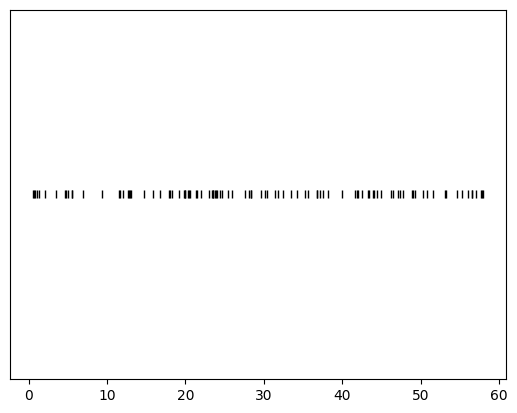

In [30]:
R.sim(100).plot('rug')

In [31]:
(R & Y).sim(1000).plot()

Modeling that Regina is more likely to arrive around 12:30 than around 12:00 or 1:00:

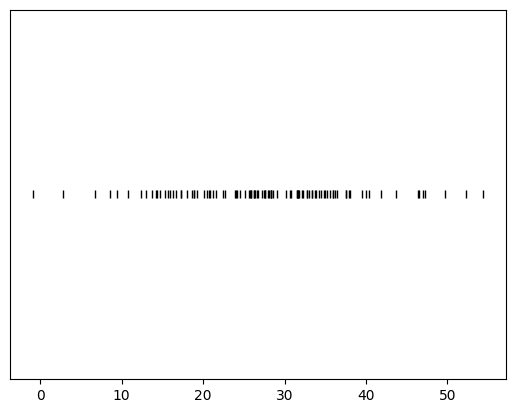

In [32]:
Normal(mean = 30, sd = 10).sim(10)

P = Normal(mean = 30, sd = 10) ** 2
P.sim(10)

R, Y = RV(P)

R.sim(100).plot('rug')

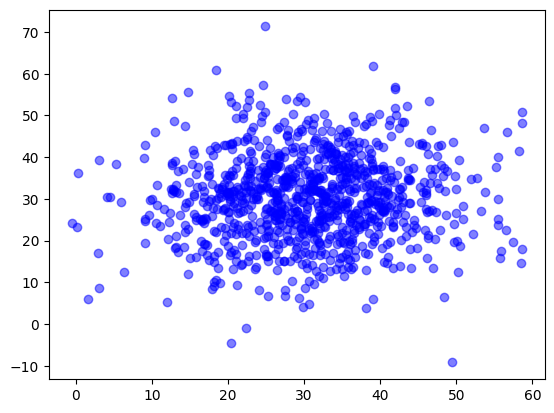

In [33]:
(R & Y).sim(1000).plot()

Modeling that Regina and Cady tend to arrive at the same time:

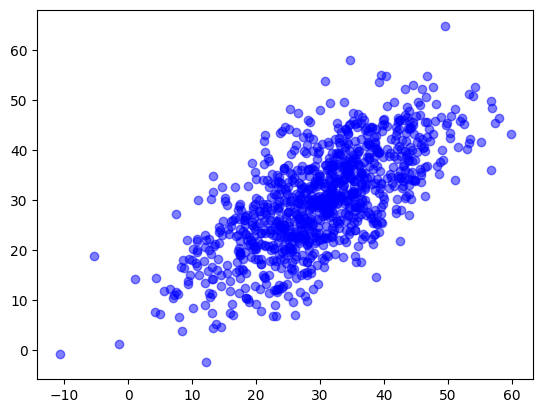

In [34]:
P = BivariateNormal(mean1 = 30, sd1 = 10, mean2 = 30, sd2 = 10, corr = 0.7)
P.sim(10)

R, Y = RV(P)

(R & Y).sim(1000).plot()

#### 2.6.1 A few Symbulate commands for summarizing simulation output

Rolling a fair die twice:

In [35]:
P = DiscreteUniform(1, 4) ** 2

X = RV(P, sum)

Y = RV(P, max)

x = X.sim(10)
x # displays the simulated values

Index Result
0     4
1     5
2     2
3     5
4     7
5     2
6     4
7     4
8     4
9     5

Count the number of 6 rolls:

In [36]:
x.count_eq(6)

0

Find the relative frequency:

In [37]:
x.count_eq(6) / 10

0.0

Tabulate frequencies:

In [38]:
x.tabulate()

Value Frequency
2     2
4     4
5     3
7     1
Total 10

Tabulate relative frequencies:

In [39]:
x.tabulate(normalize = True)

Value Relative Frequency
2     0.2
4     0.4
5     0.3
7     0.1
Total 1.0

Simulate and tabulte 10000 rolls:

In [40]:
x = X.sim(10000)

x.tabulate(normalize = True)

Value Relative Frequency
2     0.0646
3     0.1196
4     0.191
5     0.2511
6     0.1923
7     0.1209
8     0.0605
Total 1.0

Create an impulse plot:

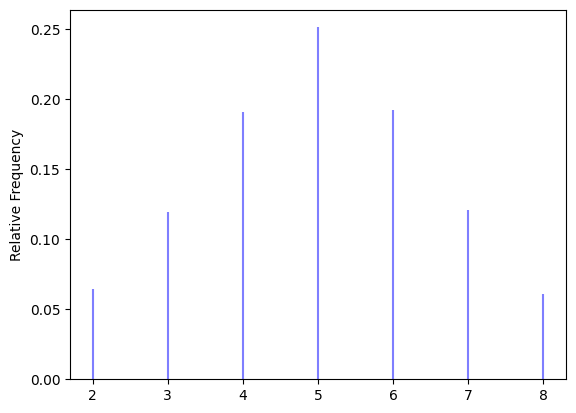

In [41]:
x.plot()

Simulate X and Y pairs:

In [42]:
x_and_y = (X & Y).sim(10)
x_and_y 

Index Result
0     (5, 3)
1     (7, 4)
2     (5, 3)
3     (4, 2)
4     (7, 4)
5     (5, 3)
6     (7, 4)
7     (4, 3)
8     (2, 1)
9     (5, 3)

Tabulate values:

In [43]:
x_and_y.tabulate()

Value  Frequency
(2, 1) 1
(4, 2) 1
(4, 3) 1
(5, 3) 4
(7, 4) 3
 Total 10

Tabulate relative frequencies:

In [44]:
x_and_y.tabulate(normalize = True)

Value  Relative Frequency
(2, 1) 0.1
(4, 2) 0.1
(4, 3) 0.1
(5, 3) 0.4
(7, 4) 0.3
 Total 1.0

Create a scatter plot:

In [45]:
x_and_y.plot()

In [46]:
x_and_y.plot(jitter = True)

Create a tile plot:

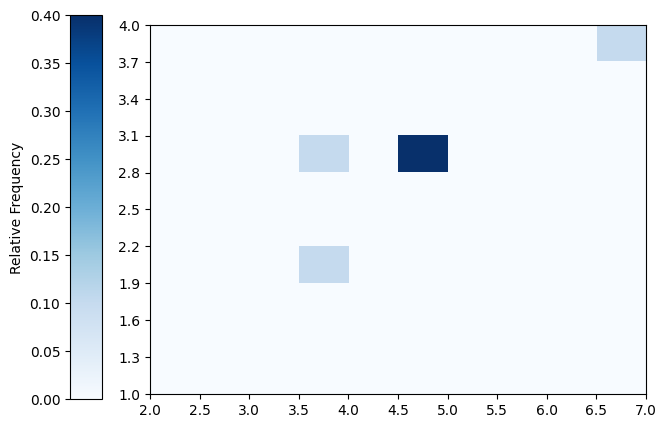

In [47]:
x_and_y.plot('tile')

Define the event of X < 6 and Y >= 2:

In [48]:
def is_x_lt_6_and_y_ge_2(u):
  if u[0] < 6 and u[1] >= 2:
    return True
  else:
    return False

Find the relative frequency:

In [49]:
x_and_y.count(is_x_lt_6_and_y_ge_2) / x_and_y.count()

0.6

Using indicators:

In [50]:
((x_and_y[0] < 6) * (x_and_y[1] >= 2)).count_eq(True) / x_and_y.count()

0.6

Simulate and tabulate 10000 pairs:

In [51]:
x_and_y = (X & Y).sim(10000)

x_and_y.tabulate()

Value  Frequency
(2, 1) 616
(3, 2) 1260
(4, 2) 618
(4, 3) 1234
(5, 3) 1274
(5, 4) 1284
(6, 3) 615
(6, 4) 1236
(7, 4) 1302
(8, 4) 561
 Total 10000

Tabulate relative frequencies:

In [52]:
x_and_y.tabulate(normalize = True)

Value  Relative Frequency
(2, 1) 0.0616
(3, 2) 0.126
(4, 2) 0.0618
(4, 3) 0.1234
(5, 3) 0.1274
(5, 4) 0.1284
(6, 3) 0.0615
(6, 4) 0.1236
(7, 4) 0.1302
(8, 4) 0.0561
 Total 1.0

Create a scatter plot with jittering:

In [53]:
x_and_y.plot(jitter = True)

Create a tile plot:

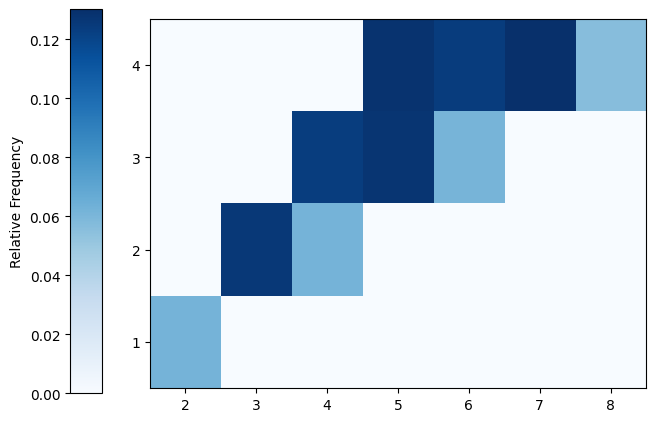

In [54]:
x_and_y.plot('tile')

Find the relative frequency of the event:

In [55]:
x_and_y.count(is_x_lt_6_and_y_ge_2) / x_and_y.count()

0.567

#### Example 2.31

Under the uniform model:

In [56]:
P = Uniform(0, 60) ** 2
R, Y = RV(P)

W = abs(R - Y)

w = W.sim(10000)

w.count_lt(15) / w.count()

0.4319

Under the normal model:

In [57]:
P = Normal(30, 10) ** 2
R, Y = RV(P)

W = abs(R - Y)

w = W.sim(10000)

w.count_lt(15) / w.count()

0.7113

Under the bivariate normal model:

In [58]:
P = BivariateNormal(mean1 = 30, sd1 = 10, mean2 = 30, sd2 = 10, corr = 0.7)
R, Y = RV(P)

W = abs(R - Y)

w = W.sim(10000)

w.count_lt(15) / w.count()

0.9483

#### 2.6.3 A closer look at margin of error

Estimate the probability that the sum of two rolls of a fair four-sided die equals six (the true probability is 0.1875):

In [59]:
N = 100
P = BoxModel([1, 2, 3, 4], size = 2).apply(sum) ** N
P.sim(5)

Index Result
0     (4, 4, 6, 6, 5, ..., 2)
1     (7, 5, 6, 6, 7, ..., 5)
2     (3, 4, 3, 4, 7, ..., 3)
3     (2, 3, 5, 6, 3, ..., 3)
4     (3, 6, 8, 5, 2, ..., 7)

In [60]:
phat = RV(P, count_eq(6)) / N
phat.sim(5)

Index Result
0     0.19
1     0.25
2     0.2
3     0.2
4     0.11

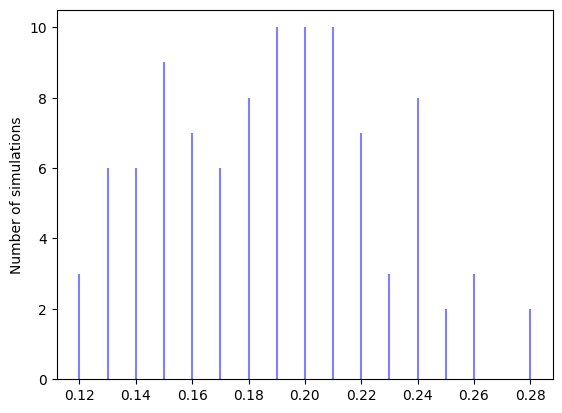

In [61]:
plt.figure()
phat.sim(100).plot(type = "impulse", normalize = False)
plt.ylabel('Number of simulations');
plt.show()

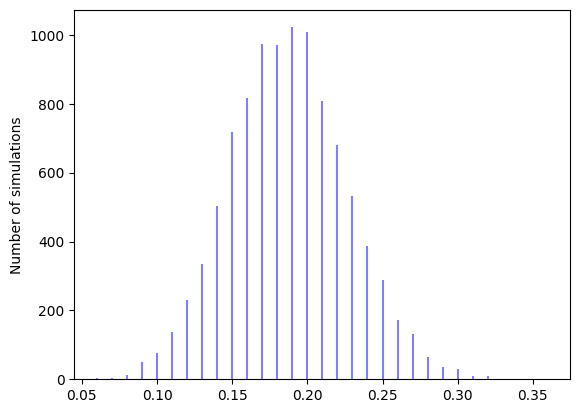

In [62]:
plt.figure()
phats = phat.sim(10000)
phats.plot(type = "impulse", normalize = False)
plt.ylabel('Number of simulations');
plt.show()

Calculate how many of the simulated proportions are within 0.08 of the true probability:

In [63]:
1 - (phats.count_lt(0.1875 - 0.08) + phats.count_gt(0.1875 + 0.08)) / 10000

0.9572

Increasing N to 10000:

In [64]:
N = 10000
P = BoxModel([1, 2, 3, 4], size = 2).apply(sum) ** N
phat = RV(P, count_eq(6)) / N

phats = phat.sim(100)
phats.plot(type = "impulse", normalize = False)
plt.ylabel('Number of simulations');
plt.show()

Calculate how many of the simulated proportions are within 0.008 of the true probability:

In [65]:
1 - (phats.count_lt(0.1875 - 0.008) + phats.count_gt(0.1875 + 0.008)) / 100

0.96

### 2.7 Conditioning

Simulate impeachment support status vs. party affiliation:

In [66]:
P = BoxModel([('Support', 'Democrat'), ('Support', 'Not Democrat'), ('Not Support', 'Democrat'), ('Not Support', 'Not Democrat')],
             probs = [0.26, 0.23, 0.05, 0.46])

sim_all = P.sim(10000)

sim_all

Index Result
0     ('Not Support', 'Not Democrat')
1     ('Not Support', 'Not Democrat')
2     ('Not Support', 'Not Democrat')
3     ('Support', 'Democrat')
4     ('Support', 'Not Democrat')
5     ('Support', 'Not Democrat')
6     ('Not Support', 'Not Democrat')
7     ('Support', 'Democrat')
8     ('Not Support', 'Not Democrat')
....  ...............................
9999  ('Not Support', 'Not Democrat')

In [67]:
sim_all.tabulate()

Outcome                         Frequency
('Not Support', 'Democrat')     476
('Not Support', 'Not Democrat') 4582
('Support', 'Democrat')         2616
('Support', 'Not Democrat')     2326
                          Total 10000

Select only Democrats:

In [68]:
def is_Democrat(Support_Party):
    return Support_Party[1] == 'Democrat'
  
sim_Dem = sim_all.filter(is_Democrat)

sim_Dem

Index Result
0     ('Support', 'Democrat')
1     ('Support', 'Democrat')
2     ('Support', 'Democrat')
3     ('Not Support', 'Democrat')
4     ('Support', 'Democrat')
5     ('Support', 'Democrat')
6     ('Support', 'Democrat')
7     ('Support', 'Democrat')
8     ('Support', 'Democrat')
....  .......................
3091  ('Support', 'Democrat')

In [69]:
sim_Dem.tabulate()

Outcome                     Frequency
('Not Support', 'Democrat') 476
('Support', 'Democrat')     2616
                      Total 3092

In [70]:
sim_Dem.tabulate(normalize = True)

Outcome                     Relative Frequency
('Not Support', 'Democrat') 0.1539456662354463
('Support', 'Democrat')     0.8460543337645536
                      Total 1.0

Simulate until 10000 Democrats are obtained using conditioning:

In [71]:
Support, Party = RV(P)

sim_Dem = ( (Support & Party) | (Party == 'Democrat') ).sim(10000)

sim_Dem

Index Result
0     (Support, Democrat)
1     (Not Support, Democrat)
2     (Support, Democrat)
3     (Support, Democrat)
4     (Support, Democrat)
5     (Support, Democrat)
6     (Not Support, Democrat)
7     (Support, Democrat)
8     (Support, Democrat)
....  ...................
9999  (Support, Democrat)

In [72]:
sim_Dem.tabulate()

Value                   Frequency
(Not Support, Democrat) 1597
(Support, Democrat)     8403
                  Total 10000

In [73]:
sim_Dem.tabulate(normalize = True)

Value                   Relative Frequency
(Not Support, Democrat) 0.1597
(Support, Democrat)     0.8403
                  Total 1.0

Simulate party and impeachment support:

In [74]:
def party_impeachment_sim():
    party = BoxModel(['D', 'I', 'R'], probs = [0.31, 0.40, 0.29]).draw()
    if party == 'D':
        support = BoxModel(['Imp', 'NotImp'], probs = [0.83, 0.17]).draw()
    if party == 'I':
        support = BoxModel(['Imp', 'NotImp'], probs = [0.44, 0.56]).draw()
    if party == 'R':
        support = BoxModel(['Imp', 'NotImp'], probs = [0.14, 0.86]).draw()
    return party, support
    
P = ProbabilitySpace(party_impeachment_sim)
P.sim(10000).tabulate()

Outcome         Frequency
('D', 'Imp')    2556
('D', 'NotImp') 527
('I', 'Imp')    1805
('I', 'NotImp') 2261
('R', 'Imp')    389
('R', 'NotImp') 2462
          Total 10000

### 2.8 Marginal distributions

#### 2.8.2 Simulating from a marginal distribution

Define and simulate X through marginal distribution:

In [75]:
X = RV(BoxModel([2, 3, 4, 5, 6, 7, 8], probs = [1 / 16, 2 / 16, 3 / 16, 4 / 16, 3 / 16, 2 / 16, 1 / 16]))

x = X.sim(10000)

In [76]:
x.tabulate(normalize = True)

Value Relative Frequency
2     0.0628
3     0.1276
4     0.1867
5     0.2471
6     0.1899
7     0.1234
8     0.0625
Total 1.0

In [77]:
x.plot()

Define Y with marginal distribution:

In [78]:
Y = RV(BoxModel([1, 2, 3, 4], probs = [1 / 16, 3 / 16, 5 / 16, 7 / 16]))

### 2.8.3 Continuous random variables

Define and simulate 100 points between 0 and 1 using a uniform model:

In [79]:
U = RV(Uniform(0, 1))

u = U.sim(100)

u

Index Result
0     0.9019035065034944
1     0.2773699062372531
2     0.8479272093642035
3     0.8910458164372098
4     0.5864421960149788
5     0.5064672675697386
6     0.8142582091566324
7     0.7608181607330277
8     0.8057581489517824
..    ...................
99    0.18663851342576865

Create a rug plot:

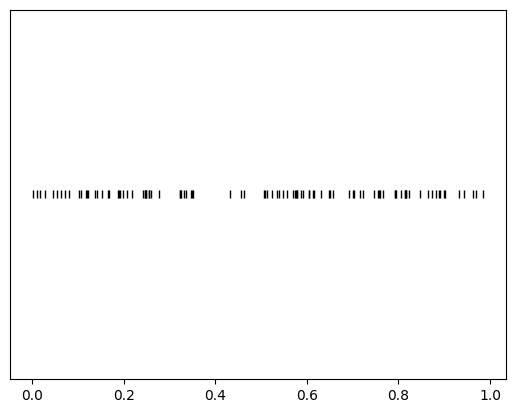

In [80]:
u.plot('rug')

Create a histogram:

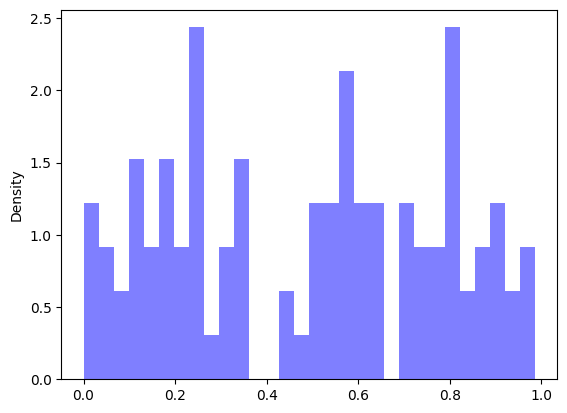

In [81]:
u.plot()

Display the rug plot and histogram together:

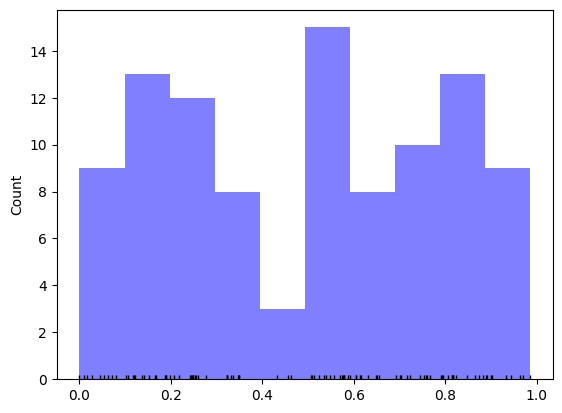

In [82]:
u.plot(['rug', 'hist'], bins = 10, normalize = False)

Simulate and plot 10000 values:

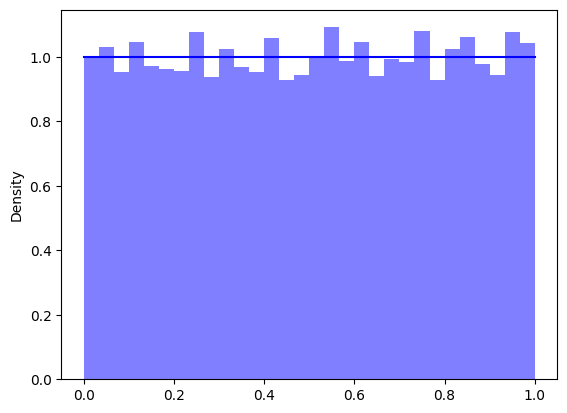

In [83]:
u = U.sim(10000)

u.plot()
Uniform(0, 1).plot()

Simulate and plot 100000 values:

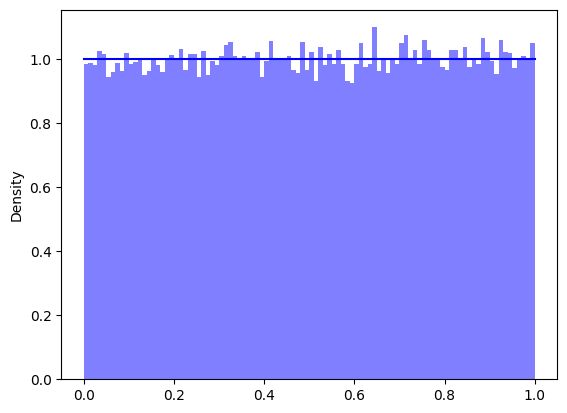

In [84]:
u = U.sim(100000)
u.plot(bins = 100)
Uniform(0, 1).plot() 

Approximate the probability of the event U <0.2 using counts:

In [85]:
u.count_lt(0.2) / u.count()

0.19721

Shade the plot to show when U < 0.2:

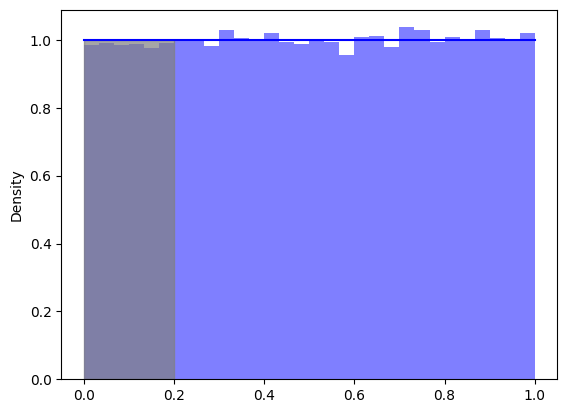

In [88]:
u.plot()
Uniform(0, 1).plot()
plt.fill_between(np.arange(0.0, 0.21, 0.01), 0, 1, alpha = 0.7, color = 'gray'); 

The probability that U is equal to exactly 0.2:

In [89]:
u.count_eq(0.2000000000000000000000)

0

The probability that U is within 0.005 of 0.2:

In [92]:
u.filter_lt(0.205).filter_gt(0.195)

abs(u - 0.2).count_lt(0.01 / 2) / u.count()

0.01009

Within 0.0005:

In [93]:
u.filter_lt(0.2005).filter_gt(0.1995)

abs(u - 0.2).count_lt(0.001 / 2) / u.count()

0.00094

#### 2.8.4 Normal distributions

In [94]:
R = RV(Normal(30, 10))

r = R.sim(100)
r

Index Result
0     33.98686166298101
1     34.18801240430342
2     22.44821171222658
3     28.619919368759614
4     22.44580863992143
5     28.110084914170447
6     17.07430950958963
7     26.11125139108976
8     28.94471044276299
..    ..................
99    28.365545374526757

Plot the rug plot and histograms together:

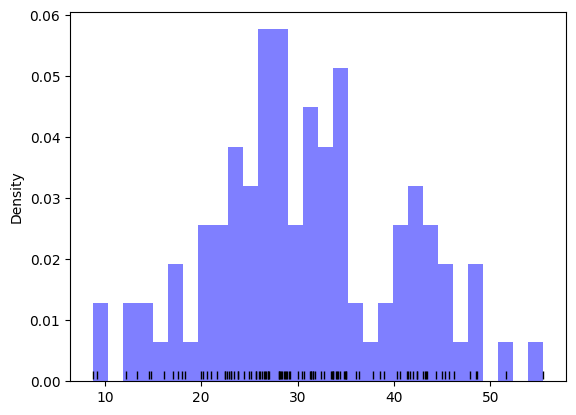

In [95]:
r.plot(['rug', 'hist'])

Simulate and plot 10000 values:

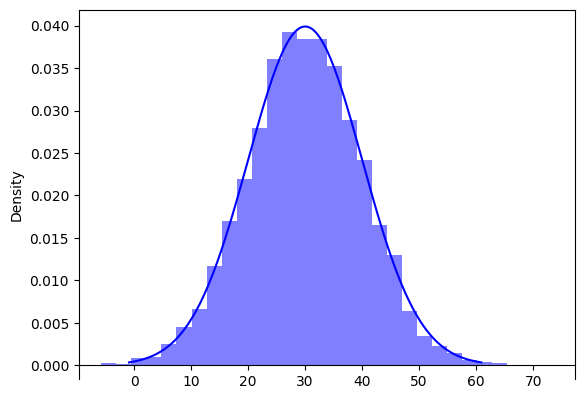

In [96]:
r = R.sim(10000)

r.plot()
Normal(30, 10).plot()

#### 2.8.5 Percentiles

25th percentile of the above normal distribution:

In [97]:
r.quantile(0.25)

23.26857413888223

Compute theoretical first quantile:

In [98]:
Normal(30, 10).quantile(0.25)

np.float64(23.255102498039182)

#### 2.8.6 Transformations

Linear rescaling of uniform distribution:

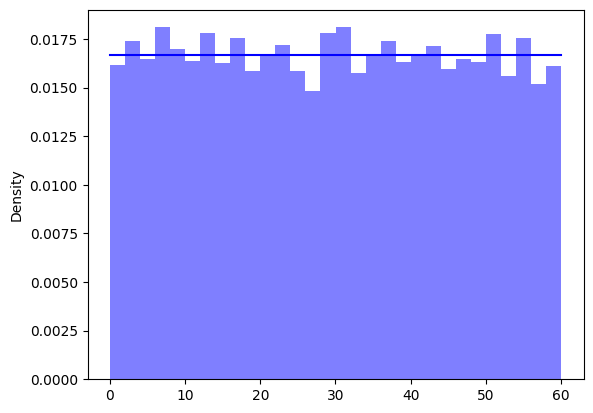

In [99]:
U = RV(Uniform(0, 1))

R = 60 * U


R.sim(10000).plot()
Uniform(0, 60).plot()

Non-linear rescaling to $U^2$:

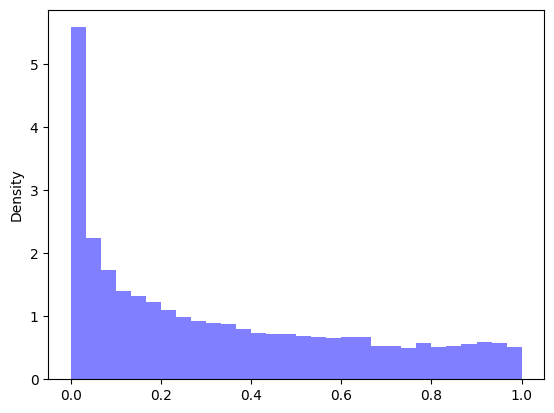

In [100]:
Z = U ** 2

z = Z.sim(10000)

z.plot()

### 2.9 Averages

Example 2.48:

In [102]:
P = BoxModel([1, 2, 3, 4], size = 2)

X = RV(P, sum)

x = X.sim(10000)

Long run average:

In [103]:
x.sum() / 10000

5.0015

Long run average through mean method:

In [104]:
x.mean()

5.0015

### 2.10 Standard deviation

Define and simulate 10000 points in a Normal(30, 10) distribution:

In [105]:
X = RV(Normal(30, 10))

x = X.sim(10000)
x

Index Result
0     43.87950778800393
1     38.9599767018121
2     39.945804342316094
3     41.839334192652586
4     31.916354230059664
5     11.648843927065474
6     16.549474769027263
7     19.059502438106282
8     19.70469186848433
....  .................
9999  32.95096199015763

Plot the values and density curve:

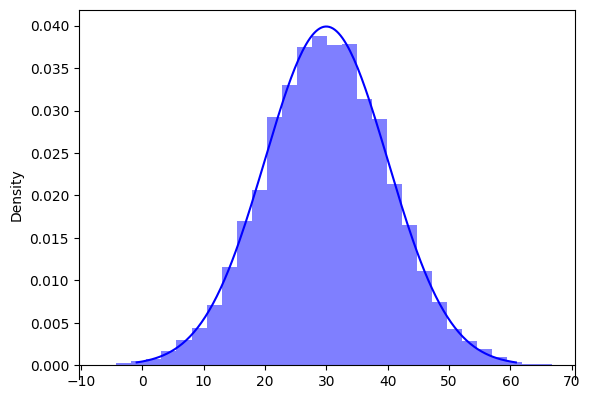

In [106]:
x.plot()
Normal(30, 10).plot()

Find the mean:

In [107]:
x.mean()

30.06704656609299

Find the standard deviation:

In [108]:
x.sd()

10.081088913023647

Find the average deviation of each value from the mean:

In [109]:
abs(x - x.mean()).mean()

8.052703764718416

Compute the variance:

In [110]:
((x - x.mean()) ** 2).mean()

101.62835367228828

Compute the standard deviation by taking the square root of variance:

In [111]:
sqrt(((x - x.mean()) ** 2).mean())

10.081088913023647

Simulate and plot normal vs. uniform distributions:

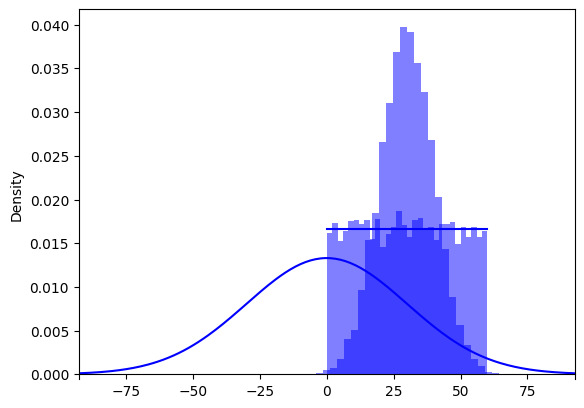

In [112]:
RV(Normal(30, 10)).sim(10000).plot()
Normal(0, 30).plot()

RV(Uniform(0, 60)).sim(10000).plot()
Uniform(0, 60).plot()

Find the standard deviation of the uniform distribution:

In [113]:
RV(Uniform(0, 60)).sim(10000).sd()

17.31850538889047

### 2.11 Joint distributions

Simulate a joint distribution using a box model:

In [114]:
xy_pairs = [(2, 1), (3, 2), (4, 2), (4, 3), (5, 3), (5, 4), (6, 3), (6, 4), (7, 4), (8, 4)]
pxy = [1/16, 2/16, 1/16, 2/16, 2/16, 2/16, 1/16, 2/16, 2/16, 1/16]

P = BoxModel(xy_pairs, probs = pxy, size = 1)

P.sim(10)

Index Result
0     (4, 3)
1     (4, 3)
2     (4, 2)
3     (5, 3)
4     (6, 4)
5     (3, 2)
6     (6, 4)
7     (5, 3)
8     (5, 4)
9     (5, 4)

In [115]:
X, Y = RV(P)
(RV(P) & X & Y).sim(10)

Index Result
0     ((4, 2), 4, 2)
1     ((6, 3), 6, 3)
2     ((4, 3), 4, 3)
3     ((5, 3), 5, 3)
4     ((4, 3), 4, 3)
5     ((6, 3), 6, 3)
6     ((7, 4), 7, 4)
7     ((4, 2), 4, 2)
8     ((5, 4), 5, 4)
9     ((5, 4), 5, 4)

Create a tile plot:

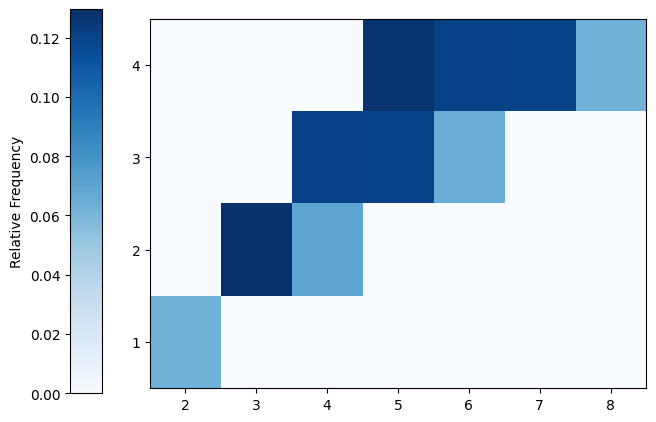

In [116]:
(X & Y).sim(10000).plot('tile')

#### 2.11.2 Joint distributions of two continuous random variables

Simulate and plot the arrival time problem:

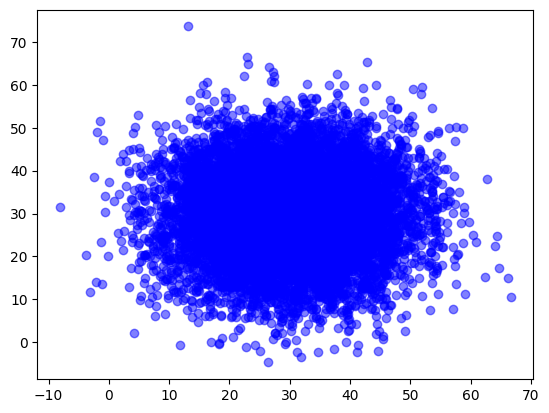

In [117]:
R, Y = RV(Normal(30, 10) ** 2)

r_and_y = (R & Y).sim(10000)

r_and_y.plot()

Create a histogram:

C:\Users\Louise\Documents\GitHub\symbulate\symbulate\results.py:588: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  caxes.set_yticklabels(new_labels)


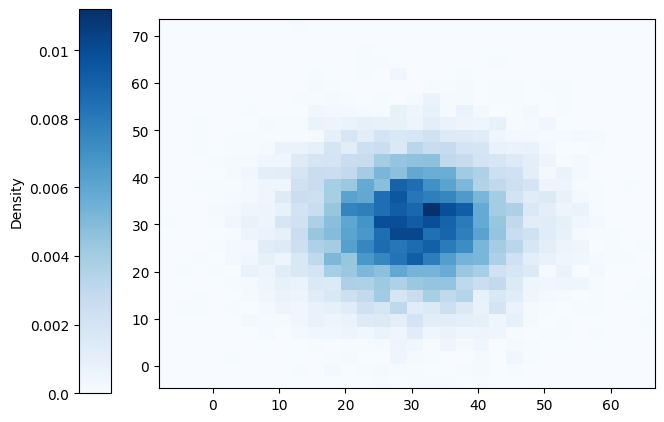

In [118]:
r_and_y.plot('hist')

Simulate and plot the minimum time between arrivals:

C:\Users\Louise\Documents\GitHub\symbulate\symbulate\results.py:588: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  caxes.set_yticklabels(new_labels)


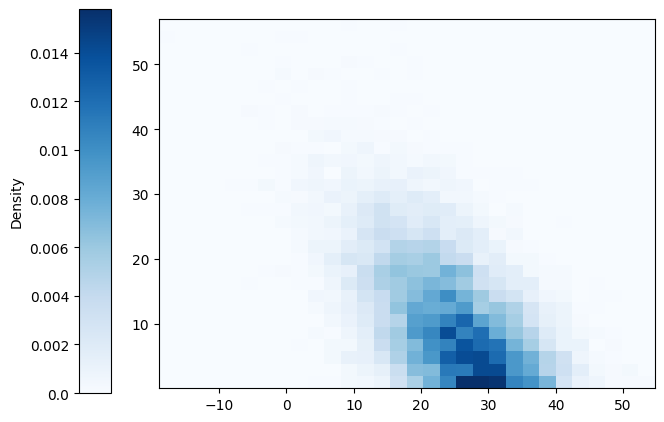

In [119]:
W = abs(R - Y)

T = (R & Y).apply(min)

t_and_w = (T & W).sim(10000)

t_and_w.plot('hist')

Find correlation:

In [120]:
t_and_w.corr()

np.float64(-0.5197247921024615)

Find marginal distributions:

C:\Users\Louise\Documents\GitHub\symbulate\symbulate\results.py:588: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  caxes.set_yticklabels(new_labels)


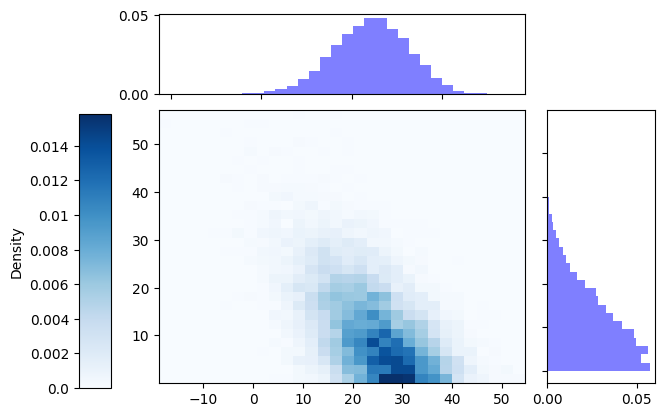

In [121]:
t_and_w.plot(['hist', 'marginal'])

### 2.12 Correlation

Calculate means:

In [122]:
t_and_w.mean()

(24.23750725678662, 11.30944069792586)

Calculate product of deviations:

In [123]:
t_deviations = (t_and_w - t_and_w.mean())[0] 
w_deviations = (t_and_w - t_and_w.mean())[1]

t_deviations * w_deviations

Index Result
0     -24.32795188107994
1     -199.89181343072408
2     30.657200299698488
3     -13.442200646311186
4     -26.169282786040412
5     -20.94471533005514
6     0.6375820235685657
7     30.735276795687525
8     -14.903686578894764
....  ...................
9999  -24.011346179162445

Take average to find covariance:

In [125]:
(t_deviations * w_deviations).mean()

-37.044641317753296

Find covariance directly:

In [126]:
t_and_w.cov()

np.float64(-37.04464131775331)

Find covariance using averages of products:

In [127]:
(t_and_w[0] * t_and_w[1]).mean() - (t_and_w[0].mean()) * (t_and_w[1].mean()) 

-37.044641317753275

Standardize the random variables:

In [128]:
t_and_w.standardize()

Index Result
0     (-0.3138762472155911, 1.0874145426368387)
1     (-2.1192852426264297, 1.323285744787616)
2     (-0.3356060677722282, -1.281594772046831)
3     (0.15102946451536622, -1.2486960305543913)
4     (-2.0630194927930807, 0.1779657908236222)
5     (-0.9689513802543872, 0.30326376080758033)
6     (0.03771461103158505, 0.2371780372926689)
7     (0.8858144449216264, 0.4867908548378427)
8     (-0.31103444886746207, 0.672253785794334)
....  ..........................................
9999  (1.2317698648616613, -0.27348592129667126)

Compute covariance of standardized values:

In [129]:
t_and_w.standardize().cov()

np.float64(-0.5197247921024608)

#### 2.12.1 Joint Normal distributions

Define and simulate bivariate normal distribution:

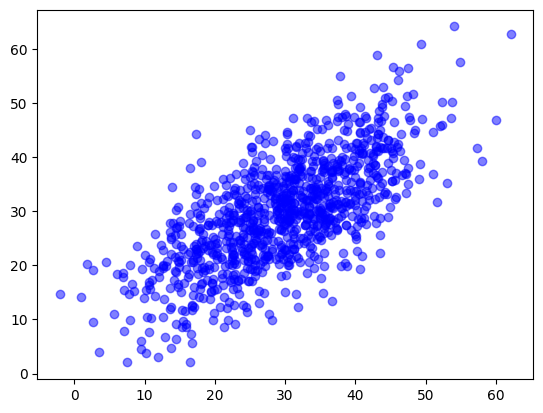

In [130]:
R, Y = RV(BivariateNormal(mean1 = 30, sd1 = 10, mean2 = 30, sd2 = 10, corr = 0.7))

(R & Y).sim(1000).plot()

### 2.13 Conditional distributions

Define and simulate conditional distribution:

In [131]:
P = DiscreteUniform(1, 4) ** 2

X = RV(P, sum)
Y = RV(P, max)

( (X & Y) | (Y == 4) ).sim(10)

Index Result
0     (7, 4)
1     (8, 4)
2     (5, 4)
3     (5, 4)
4     (7, 4)
5     (7, 4)
6     (6, 4)
7     (7, 4)
8     (8, 4)
9     (8, 4)

Tabulate:

In [132]:
(X | (Y == 4) ).sim(10000).tabulate()

Value Frequency
5     2900
6     2767
7     2894
8     1439
Total 10000

Tabulate relative frequencies:

In [133]:
(X | (Y == 4) ).sim(10000).tabulate(normalize = True)

Value Relative Frequency
5     0.2942
6     0.2861
7     0.2789
8     0.1408
Total 1.0

Find conditional distributions given Y = 4, Y = 3, Y = 2:

In [134]:
x_given_Y_eq4 = (X | (Y == 4) ).sim(10000)

x_given_Y_eq3 = (X | (Y == 3) ).sim(10000)

x_given_Y_eq2 = (X | (Y == 2) ).sim(10000)

Plot the 3 distributions:

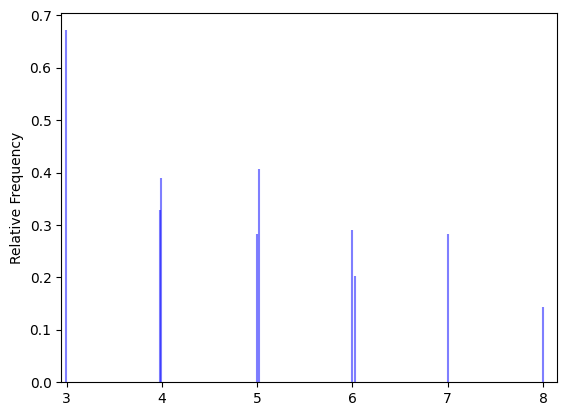

In [136]:
x_given_Y_eq4.plot()
x_given_Y_eq3.plot(jitter = True) # shifts the spikes a little
x_given_Y_eq2.plot(jitter = True) # so they don't overlap

Find mean and standard deviation of conditional distribution given Y=4:

In [137]:
x_given_Y_eq4.mean(), x_given_Y_eq4.sd()

(6.289, 1.0288240860322042)

Find mean and standard deviation of conditional distribution given Y=3:

In [138]:
x_given_Y_eq3.mean(), x_given_Y_eq3.sd()

(4.814, 0.7475319391169851)

Find mean and standard deviation of conditional distribution given Y=2:

In [139]:
x_given_Y_eq2.mean(), x_given_Y_eq2.sd()

(3.3283, 0.469594623052692)

#### 2.13.2 Conditional distributions of continuous random variables

Approximate conditioning on R=40:

In [140]:
R, Y = RV(BivariateNormal(mean1 = 30, sd1 = 10, mean2 = 30, sd2 = 10, corr = 0.7))

( (R & Y) | (abs(R - 40) < 0.5) ).sim(10)

Index Result
0     (39.625156762399584, 34.21869613527924)
1     (39.679236002064684, 40.76944009529449)
2     (40.13315344636314, 29.793561544323993)
3     (39.573352255743586, 37.66772005595833)
4     (39.58383235322253, 37.1586437554419)
5     (39.848470933165316, 43.48125945182724)
6     (40.117792643455985, 32.616498383975284)
7     (39.844056192984155, 43.46853595628015)
8     (39.773132435959646, 41.33023416768109)
9     (39.89381957818248, 32.394484028115755)

Approximate conditional distribution given Y=40:

In [141]:
y_given_R_eq40 = ( Y | (abs(R - 40) < 0.5) ).sim(1000)

Plot the values:

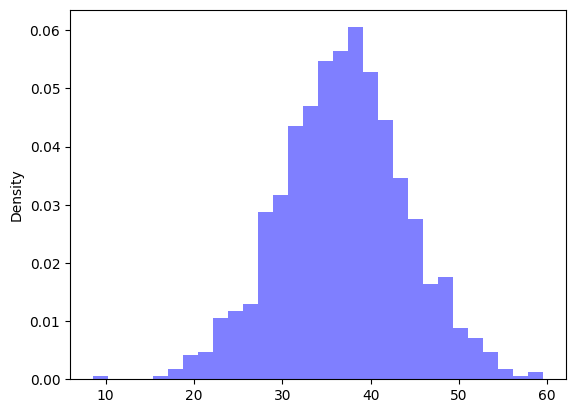

In [142]:
y_given_R_eq40.plot()

Approximate the event that Y < 30 given R=40:

In [143]:
y_given_R_eq40.count_lt(30) / y_given_R_eq40.count()

0.163

Approximate the mean:

In [144]:
y_given_R_eq40.mean()

36.927800845354675

Approximate the standard deviation:

In [145]:
y_given_R_eq40.sd()

7.117998283442807

Condition on R=15, then plot:

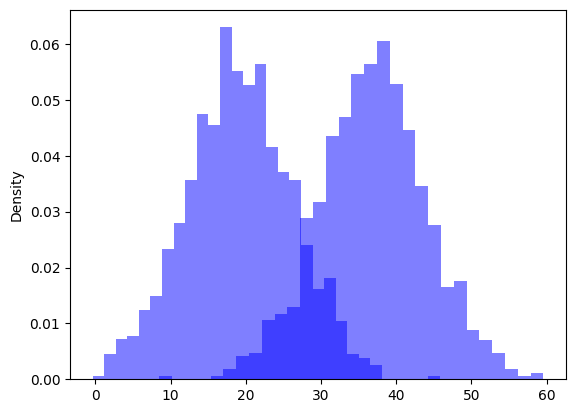

In [146]:
y_given_R_eq15 = ( Y | (abs(R - 15) < 0.5) ).sim(1000)
y_given_R_eq40.plot()
y_given_R_eq15.plot()

Approximate the probability that Y < 30 given R=15:

In [147]:
y_given_R_eq15.count_lt(30) / y_given_R_eq15.count()

0.931

Approximate the mean:

In [148]:
y_given_R_eq15.mean()

19.168172279370943

Approximate the standard deviation:

In [149]:
y_given_R_eq15.sd()

7.02625822025772

Simulate arrival times:

In [150]:
Z1, Z2 = RV(Normal(0, 1) ** 2)

R = 30 + 10 * Z1

Y = 30 + 0.7 * (R - 30) + 7.14 * Z2

r_and_y = (R & Y).sim(10000)

r_and_y.corr()

np.float64(0.7026640973524013)

Find the means:

In [151]:
r_and_y.mean()

(29.926450487890694, 29.99218155269906)

Find the standard deviations:

In [152]:
r_and_y.sd()

(9.99860420217594, 10.060767318503292)

Plot the simulated values:

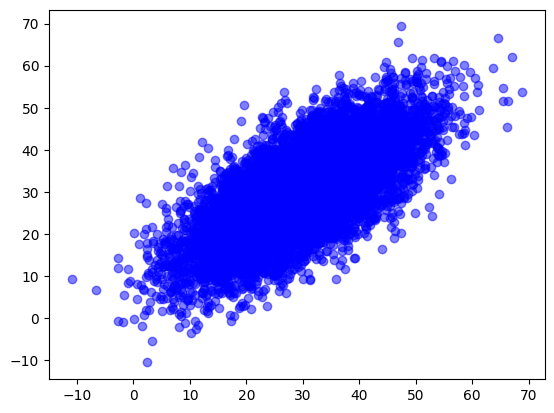

In [153]:
r_and_y.plot()

Create a histogram:

C:\Users\Louise\Documents\GitHub\symbulate\symbulate\results.py:588: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  caxes.set_yticklabels(new_labels)


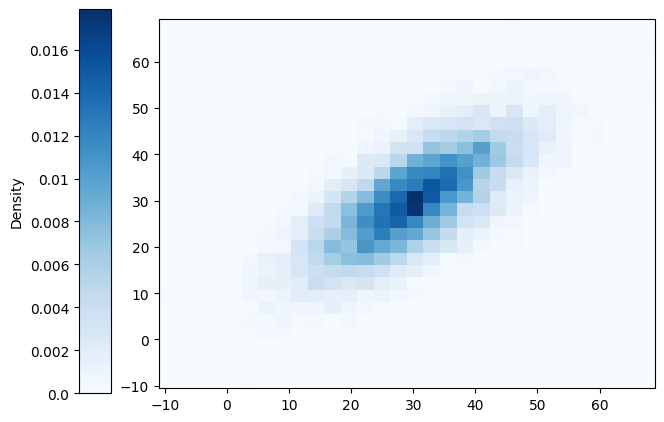

In [154]:
r_and_y.plot('hist')

Find the mean and standard deviation of Y:

In [155]:
y = r_and_y[1]

y.mean(), y.sd()

(29.99218155269905, 10.06076731850328)

Plot Y:

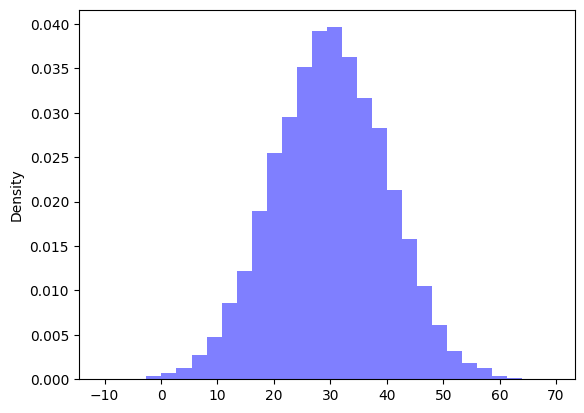

In [156]:
y.plot()

Simulate time waiting and find the correlation given R=40:

In [157]:
W = abs(R - Y)

T = (R & Y).apply(min)

t_and_w_given_R_eq40 = ( (T & W) | (abs(R - 40) < 0.5) ).sim(1000)

t_and_w_given_R_eq40.corr()

np.float64(-0.8116248212073057)

Plot the values:

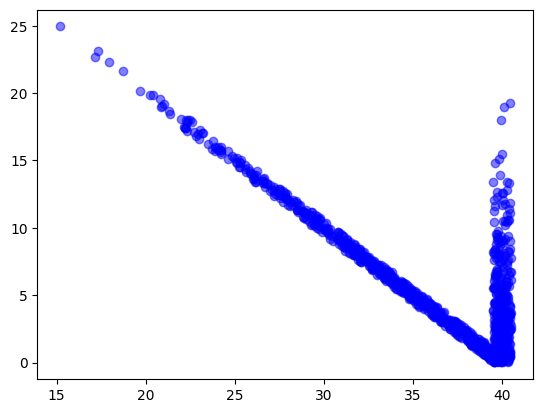

In [158]:
t_and_w_given_R_eq40.plot()

Condition on R=40 and Y < 30:

In [159]:
W = abs(R - Y)

T = (R & Y).apply(min)

t_and_w_given_R_eq40_and_Y_lt30 = ( (T & W) | ( (abs(R - 40) < 0.5) & (Y < 30) ) ).sim(1000)

t_and_w_given_R_eq40_and_Y_lt30.corr()

np.float64(-0.9961131208654301)

Plot the values:

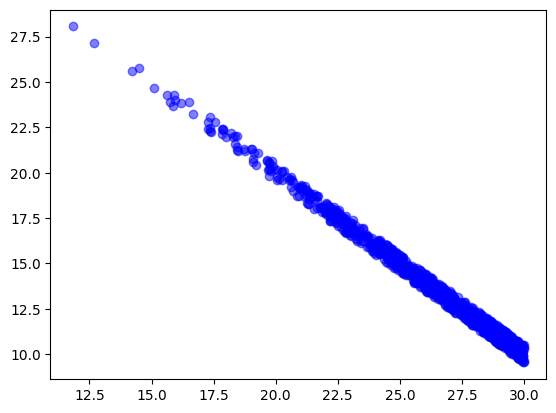

In [160]:
t_and_w_given_R_eq40_and_Y_lt30.plot()

### 2.14 A more interesting example: Matching problem

Set up labels for 4 rocks:

In [161]:
n = 4

labels = list(range(n))
labels

[0, 1, 2, 3]

Simulate 5 tries with box model, no replacement:

In [162]:
P = BoxModel(labels, size = n, replace = False)

P.sim(5)

Index Result
0     (3, 1, 0, 2)
1     (1, 3, 2, 0)
2     (2, 0, 3, 1)
3     (2, 0, 3, 1)
4     (0, 3, 2, 1)

Simulate and tabulate 24000 outcomes:

In [163]:
P.sim(24000).tabulate()

Outcome      Frequency
(0, 1, 2, 3) 1017
(0, 1, 3, 2) 1015
(0, 2, 1, 3) 981
(0, 2, 3, 1) 1017
(0, 3, 1, 2) 941
(0, 3, 2, 1) 1036
(1, 0, 2, 3) 979
(1, 0, 3, 2) 994
(1, 2, 0, 3) 992
(1, 2, 3, 0) 1000
(1, 3, 0, 2) 967
(1, 3, 2, 0) 1025
(2, 0, 1, 3) 966
(2, 0, 3, 1) 996
(2, 1, 0, 3) 996
(2, 1, 3, 0) 1037
(2, 3, 0, 1) 1019
(2, 3, 1, 0) 946
(3, 0, 1, 2) 993
............ ....
(3, 2, 1, 0) 1026
       Total 24000

Define a function to count the number of matching rocks, and test on one permutation:

In [164]:
def count_matches(omega):
    count = 0
    for i in range(0, n, 1):
        if omega[i] == labels[i]:
            count += 1
    return count
  
omega = (1, 0, 2, 3)
count_matches(omega)

2

Define random variable based on number of matches:

In [165]:
Y = RV(P, count_matches)

Y((1, 0, 2, 3))

2

Simulate 10000 experiments and count matches:

In [166]:
y = Y.sim(10000)

y.tabulate(normalize = True)

Value Relative Frequency
0     0.378
1     0.3324
2     0.2498
4     0.0398
Total 1.0

Find relative frequency of at least one match:

In [167]:
y.count_gt(0) / y.count()

0.622

Find mean number of matches:

In [168]:
y.mean()

0.9912

Separate simulation code into a function:

In [169]:
def matching_sim(n):
    labels = list(range(n))
    def count_matches(omega):
        count = 0
        for i in range(0, n, 1):
            if omega[i] == labels[i]:
                count += 1
        return count
    
    P = BoxModel(labels, size = n, replace = False)
    Y = RV(P, count_matches)
    
    y = Y.sim(10000)
    
    plt.figure()
    y.plot('impulse')
    plt.show()
    
    return y.count_gt(0) / y.count(), y.mean()

Simulate and plot 10 rocks:

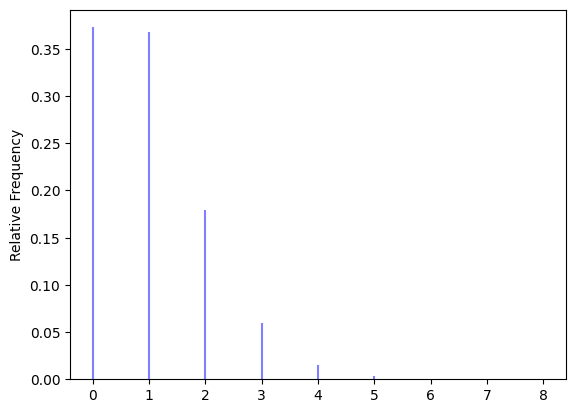

(0.6271, 0.9897)

In [170]:
matching_sim(10)

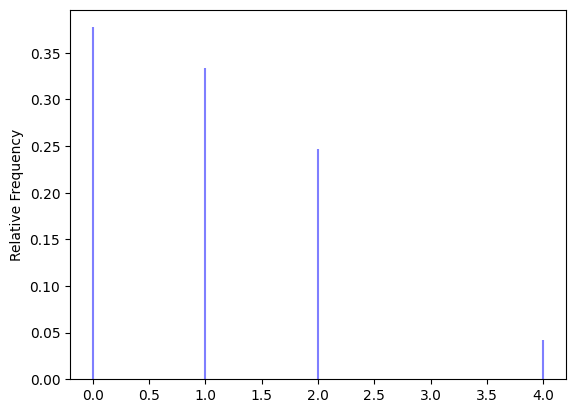

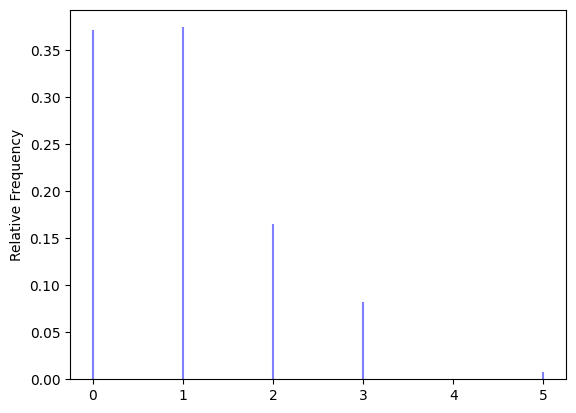

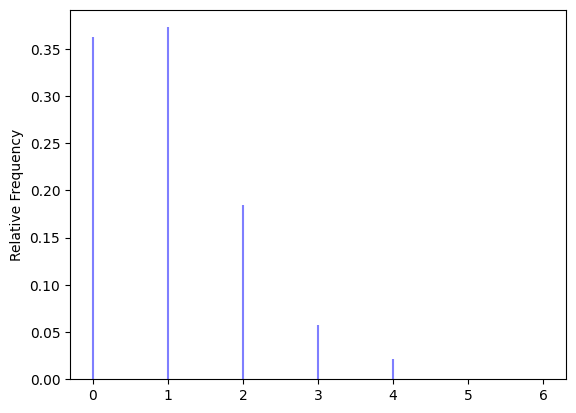

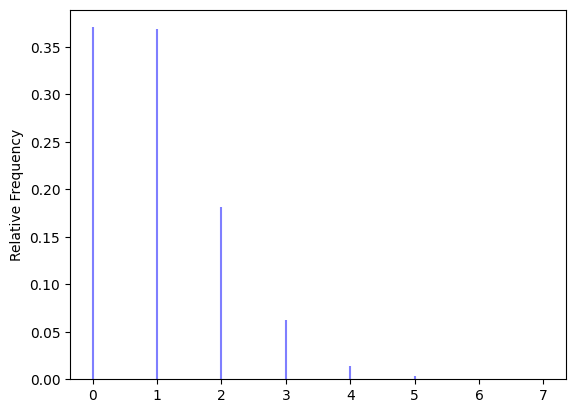

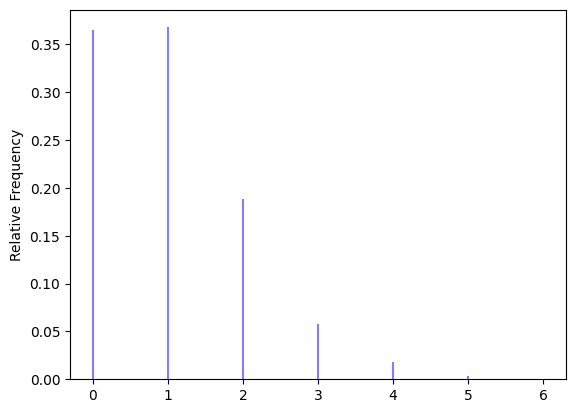

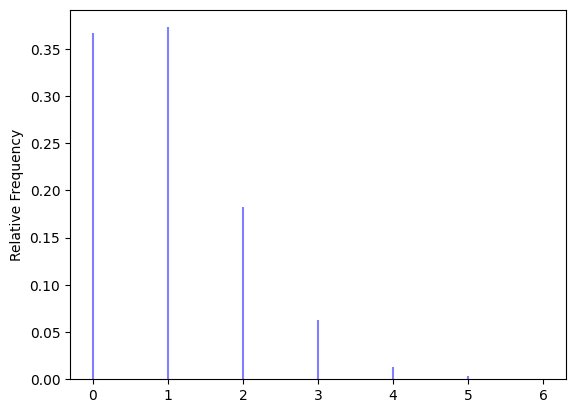

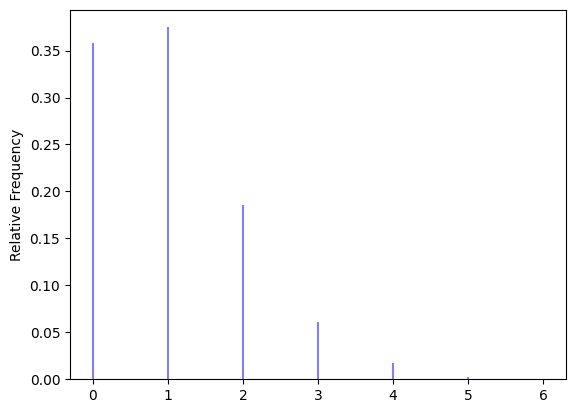

In [172]:
ns = list(range(4, 11, 1))

results = [matching_sim(n) for n in ns]

Simulate from 4 to 100:

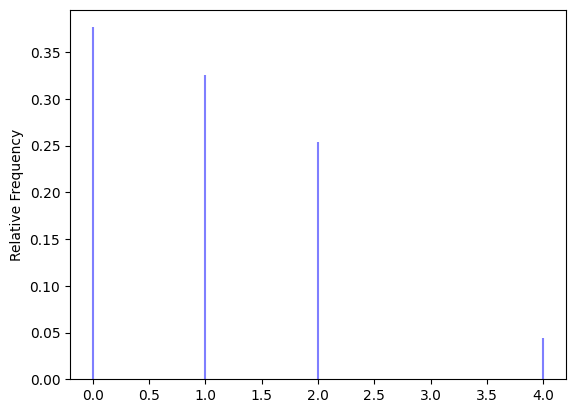

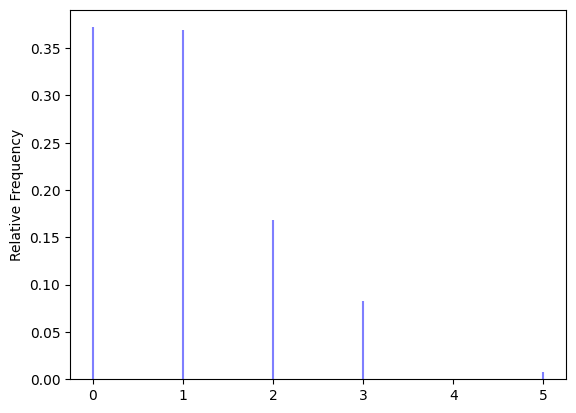

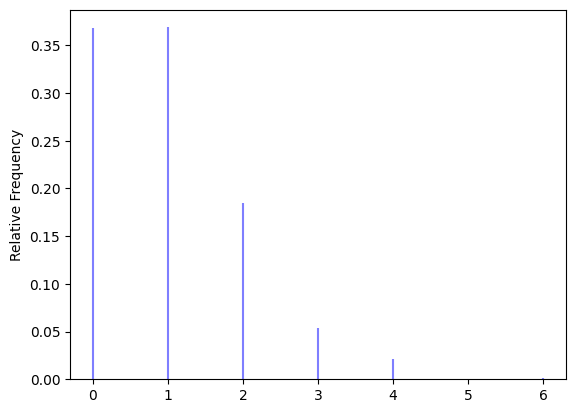

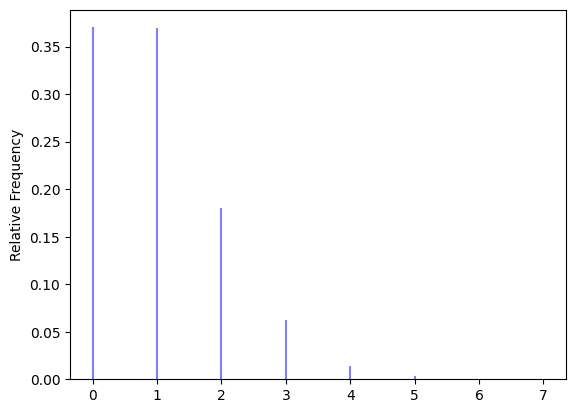

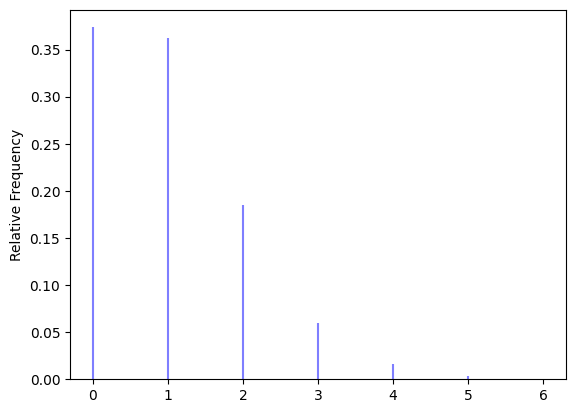

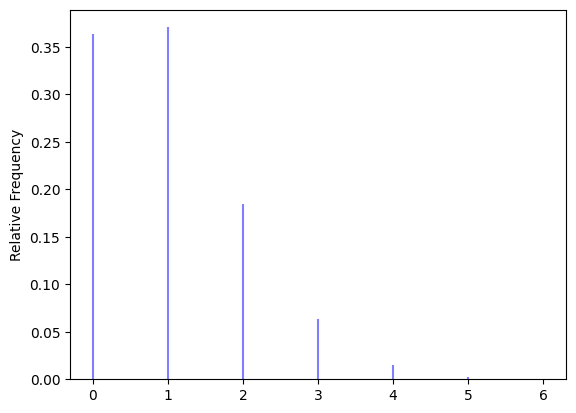

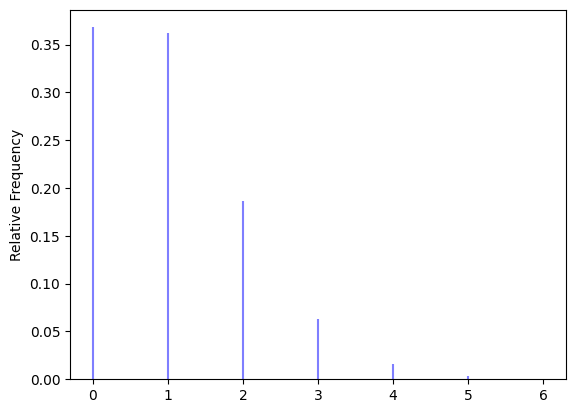

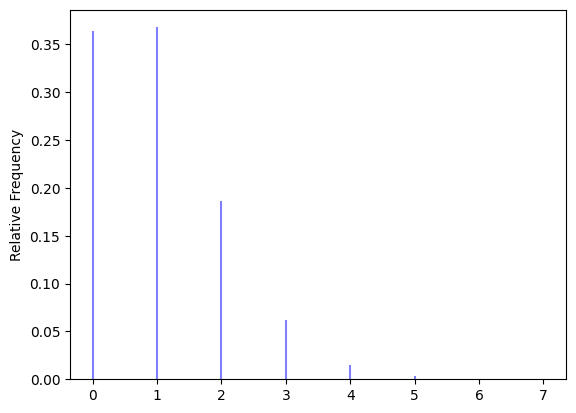

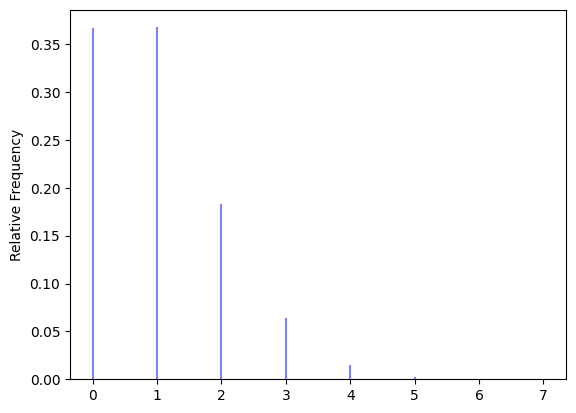

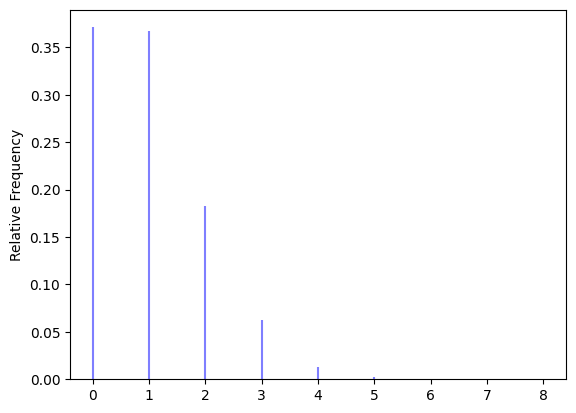

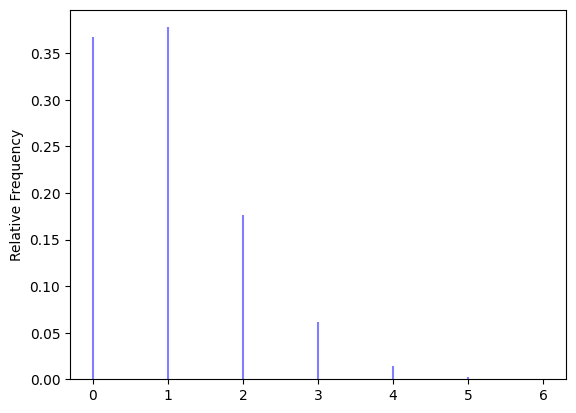

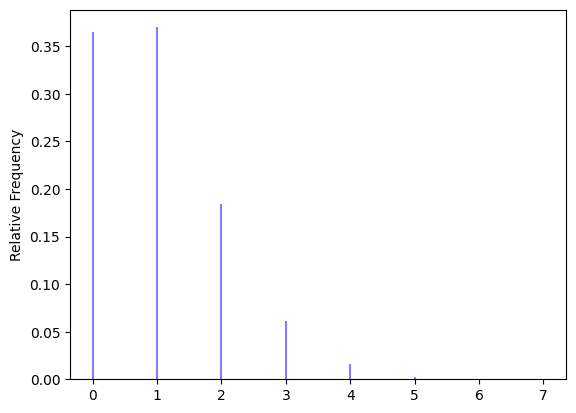

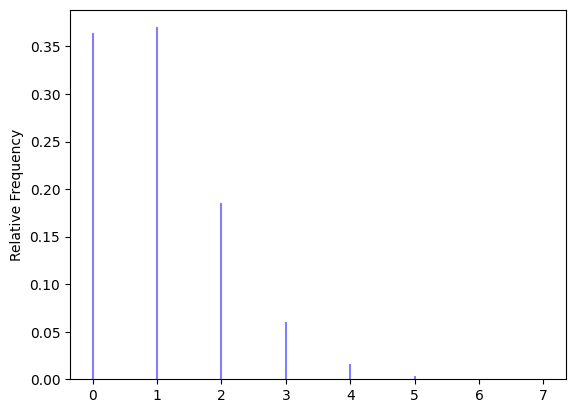

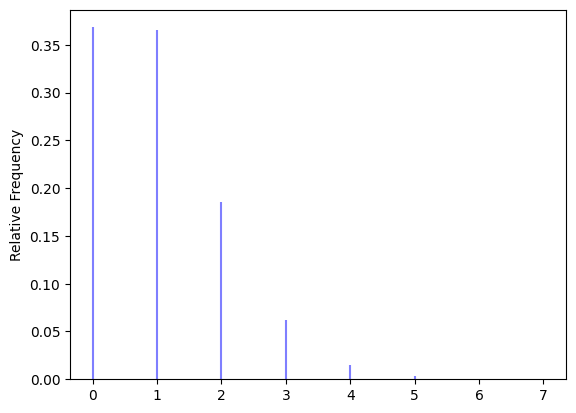

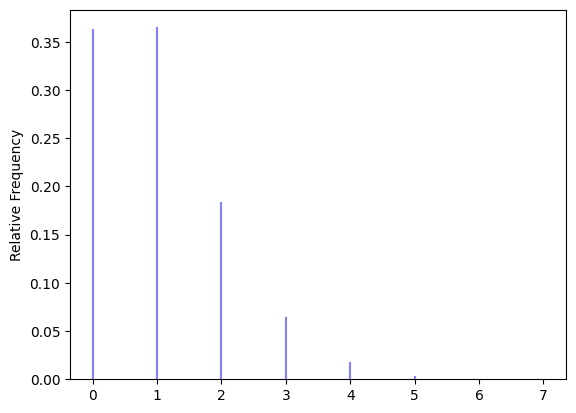

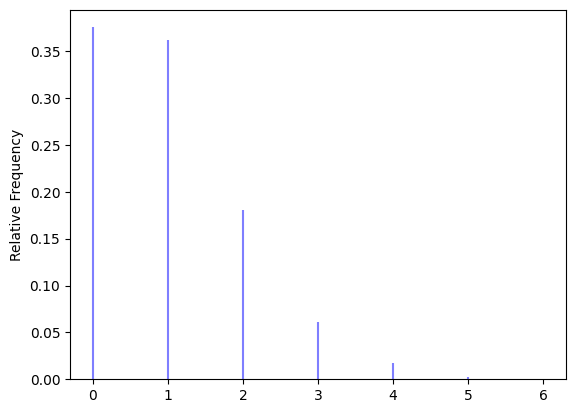

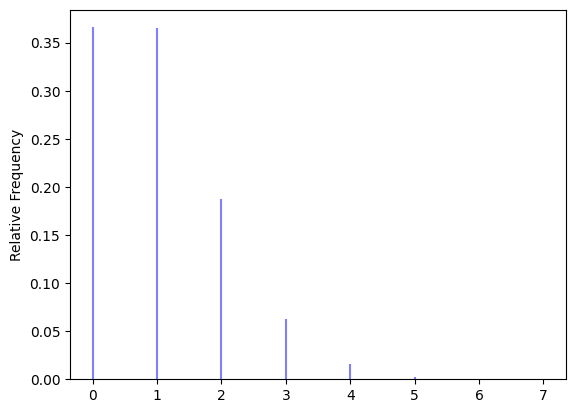

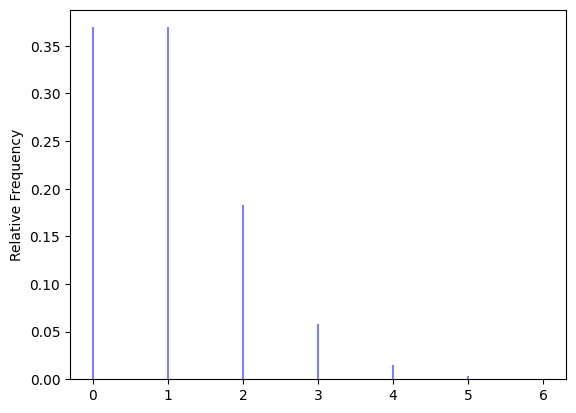

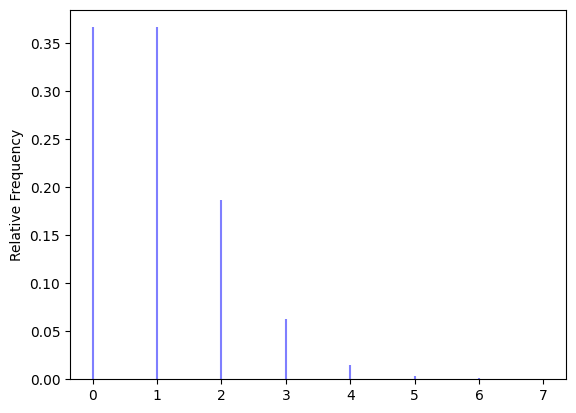

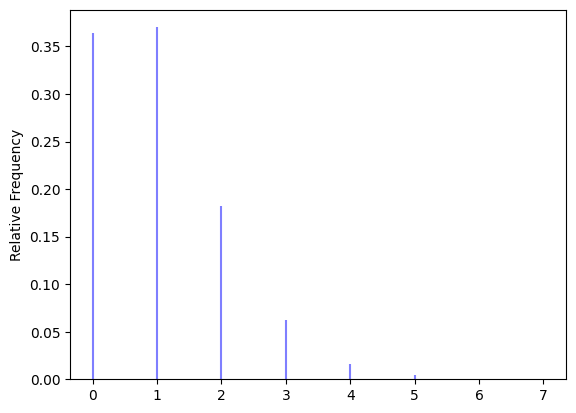

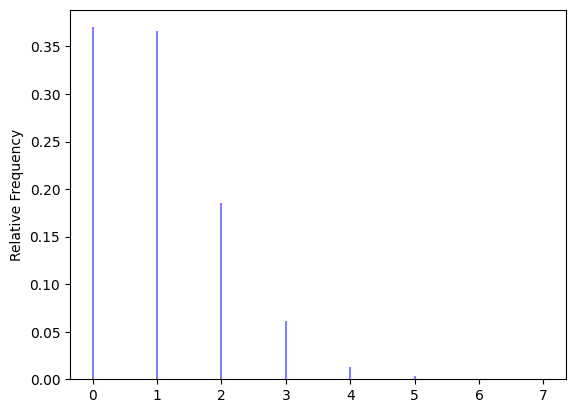

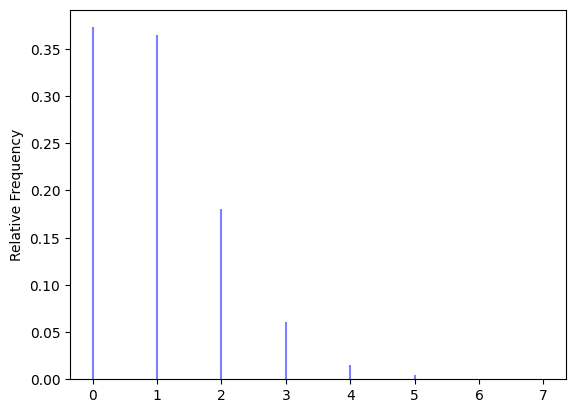

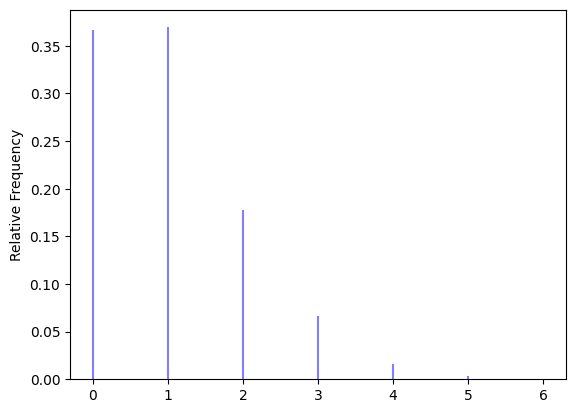

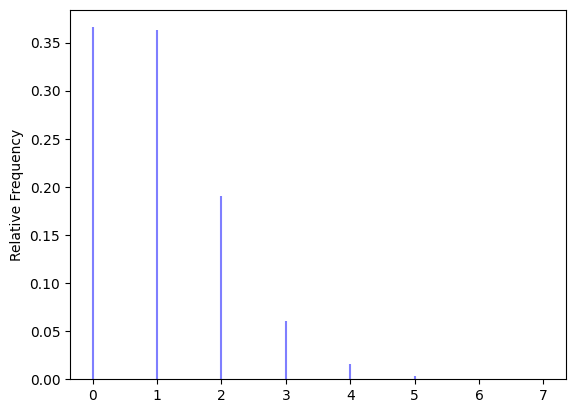

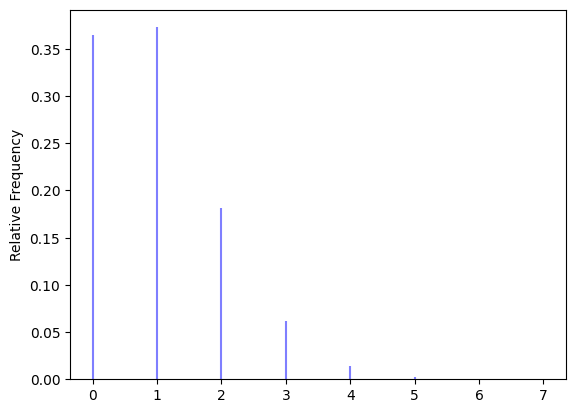

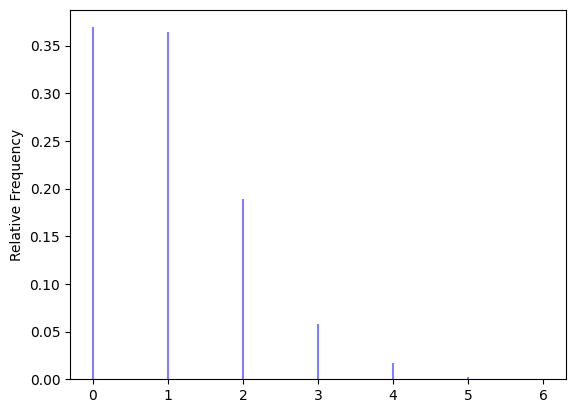

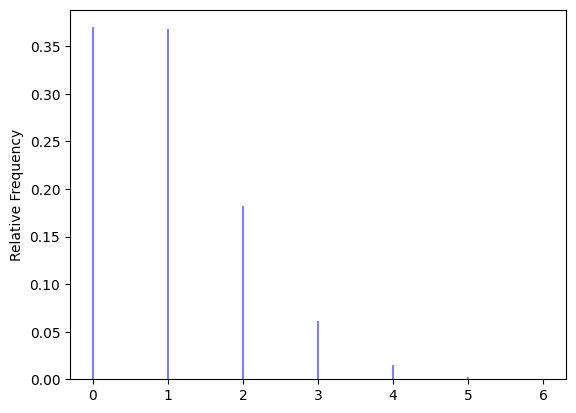

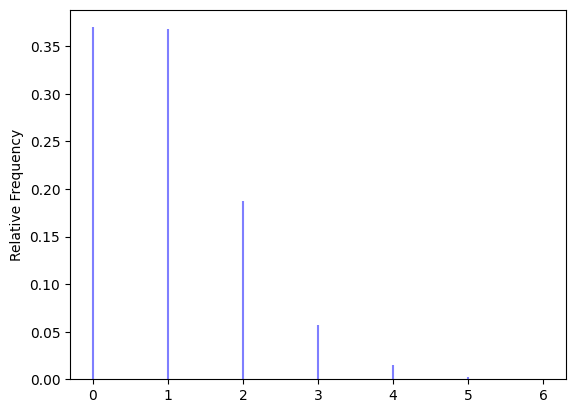

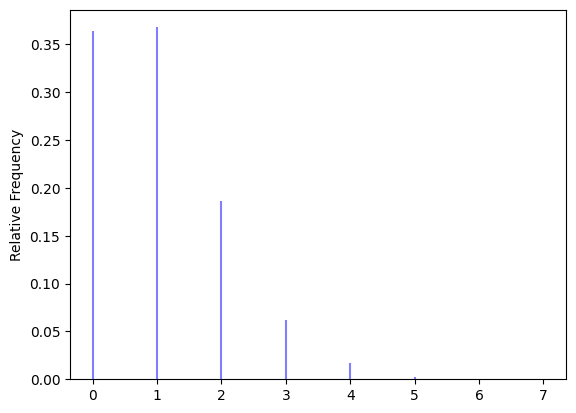

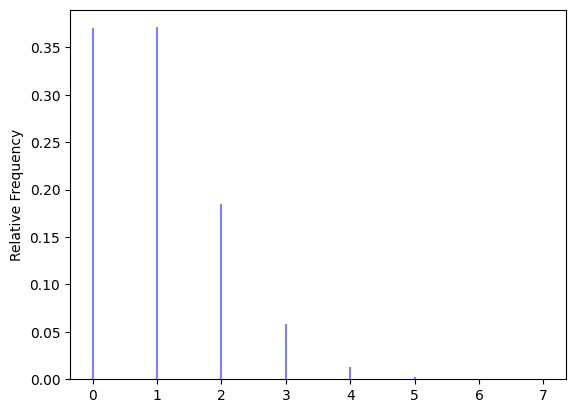

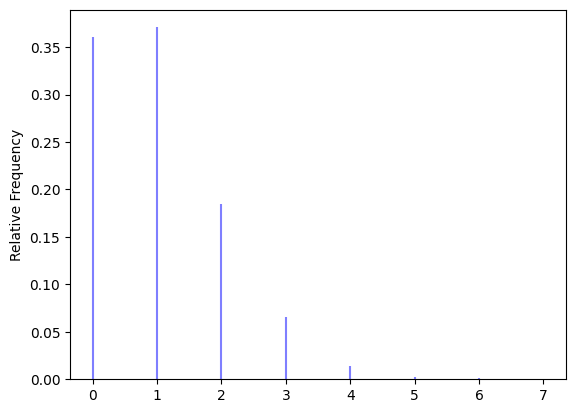

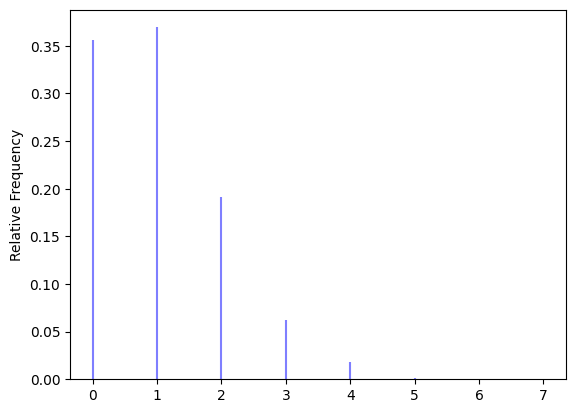

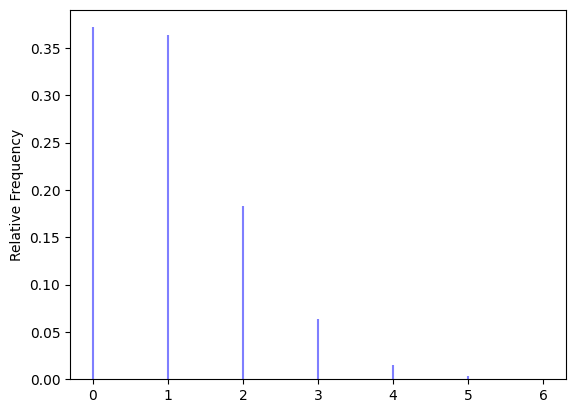

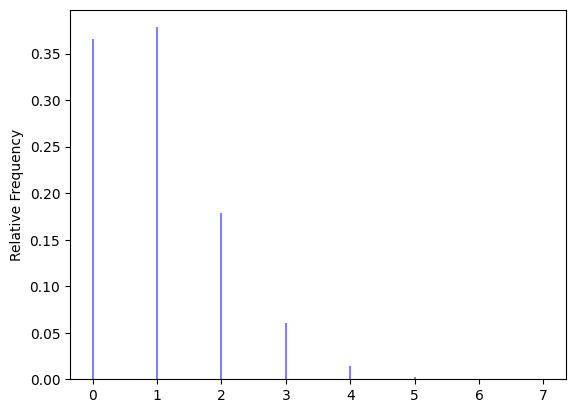

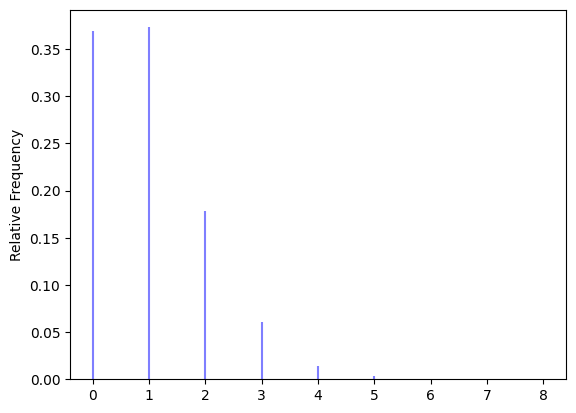

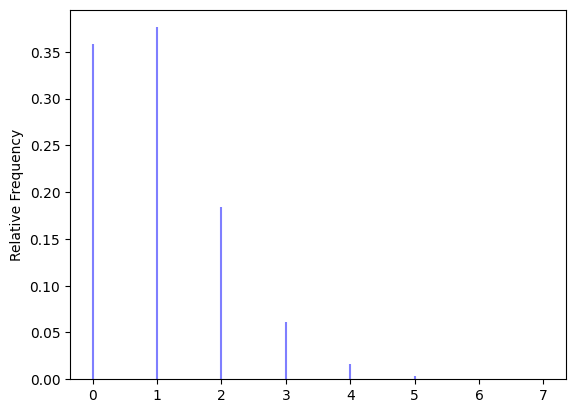

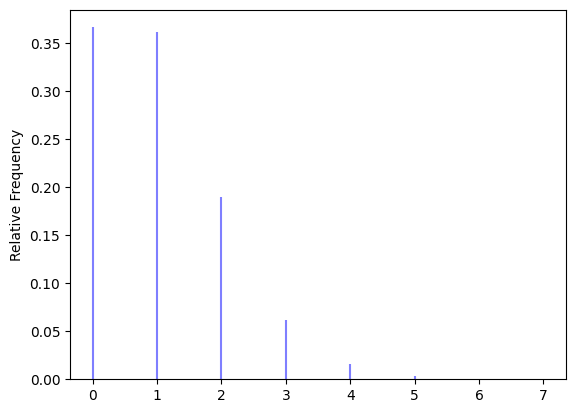

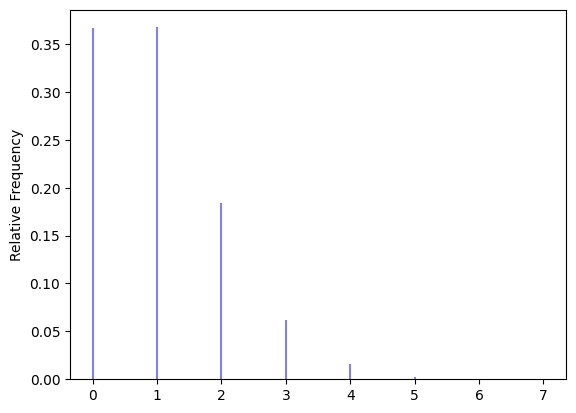

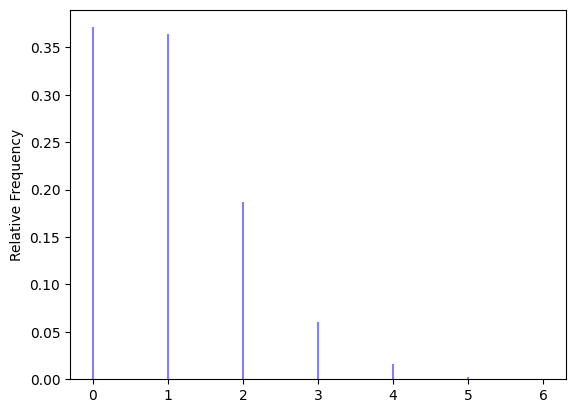

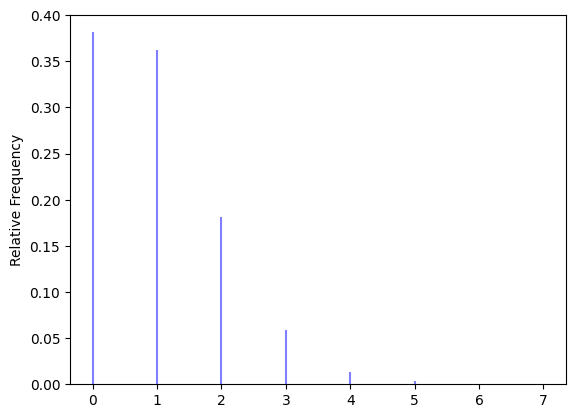

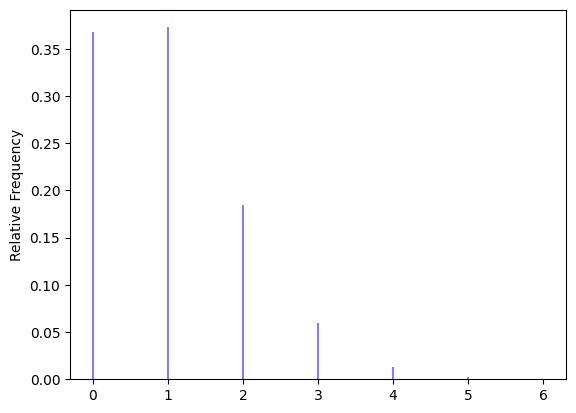

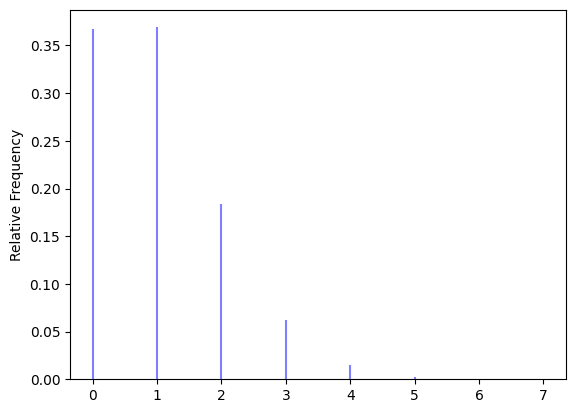

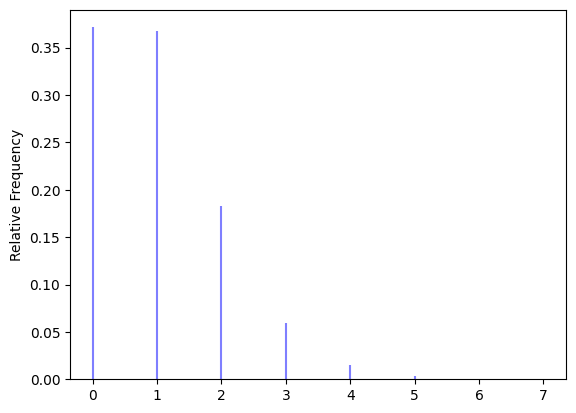

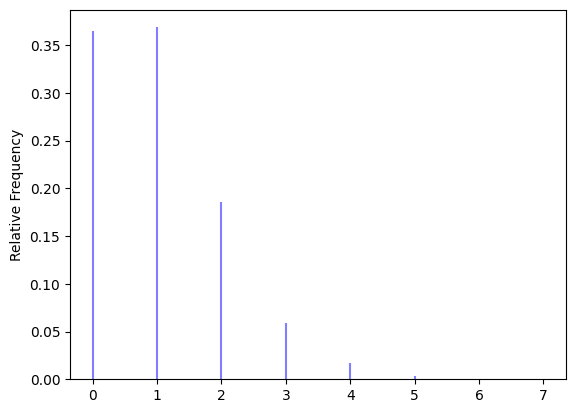

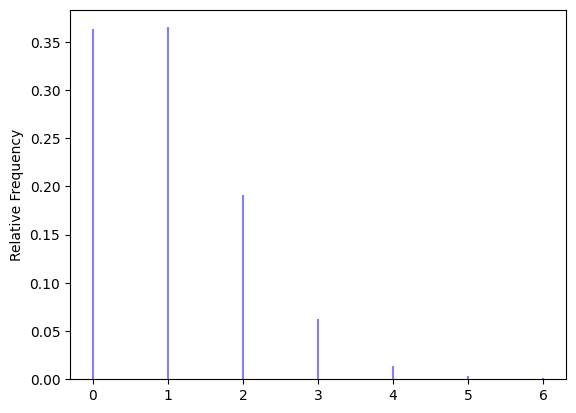

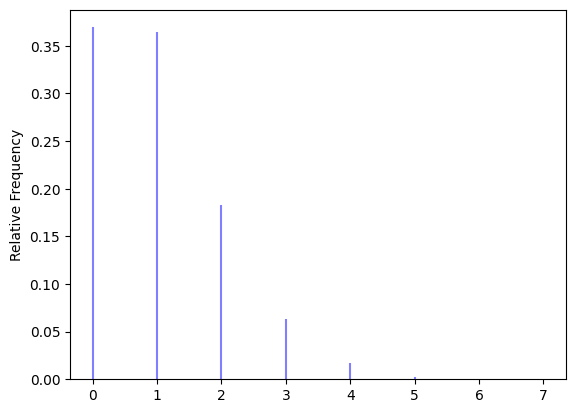

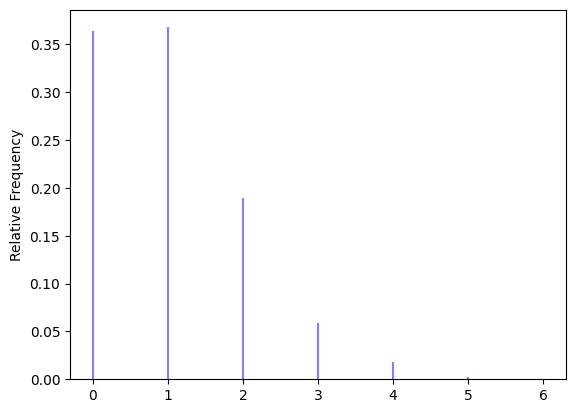

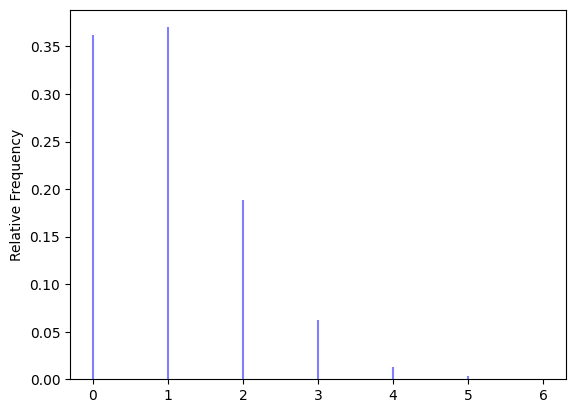

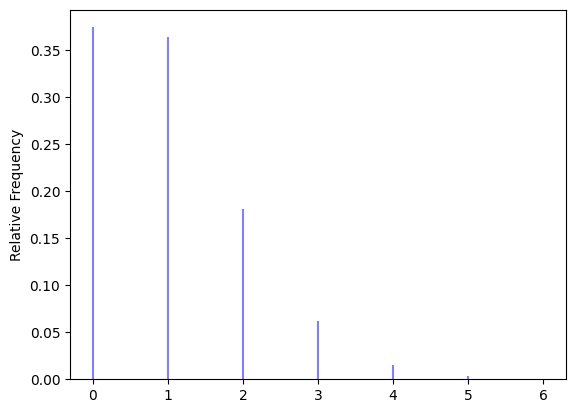

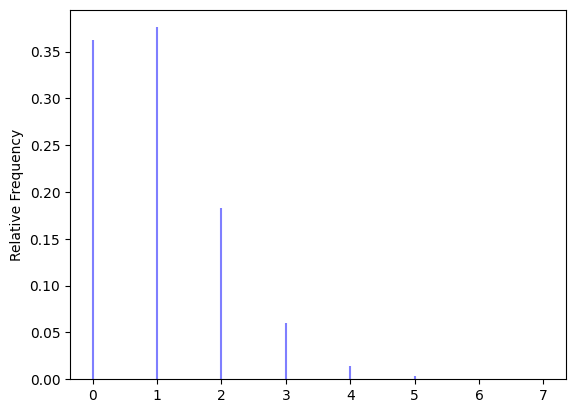

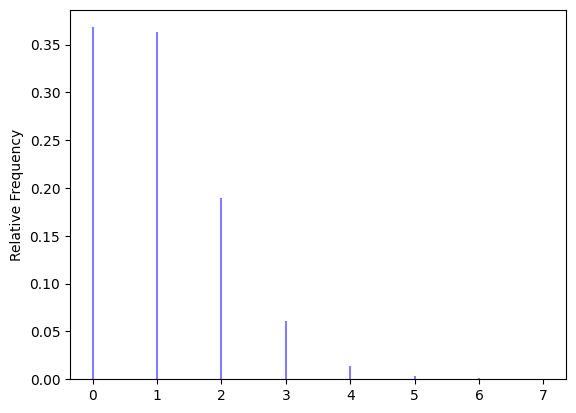

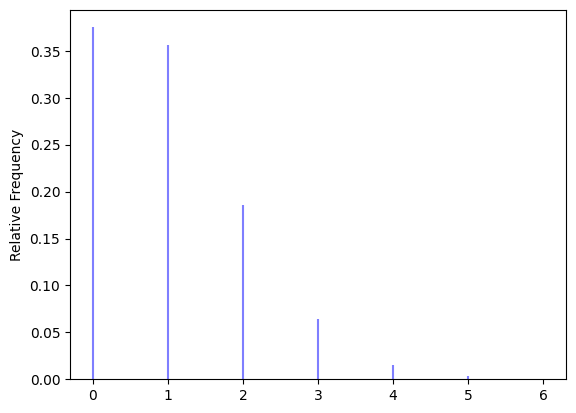

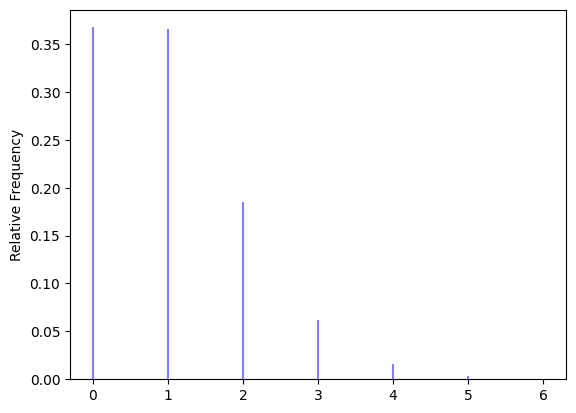

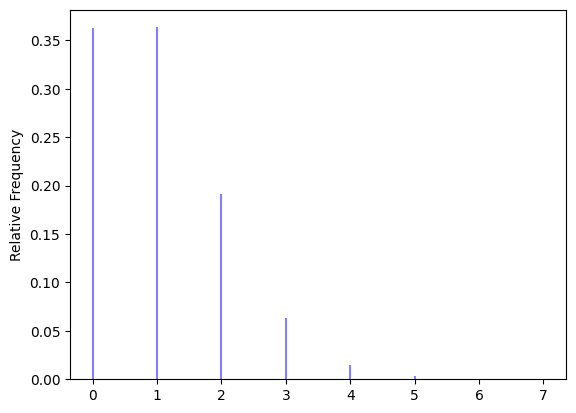

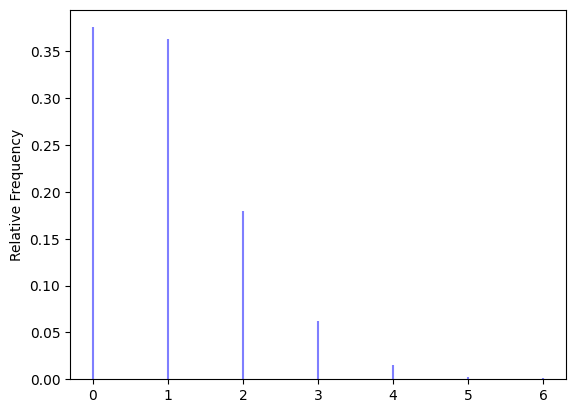

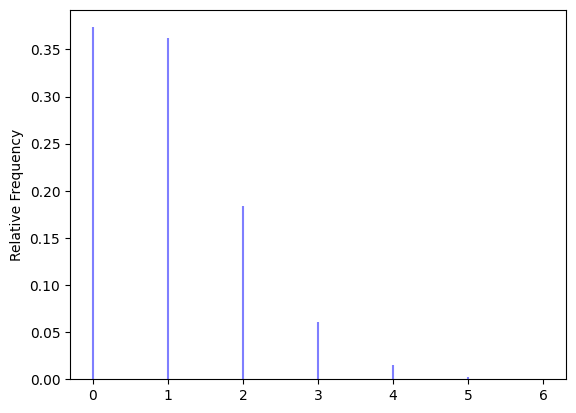

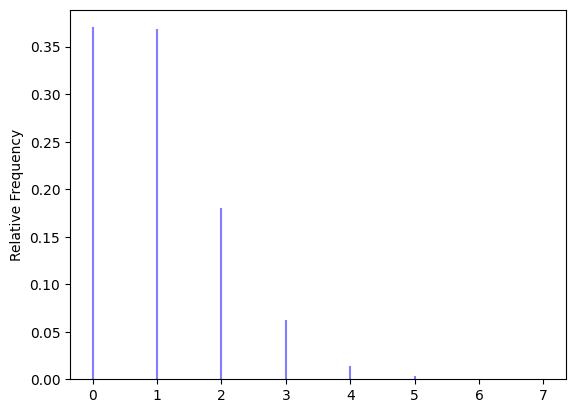

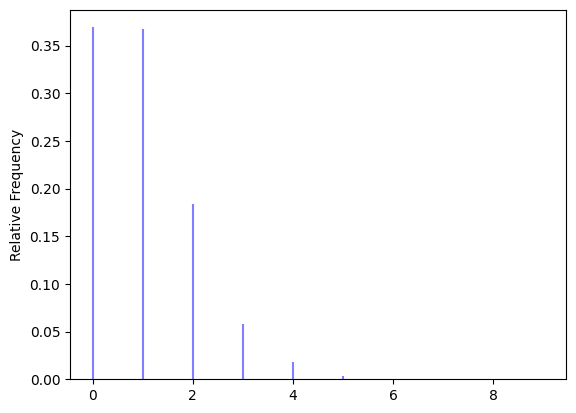

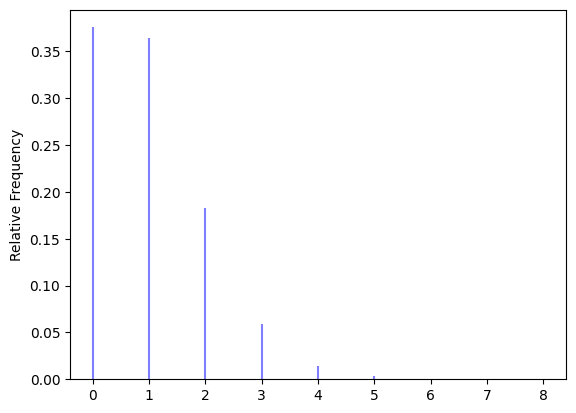

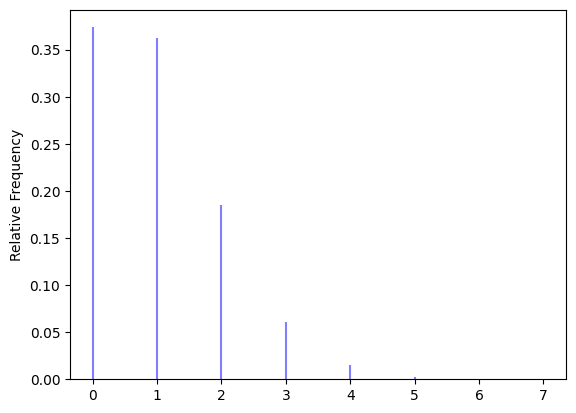

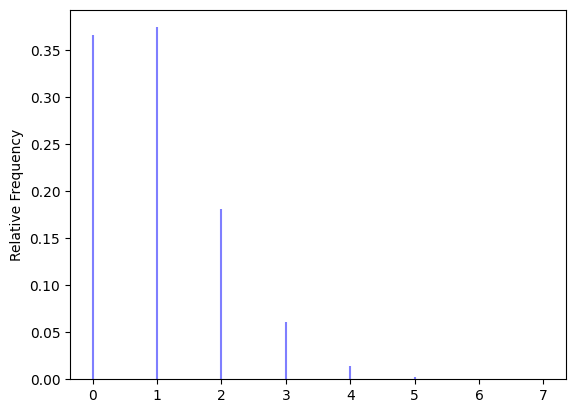

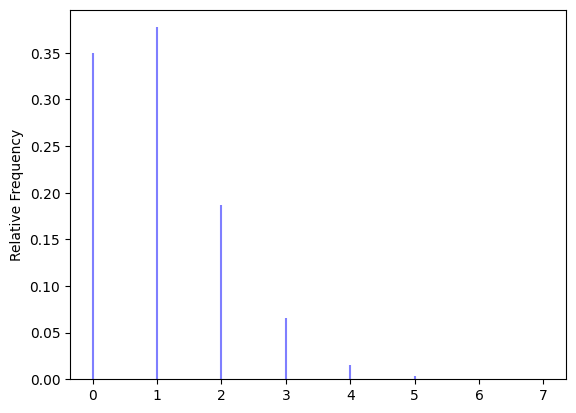

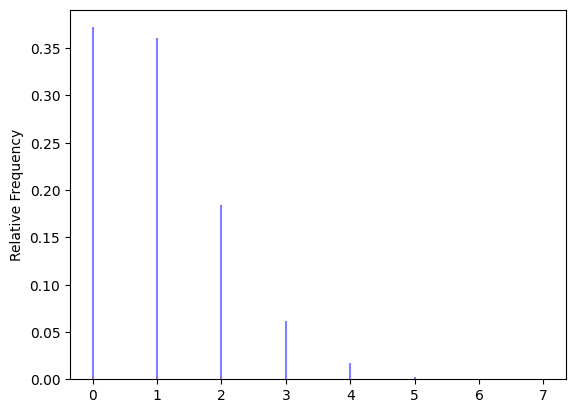

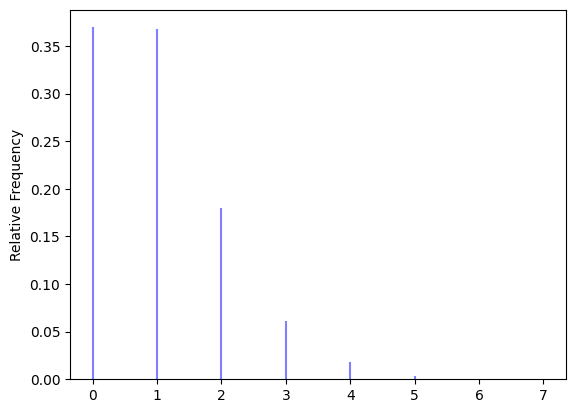

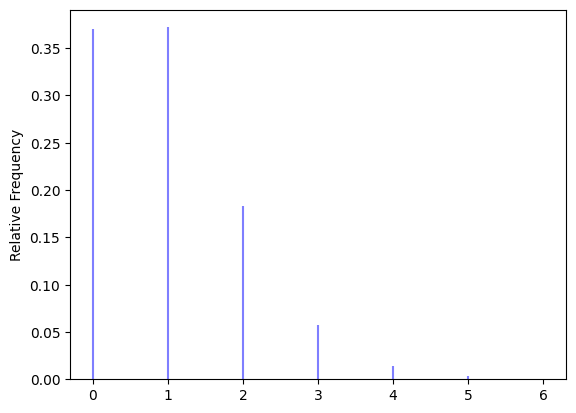

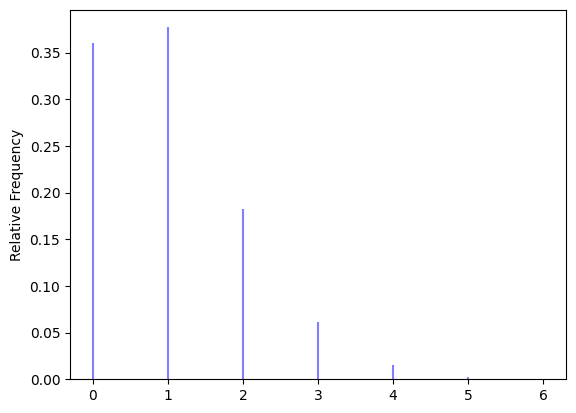

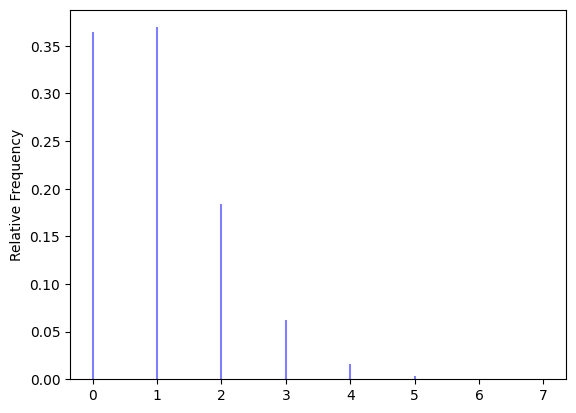

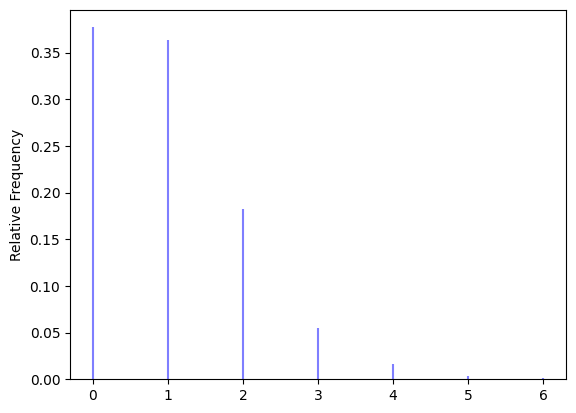

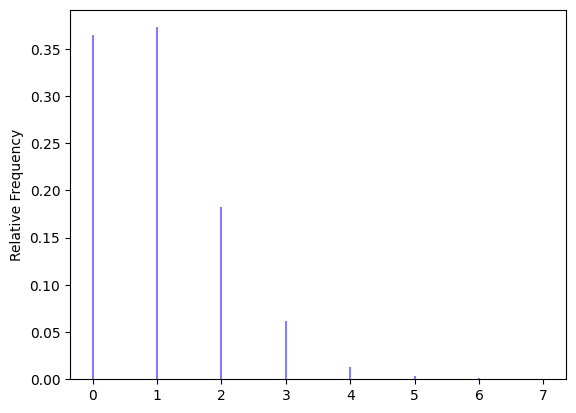

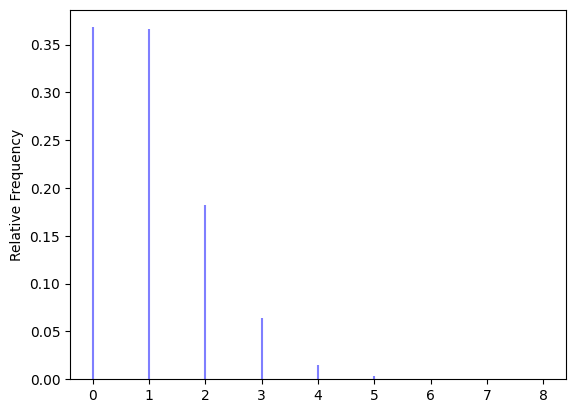

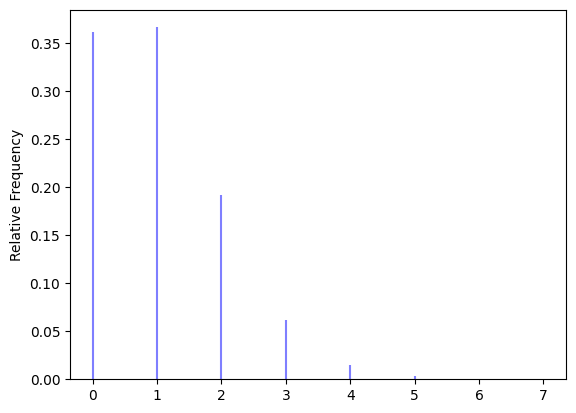

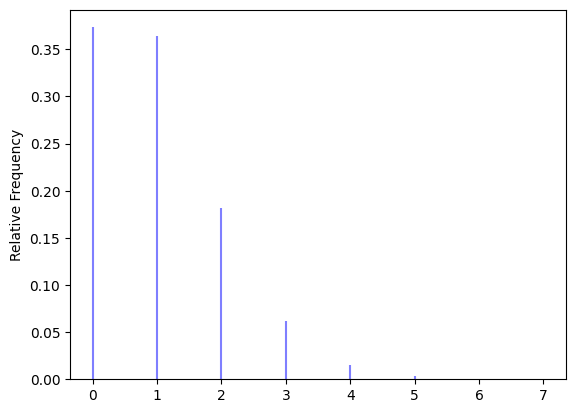

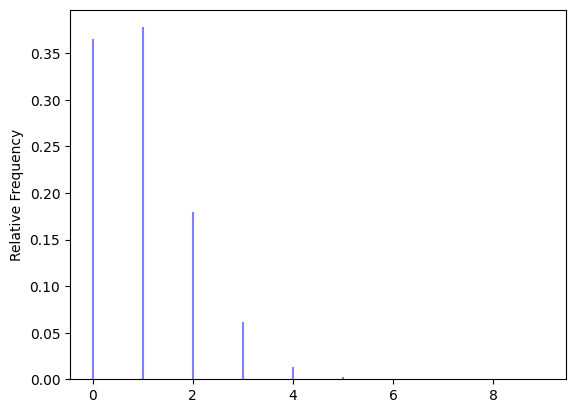

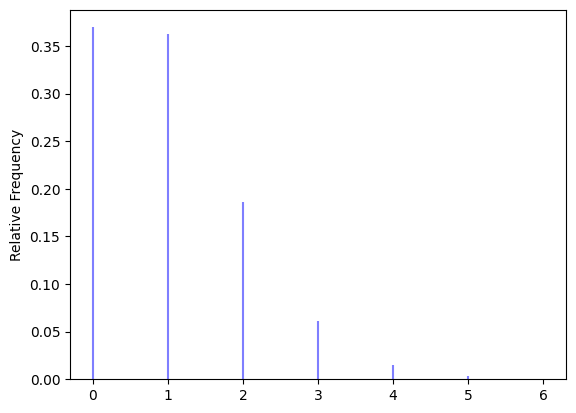

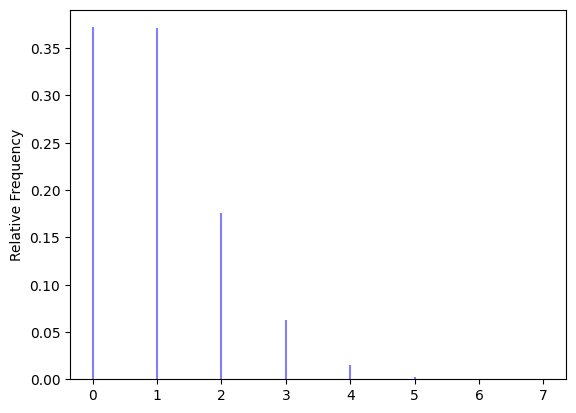

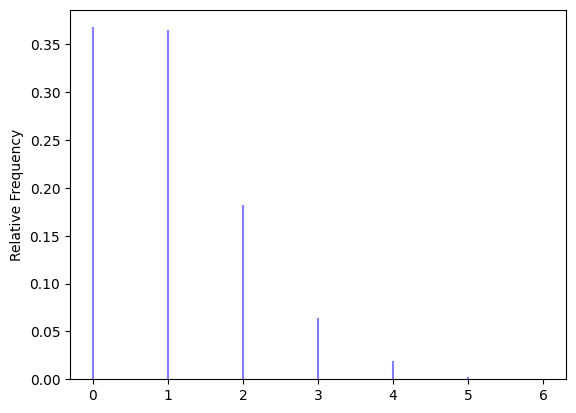

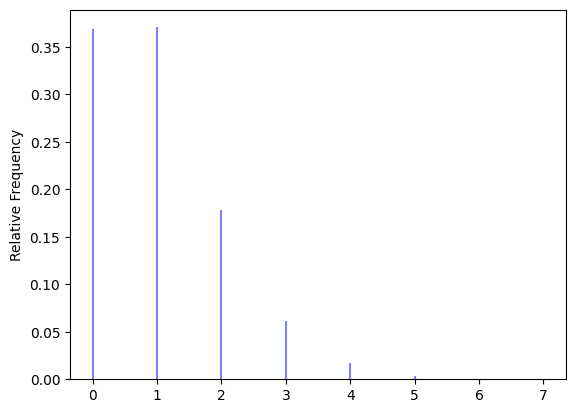

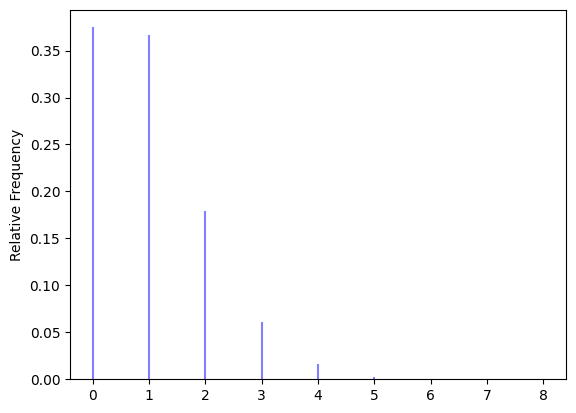

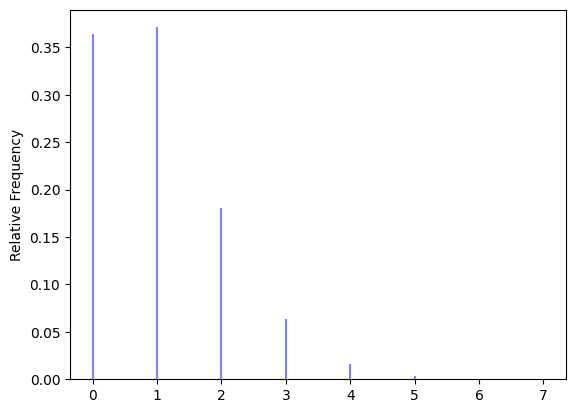

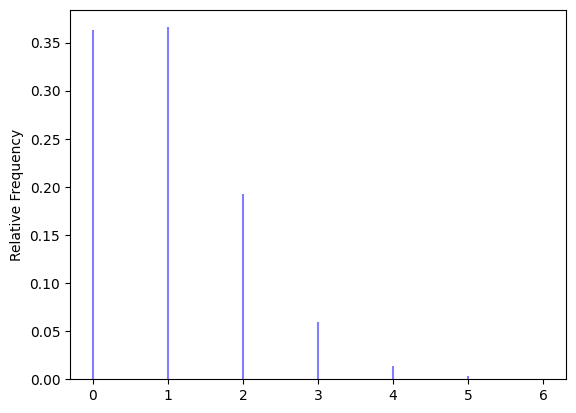

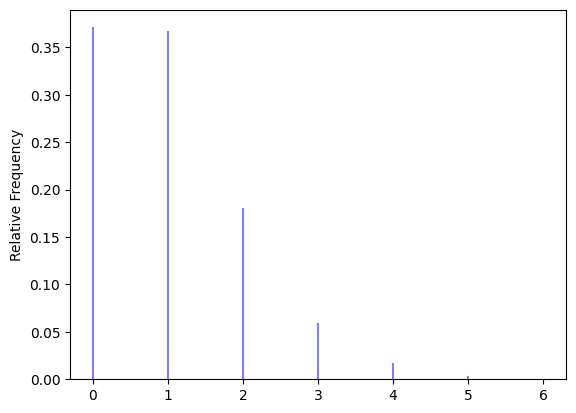

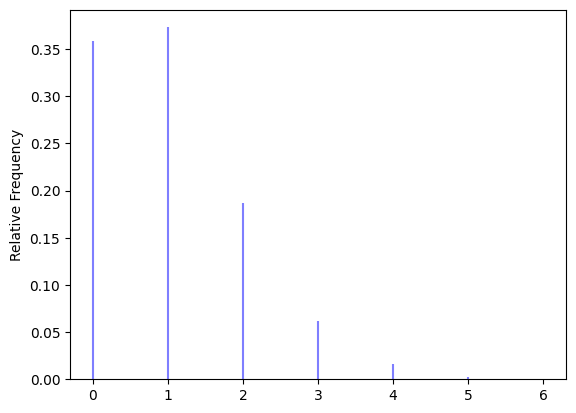

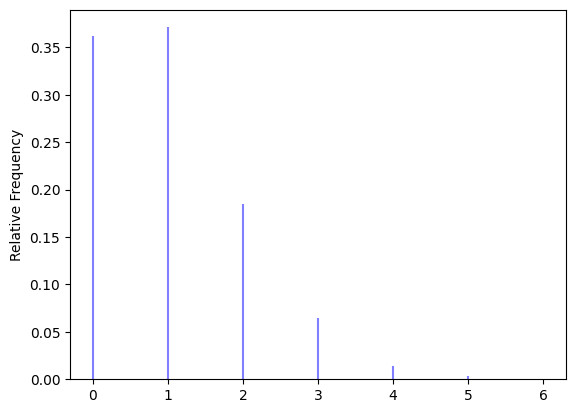

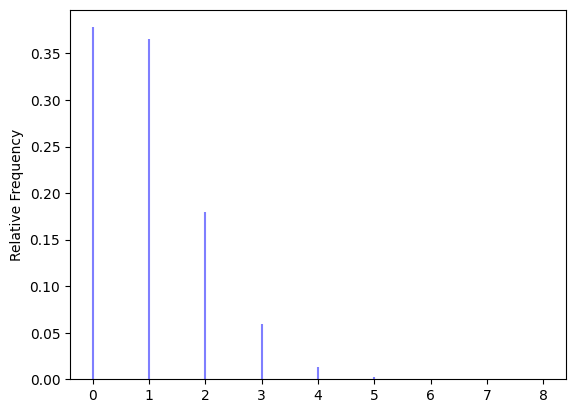

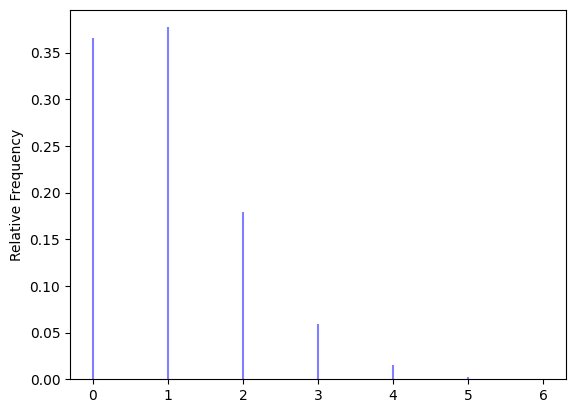

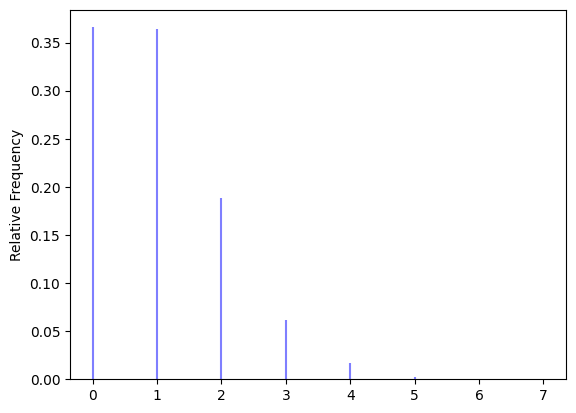

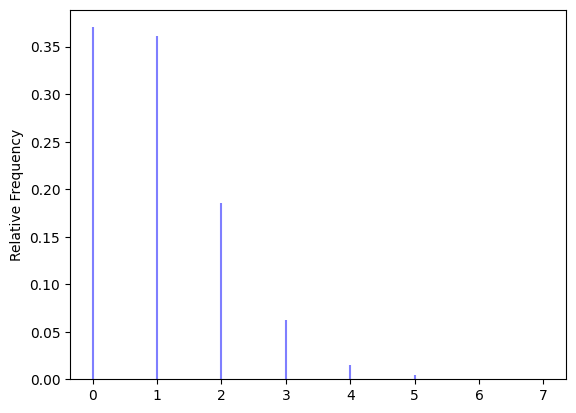

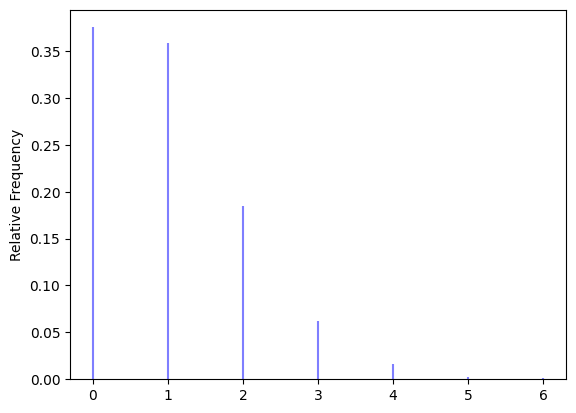

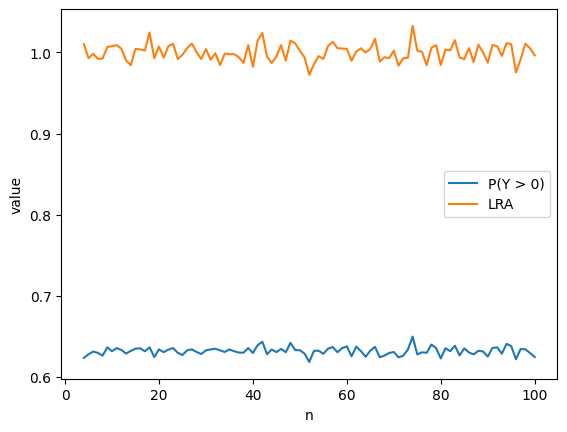

In [173]:
ns = list(range(4, 101, 1))

results = [matching_sim(n) for n in ns]

plt.figure()
plt.plot(ns, results)
plt.legend(['P(Y > 0)', 'LRA'])
plt.xlabel('n')
plt.ylabel('value')
plt.show()

### 3.1 Multiplication rule

Set up simulation for birthday problem:

In [174]:
def count_distinct_values(list):
    return len(set(list))
    
n = 30
P = BoxModel(list(range(365)), size = n, replace = True)
X = RV(P, count_distinct_values)

x = X.sim(10000)

Plot values:

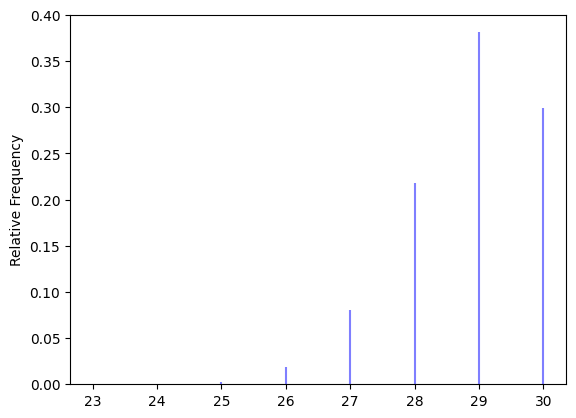

In [175]:
x.plot()

### 3.2 Law of total probability

Simulate lookaway problem:

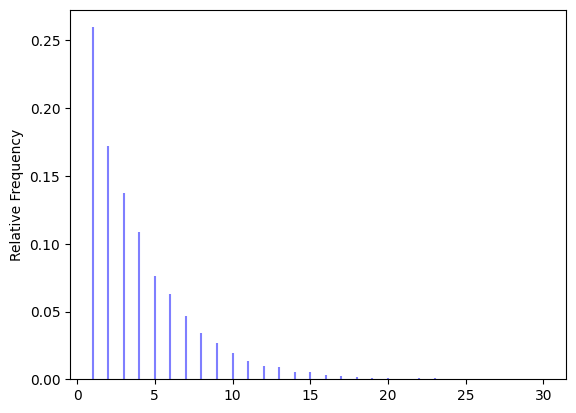

In [176]:
def is_odd(x):
    return (x % 2) == 1

def count_rounds(sequence):
    for r, pair in enumerate(sequence):
        if pair[0] == pair[1]:
            return r + 1 # +1 for 0 indexing

P = BoxModel([1, 2, 3, 4], size = 2) ** inf

X = RV(P, count_rounds)

x = X.sim(10000)

x.plot()

Calculate relative frequency of odd values:

In [177]:
x.count(is_odd) / x.count()

0.5794

### 3.7 Uniform probability measures

Simulate and plot X and Y coordinates from a uniform distribution:

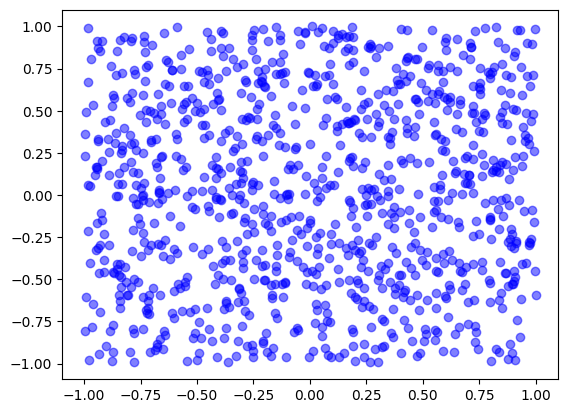

In [178]:
X, Y = RV(Uniform(-1, 1) ** 2)

(X & Y).sim(1000).plot()

Condition on distance from the center of the board being less than 1:

In [179]:
R = sqrt(X ** 2 + Y ** 2)

x_and_y = ( (X & Y) | (R < 1) ).sim(10000)

Plot the values:

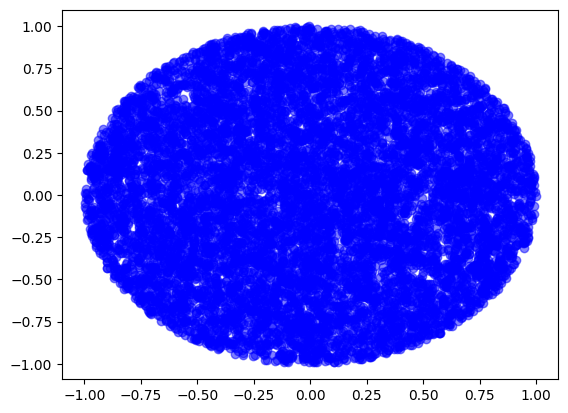

In [180]:
x_and_y.plot()

Summarize the marginal distributions in inches:

In [181]:
x = x_and_y[0]
y = x_and_y[1]

r = 12 * sqrt(x ** 2 + y ** 2) 

Plot as a histogram:

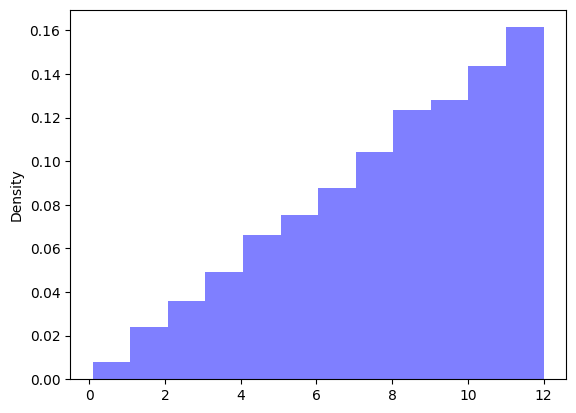

In [182]:
r.plot(bins = 12)

Find the quantiles:

In [183]:
[r.quantile(p) for p in [0.25, 0.5, 0.75]]

[5.952168331229945, 8.48999398617652, 10.389130436757908]

#### 4.2.2 Poisson distributions

Plot Poisson distributions with different parameters:

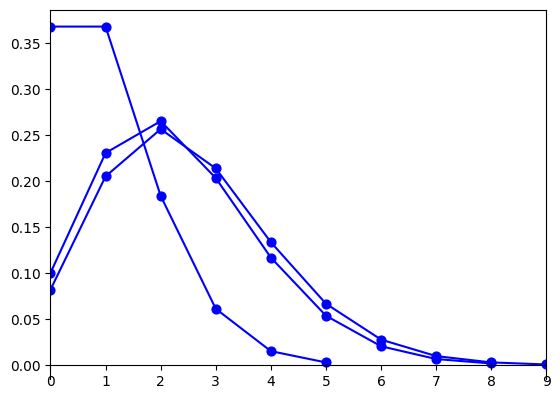

In [191]:
Poisson(1).plot()
Poisson(2.3).plot()
Poisson(2.5).plot()

Simulate 10000 values using a Poisson distribution:

In [192]:
X =  RV(Poisson(2.3))

x = X.sim(10000)
x

Index Result
0     2
1     2
2     1
3     5
4     7
5     3
6     1
7     2
8     4
....  .
9999  3

Plot the simulated values and theoretical pmf:

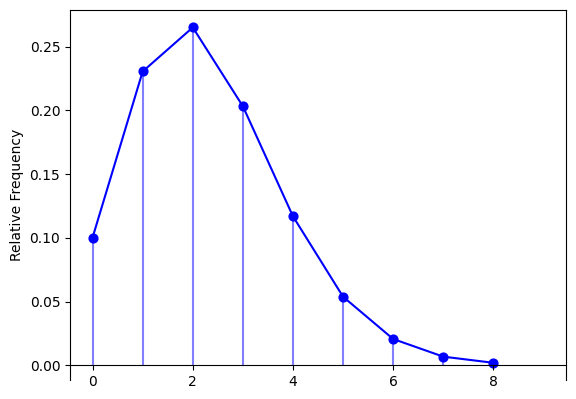

In [193]:
x.plot() 
Poisson(2.3).plot()

Find the approximate mean, variance, and standard deviation:

In [194]:
x.mean(), x.var(), x.sd()

(2.3101, 2.27933799, 1.509747657722972)

Evaluate the pmf from 0 to 4:

In [195]:
xs = list(range(5))

Poisson(2.3).pmf(xs)

array([0.10025884, 0.23059534, 0.26518464, 0.20330823, 0.11690223])

Calculate the probability of getting a value less than or equal to 13:

In [196]:
Poisson(2.3).pmf(xs).sum(), Poisson(2.3).cdf(13)

(np.float64(0.9162492807205983), np.float64(0.9999998428405236))

#### 4.2.3 Binomial distributions

Simulate a binomial distribution using a box model:

In [197]:
P = BoxModel({1: 13, 0: 39}, size = 5, replace = True)

X = RV(P, count_eq(1))

x = X.sim(10000)

x

Index Result
0     2
1     0
2     0
3     0
4     2
5     1
6     0
7     2
8     2
....  .
9999  3

Plot the simulated values vs. the theoretical binomial distribution:

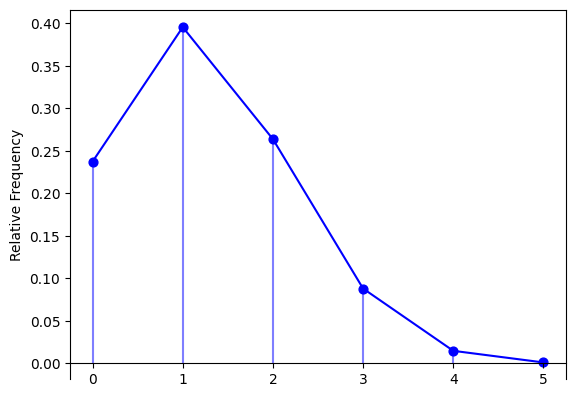

In [198]:
x.plot()

Binomial(n = 5, p = 13 / 52).plot() 

### 4.3 Continuous random variables: Probability density functions

Define and simulate a random variable corresponding to -log(1-U) of a uniform value:

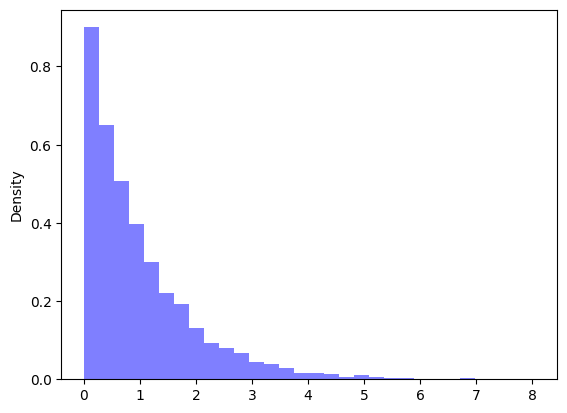

In [199]:
U = RV(Uniform(0, 1))

X = -log(1 - U)

x = X.sim(10000)

x.plot()


Compare to the exponential distribution:

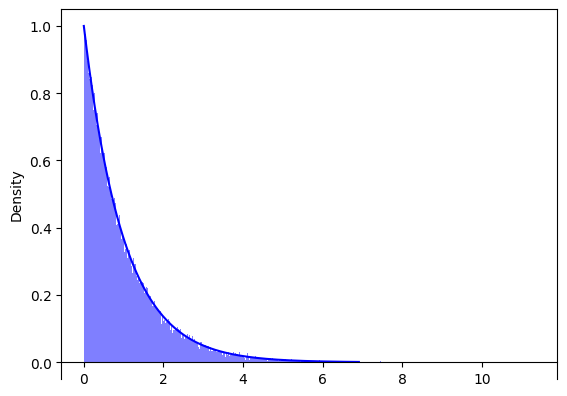

In [200]:
X.sim(100000).plot(bins=1000)

Exponential(1).plot()

#### 4.3.3 Exponential distributions

Simulate an exponential distribution with lambda=2:

In [201]:
X = RV(Exponential(rate = 2))

x = X.sim(10000)

x

Index Result
0     0.07000854619311016
1     0.5191342370825438
2     0.15033287216770708
3     0.08492289580270326
4     0.14375448921322823
5     0.8321570691985791
6     0.012232233154629965
7     0.9412285171213888
8     0.10179530732773225
....  ...................
9999  0.36958150841738996

Plot simulated values vs. theoretical distribution:

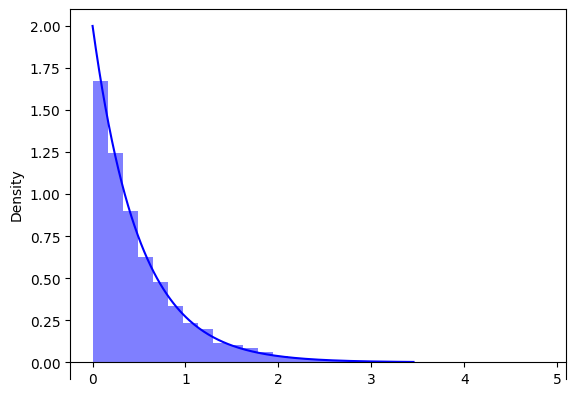

In [202]:
x.plot()

Exponential(rate = 2).plot() 

Compare means:

In [203]:
x.mean(), Exponential(rate = 2).mean()

(0.5098525937009019, np.float64(0.5))

Compare standard distributions:

In [204]:
x.sd(), Exponential(rate = 2).sd()

(0.5086650230474996, np.float64(0.5))

Change rate through transformation:

In [205]:
U = RV(Exponential(1))

X = (1 / 2) * U

Compare distributions:

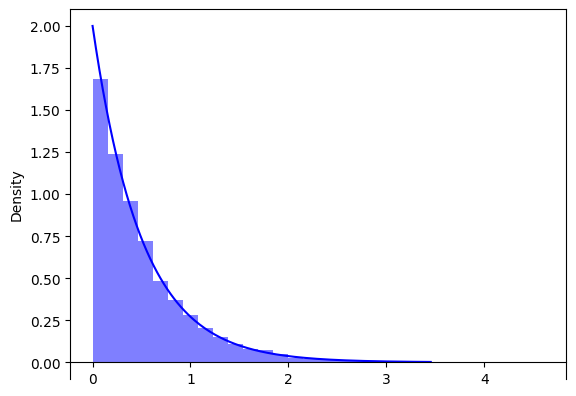

In [206]:
X.sim(10000).plot()

Exponential(rate = 2).plot()

### 4.4 Cumulative distribution functions

Simualte cumulative distribution of exponential:

In [207]:
Exponential(1).cdf(1)

np.float64(0.6321205588285577)

Simulate cdf of binomial:

In [208]:
Binomial(3, 0.5).cdf(2)

np.float64(0.875)

Simulate car insurance policy claims using exponential:

In [209]:
I, Y = RV(BoxModel([0, 1], probs = [0.94, 0.06]) * Exponential(rate = 1 / 4.3))

X = I * Y

x = X.sim(10000)

x

Index Result
0     3.5648381606586006
1     0.0
2     0.9208046503751347
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
....  ...
9999  0.0

Plot values:

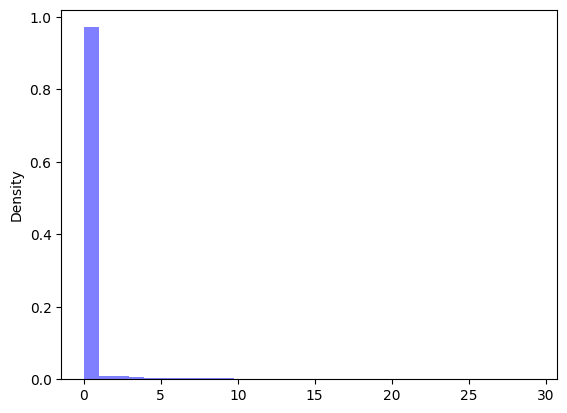

In [210]:
x.plot()

Condition on policies with 1 or more claims:

In [211]:
x_given_not0 = (X | (X > 0) ).sim(10000)

x_given_not0

Index Result
0     5.871837271514262
1     8.467786164929326
2     9.768142309395198
3     0.3982706602070877
4     14.496845115407034
5     0.82115798169966
6     1.413866724796278
7     4.120093947952238
8     5.823641982128647
....  .................
9999  5.903967699934321

Plot simulated values vs. exponential with rate 1/4.3:

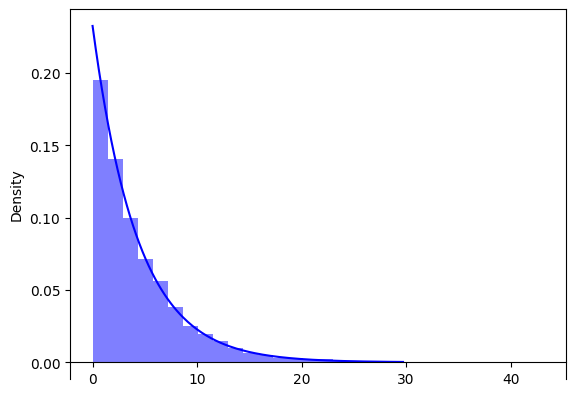

In [212]:
x_given_not0.plot()

Exponential(rate = 1 / 4.3).plot()

### 4.5 Quantile functions

Evaluate theoretical quantiles of normal distribution:

In [213]:
Normal(30, 10).quantile(0.25)

np.float64(23.255102498039182)

Evaluate theoretical quantiles of exponential distribution with rate 1:

In [214]:
Exponential(1).quantile(0.25)

np.float64(0.2876820724517809)

#### 4.5.1 One ring spinner to rule them all?

Simulate and plot square root of uniform distribution:

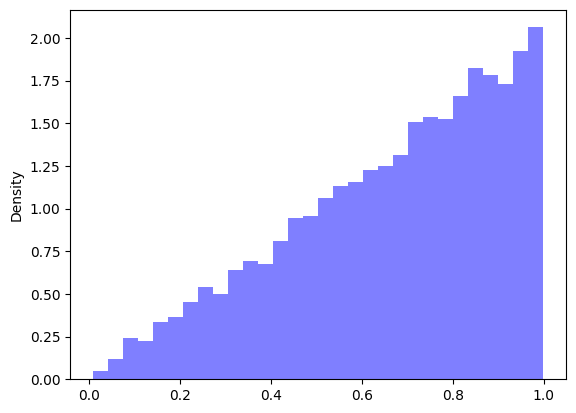

In [215]:
U = RV(Uniform(0, 1))

X = sqrt(U)

X.sim(10000).plot()

#### 4.6.1 Linear rescaling

Define and simulate linear rescaling of uniform distribution:

In [216]:
U = RV(Uniform(0, 1))

X = 200 + 600 * U

(U & X).sim(10)

Index Result
0     (0.9212812077125219, 752.7687246275132)
1     (0.6366481210935796, 581.9888726561478)
2     (0.04306771904806683, 225.84063142884008)
3     (0.5939079577882269, 556.3447746729362)
4     (0.3055881413733891, 383.3528848240335)
5     (0.9811893496620894, 788.7136097972536)
6     (0.3659735142481917, 419.584108548915)
7     (0.5162406000118507, 509.7443600071104)
8     (0.6307656950200624, 578.4594170120374)
9     (0.6421210456947338, 585.2726274168404)

Plot distribution:

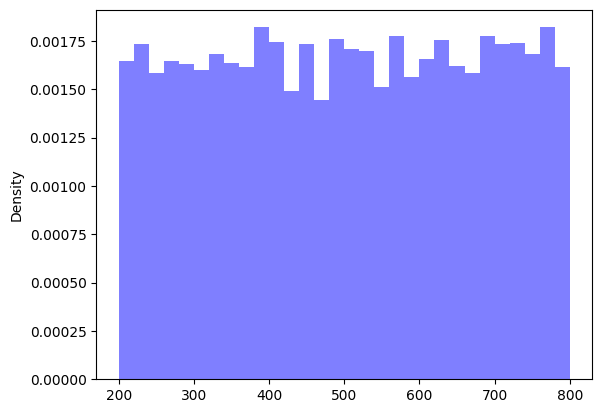

In [217]:
X.sim(10000).plot()

Find mean of uniform distribution vs. linear rescaling:

In [218]:
U.sim(10000).mean(), X.sim(10000).mean()

(0.49677695385701626, 497.5998387411383)

Find standard deviation of uniform distribution vs. linear rescaling:

In [219]:
U.sim(10000).sd(), X.sim(10000).sd()

(0.2876254390873187, 173.28793769134955)

Define and simulate linear rescaling of uniform distribution st. V=1-U:

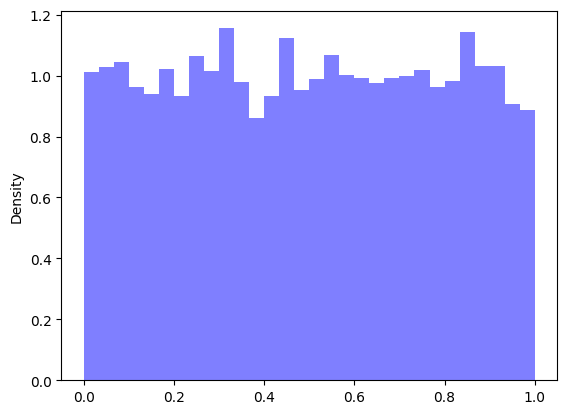

In [220]:
P = Uniform(0, 1)
U = RV(P)

V = 1 - U

V.sim(10000).plot()
plt.show()

Define and simulate linear rescaling of standard normal distribution:

In [221]:
Z = RV(Normal(0, 1))

X = 500 + 100 * Z

(Z & X).sim(10)

Index Result
0     (-0.5613786426906224, 443.8621357309378)
1     (-0.44060059453643247, 455.93994054635675)
2     (0.11732482874983198, 511.7324828749832)
3     (-0.6835858318503016, 431.64141681496983)
4     (-0.014596629200211363, 498.5403370799789)
5     (-0.541027914625246, 445.8972085374754)
6     (-1.5167269691307126, 348.32730308692874)
7     (-1.536520678005166, 346.3479321994834)
8     (-0.9691847135682093, 403.08152864317907)
9     (-1.5159935544844712, 348.4006445515529)

Simulate and plot 10000 values for rescaling, and compare to normal distribution with mean 500 and standard distribution 100:

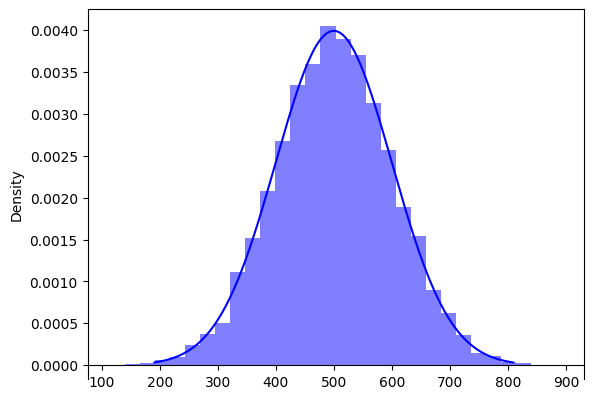

In [222]:
x = X.sim(10000)

x.plot()
Normal(500, 100).plot()

Find mean and standard deviation of simulated values:

In [223]:
x.mean(), x.sd()

(500.5876186817987, 100.2793851314179)

#### 4.6.2 Nonlinear transformations of random variables

Define a logarithmic rescaling of the uniform distribution:

In [224]:
P = Uniform(0, 1)
U = RV(P)

X = -log(1 - U)

x = X.sim(100)

Create a rug plot:

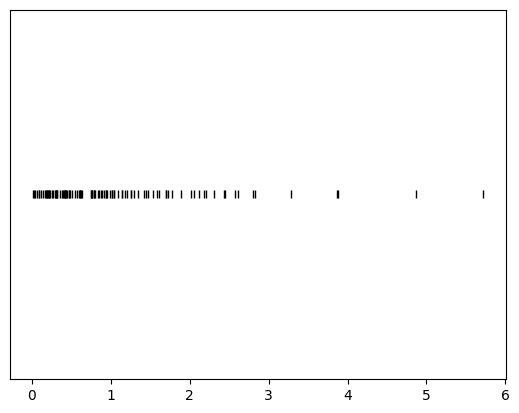

In [225]:
x.plot('rug')

Compare means before and after non-linear rescaling:

In [226]:
(U & X).sim(10000).mean()

(0.5022191313955887, 0.9979356103178754)

Create distribution by squaring a uniform distribution with values between -1 and 1:

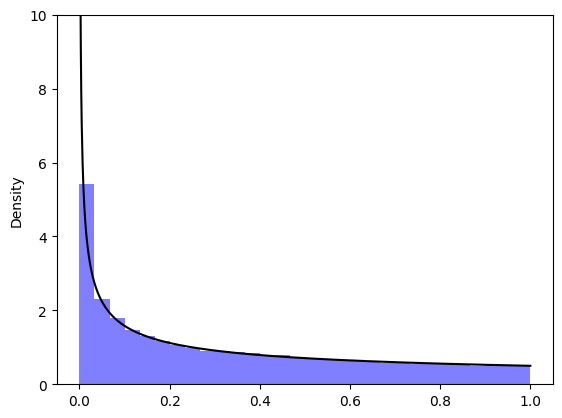

In [227]:
X = RV(Uniform(-1, 1))
Y = X ** 2

plt.figure()

Y.sim(100000).plot()

from numpy import *
y = linspace(0.001, 1, 1000)
plt.plot(y, 0.5 / sqrt(y), 'k-');
plt.ylim(0, 10);

plt.show()

#### 4.7.1 Joint probability mass functions

Simulate joint Poisson distributions with rates 1.2 and 1.1:

In [228]:
X, Y = RV(Poisson(1.2) * Poisson(1.1))

x_and_y = (X & Y).sim(10000)

x_and_y

Index Result
0     (3, 0)
1     (0, 2)
2     (0, 2)
3     (0, 4)
4     (1, 0)
5     (2, 0)
6     (4, 2)
7     (0, 2)
8     (1, 1)
....  ......
9999  (0, 0)

Tabulate relative frequencies:

In [229]:
x_and_y.tabulate(normalize = True)

Value  Relative Frequency
(0, 0) 0.1013
(0, 1) 0.1053
(0, 2) 0.0629
(0, 3) 0.0249
(0, 4) 0.0059
(0, 5) 0.0009
(0, 6) 0.0004
(0, 7) 0.0002
(1, 0) 0.1178
(1, 1) 0.1286
(1, 2) 0.0712
(1, 3) 0.0291
(1, 4) 0.0078
(1, 5) 0.0014
(1, 6) 0.0002
(1, 7) 0.0001
(2, 0) 0.0729
(2, 1) 0.0814
(2, 2) 0.0429
...... ......
(8, 0) 0.0001
 Total 1.0

Create a tile plot:

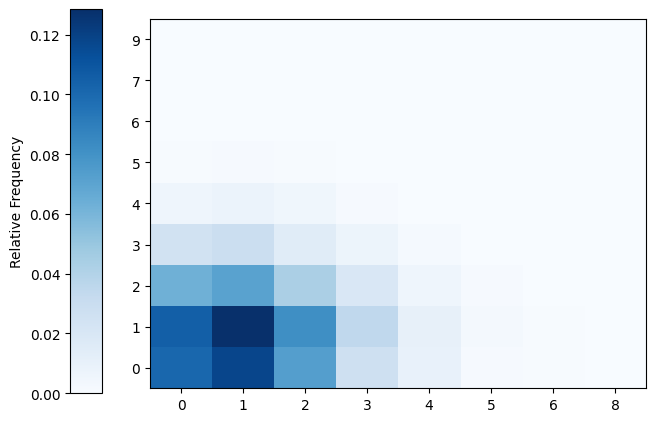

In [230]:
x_and_y.plot('tile')

#### 4.8.1 Discrete random variables: Conditional probability mass functions

Define conditional dice probability space using two discrete uniform distributions:

In [231]:
def conditional_dice():
  x = DiscreteUniform(1, 4).draw()
  if x == 1:
    y = 1
  else:
    y = DiscreteUniform(1, x).draw()
  return x, y

X, Y = RV(ProbabilitySpace(conditional_dice))

Simulate and plot 10000 values:

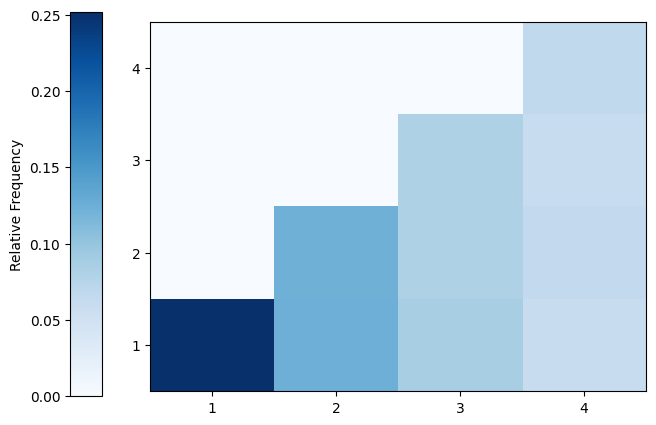

In [232]:
(X & Y).sim(10000).plot('tile')

Simulate and plot 10000 values for only Y:

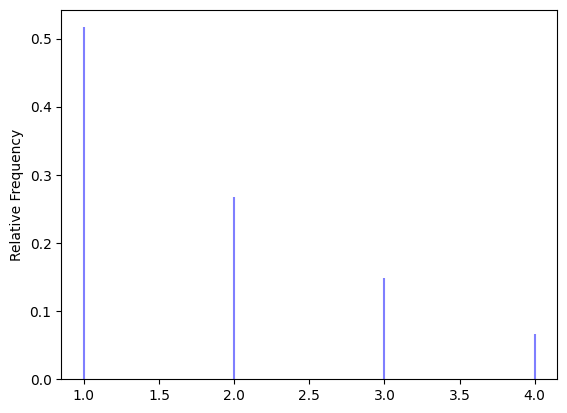

In [233]:
Y.sim(10000).plot()

Simulate and plot conditional distribution of X given Y=2:

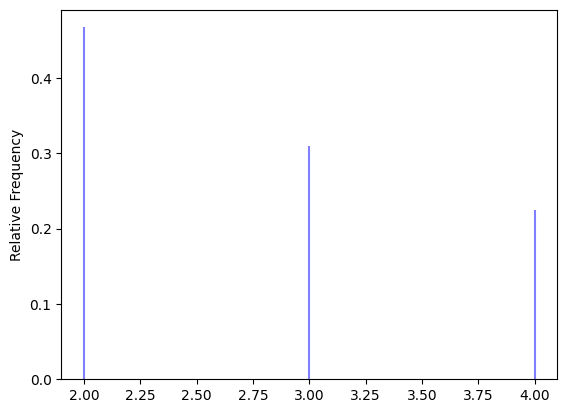

In [234]:
(X | (Y == 2) ).sim(10000).plot()

#### 4.8.2 Continuous random variables: Conditional probability density functions

Simulate joint distribution using exponential and uniform distributions:

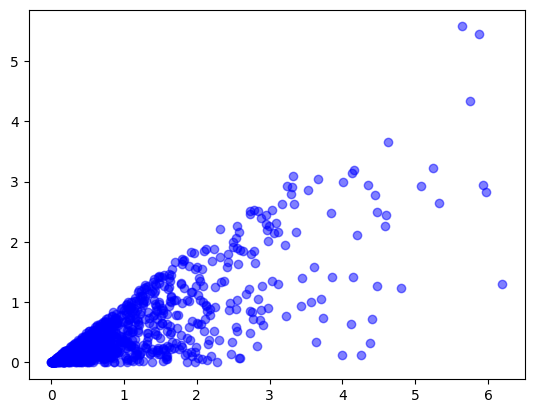

In [236]:
X, U = RV(Exponential(1) * Uniform(0, 1))

Y = X * U

plt.figure()
(X & Y).sim(1000).plot()
plt.show()

Simulate marginal distribution of Y:

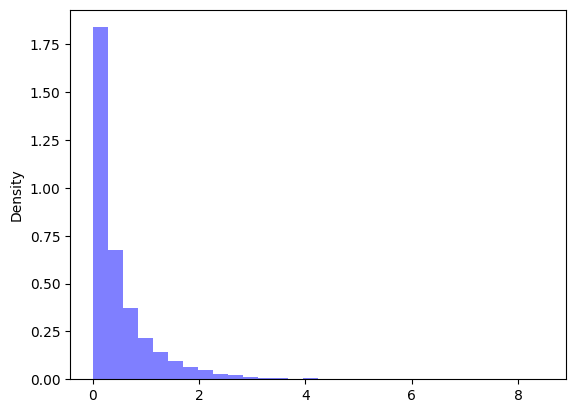

In [237]:
plt.figure()
Y.sim(10000).plot()
plt.show()

### 4.9 Independence of random variables

Simulate random variables, with X having an exponential distribution and Y having a uniform distribution:

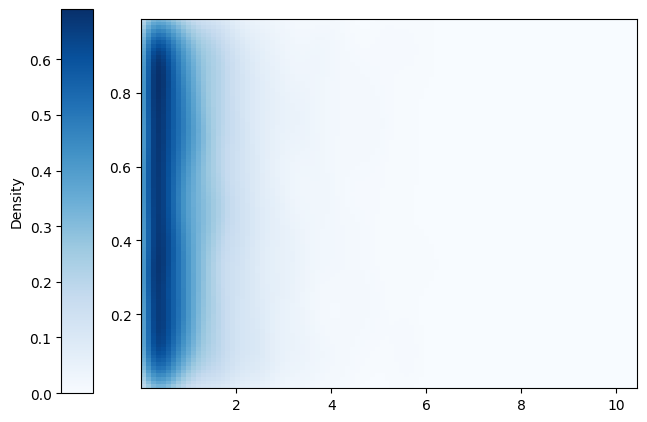

In [238]:
X, Y = RV(Exponential(1) * Uniform(0, 1))

plt.figure()
(X & Y).sim(10000).plot('density')
plt.show()

Simulate conditional distributions, conditioning on Y:

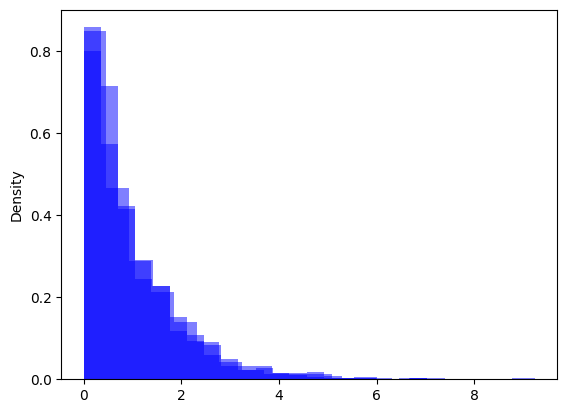

In [239]:
plt.figure()
(X | (abs(Y - 0.1) < 0.05) ).sim(1000).plot(bins = 20)
(X | (abs(Y - 0.5) < 0.05) ).sim(1000).plot(bins = 20) 
(X | (abs(Y - 0.7) < 0.05) ).sim(1000).plot(bins = 20) 
plt.show()

Simulate conditional distributions, conditioning on X:

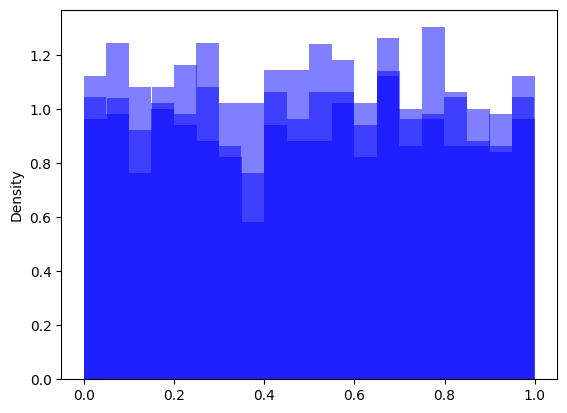

In [240]:
plt.figure()
(Y | (abs(X - 0.1) < 0.05) ).sim(1000).plot(bins = 20)
(Y | (abs(X - 0.5) < 0.05) ).sim(1000).plot(bins = 20) 
(Y | (abs(X - 0.7) < 0.05) ).sim(1000).plot(bins = 20) 
plt.show()

The same simulation can also be completed by defining each distribution individually and enforcing independence:

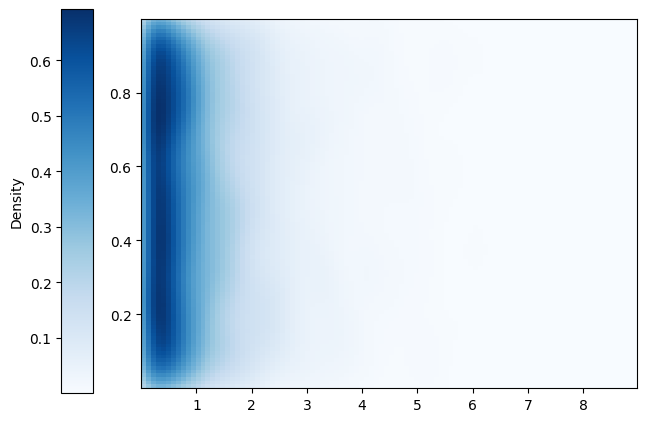

In [241]:
X = RV(Exponential(1))
Y = RV(Uniform(0, 1))

X, Y = AssumeIndependent(X, Y)

plt.figure()
(X & Y).sim(10000).plot('density')
plt.show()

### 5.1 “Expected” value

Simulate matching problem (4 labeled objects placed at random in 4 labeled spots, determine how many matches):

In [3]:
n = 4
labels = list(range(n))

def count_matches(x):
    count = 0
    for i in range(0, n, 1):
        if x[i] == labels[i]:
            count += 1
    return count

P = BoxModel(labels, size = n, replace = False)

X = RV(P, count_matches)

(RV(P) & X).sim(10)

Index Result
0     ((2, 3, 1, 0), 0)
1     ((0, 1, 3, 2), 2)
2     ((1, 0, 2, 3), 2)
3     ((0, 2, 1, 3), 2)
4     ((1, 2, 3, 0), 0)
5     ((3, 1, 2, 0), 2)
6     ((3, 0, 1, 2), 0)
7     ((2, 0, 1, 3), 1)
8     ((1, 3, 0, 2), 0)
9     ((2, 1, 3, 0), 1)

Simulate 24000 experiments:

In [4]:
x = X.sim(24000)

x.tabulate()

Value Frequency
0     9075
1     7898
2     5996
4     1031
Total 24000

Plot the results:

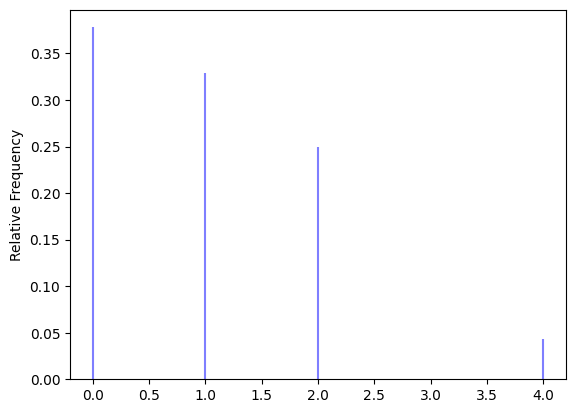

In [5]:
x.plot()

Find the average number of matches:

In [6]:
x.sum(), x.sum() / 24000, x.mean()

(24014, 1.0005833333333334, 1.0005833333333334)

Define and simulate 10000 points using an exponential distribution with rate 1:

In [7]:
X = RV(Exponential(1))

x = X.sim(10000)

x

Index Result
0     3.2739693291052117
1     1.8759884016609711
2     1.0396377002392445
3     0.29068043533725657
4     2.1399549901850783
5     1.0832633837828947
6     0.06464981709693156
7     1.6360521848458247
8     1.2575643638710645
....  ..................
9999  1.2479627132170124

Find the average value:

In [8]:
x.sum(), x.sum() / 10000, x.mean()

(10116.12285473416, 1.011612285473416, 1.011612285473416)

Repeat the matching problem and plot running averages by repetition:

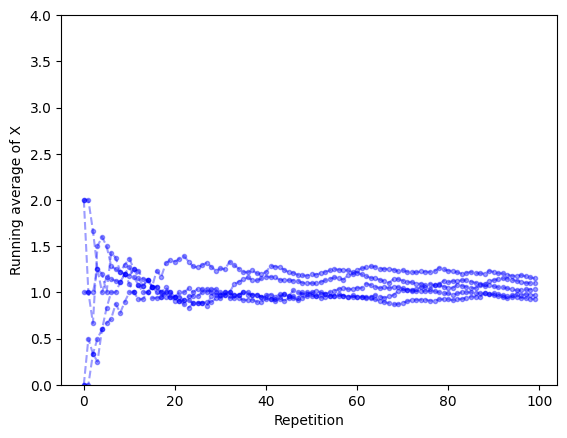

In [11]:
rmax = 100

P = BoxModel([0, 1, 2, 4], probs = [9/24, 8/24, 6/24, 1/24]) ** rmax

X = RV(P)

Xbar_r = RandomProcess(P)

for r in range(rmax):
    Xbar_r[r] = X[0:(r + 1)].apply(mean)

Xbar_r.sim(5).plot(tmax = rmax)

plt.ylim(0, 4);
plt.xlabel('Repetition');
plt.ylabel('Running average of X');

### 5.2 “Law of the unconscious statistician” (LOTUS)

Define and simulate a random variable with a uniform distribution from -1 to 1, and its square:

In [12]:
X = RV(Uniform(-1, 1))

Y = X ** 2

y = Y.sim(10000)

y.mean()

0.33688758633053906

Plot the square:

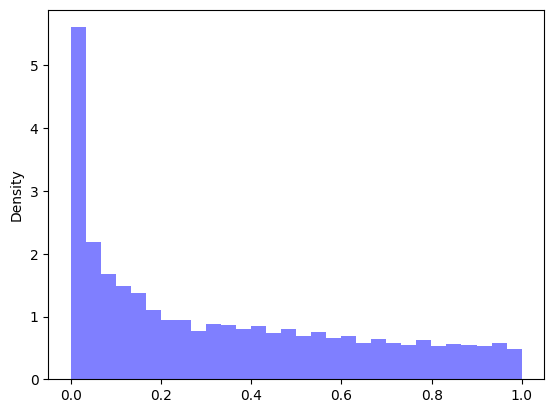

In [13]:
y.plot()

### 5.3 Variance and standard deviation

Define and simulate Guillermo's net winnings in a game of roulette:

In [14]:
W = RV(BoxModel([-1, 1], probs = [20 / 38, 18 / 38]))

(W & (W - (-2 / 38)) ** 2).sim(10)

Index Result
0     (1, 1.1080332409972298)
1     (-1, 0.8975069252077563)
2     (-1, 0.8975069252077563)
3     (1, 1.1080332409972298)
4     (-1, 0.8975069252077563)
5     (-1, 0.8975069252077563)
6     (-1, 0.8975069252077563)
7     (-1, 0.8975069252077563)
8     (-1, 0.8975069252077563)
9     (1, 1.1080332409972298)

Simulate 38000 values:

In [15]:
w = W.sim(38000)

w

Index Result
0     -1
1     -1
2     -1
3     -1
4     1
5     -1
6     1
7     1
8     -1
..... .
37999 1

Tabulate the values:

In [16]:
w.tabulate()

Value Frequency
-1    20111
1     17889
Total 38000

Plot the values:

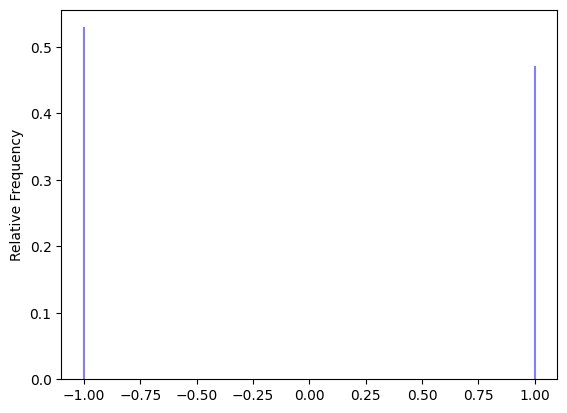

In [17]:
w.plot()

Find the mean:

In [18]:
w.mean()

-0.05847368421052632

Find and tabulate squared deviations:

In [19]:
((w - w.mean()) ** 2).tabulate()

Value              Frequency
0.8864718033240997 20111
1.1203665401662048 17889
             Total 38000

Approximate the variance:

In [20]:
((w - w.mean()) ** 2).mean(), w.var()

(0.9965808282548475, 0.9965808282548475)

Approximate the standard deviation:

In [21]:
sqrt(w.var()), w.sd()

(0.9982889502818548, 0.9982889502818548)

Approximate the standard deviation of an exponential distribution with rate 1:

In [22]:
X = RV(Exponential(1))

X.sim(10000).sd()

1.0066321543227175

### 5.4 Covariance and correlation

Approximate covariance of two random variables:

In [27]:
P = DiscreteUniform(1, 4) ** 2
X = RV(P, sum)
Y = RV(P, max)

xy = (X & Y).sim(10000)

xy

Index Result
0     (5, 3)
1     (3, 2)
2     (4, 3)
3     (6, 4)
4     (3, 2)
5     (2, 1)
6     (6, 4)
7     (6, 4)
8     (8, 4)
....  ......
9999  (7, 4)

Create a tile plot:

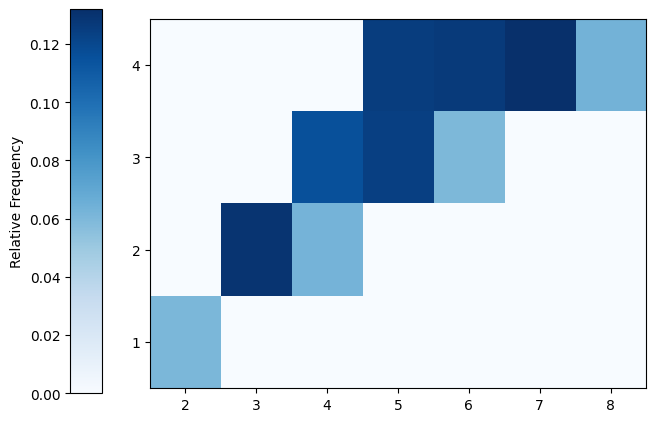

In [24]:
plt.figure()
xy.plot('tile')
plt.show()

Find the covariance:

In [29]:
xy.cov()

np.float64(1.2633323599999995)

Simulate spinning a uniform spinner twice, with X as the sum and Y as the maximum spin:

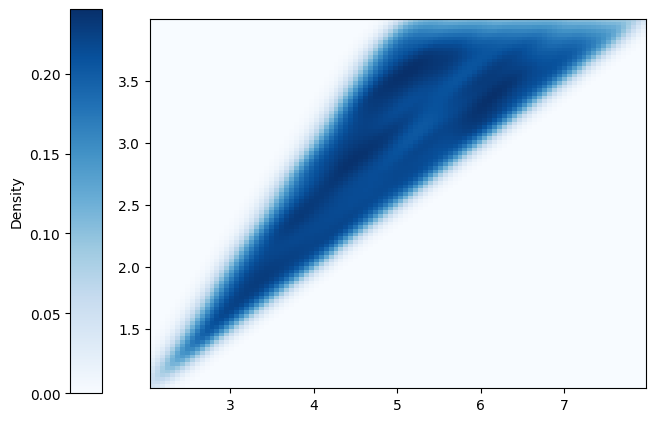

In [30]:
P = Uniform(1, 4) ** 2
X = RV(P, sum)
Y = RV(P, max)

xy = (X & Y).sim(10000)

plt.figure()
xy.plot('density')
plt.show()

Find the covariance:

In [31]:
xy.cov()

np.float64(0.7480805434207382)

#### 5.5.3 Variance of linear combinations of random variables

Simulate X and Y pairs using a bivariate normal distribution:

In [32]:
X, Y = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = 0.77))

x_and_y = (X & Y).sim(10000)

x_and_y

Index Result
0     (474.07619541011826, 382.06282288400246)
1     (528.7998590902803, 531.1592540928848)
2     (514.3753706767849, 470.1541437700681)
3     (578.9161402475946, 659.5487410855313)
4     (540.3370563713017, 601.0495378425055)
5     (423.5682945745665, 616.1582003523637)
6     (671.4466342355761, 513.8768399933068)
7     (461.61363482641076, 588.5135767014474)
8     (516.126620777098, 396.7742646693012)
....  .......................................
9999  (521.9051048255664, 500.55484323818195)

Plot the values:

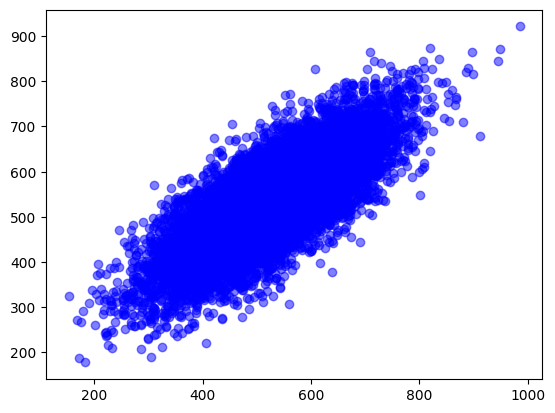

In [33]:
x_and_y.plot()

Find the means:

In [34]:
x_and_y.mean()

(525.5175975503844, 532.2162290638762)

Find the variances:

In [35]:
x_and_y.var()

(11430.104063566714, 9963.843986412441)

Find the standard deviations:

In [36]:
x_and_y.sd()

(106.9116647684747, 99.81905622882056)

Define the sum of the values:

In [37]:
x = x_and_y[0]
y = x_and_y[1]

t = x + y

t

Index Result
0     856.1390182941207
1     1059.959113183165
2     984.529514446853
3     1238.464881333126
4     1141.3865942138073
5     1039.7264949269302
6     1185.3234742288828
7     1050.1272115278582
8     912.9008854463991
....  ..................
9999  1022.4599480637482

Plot the sums:

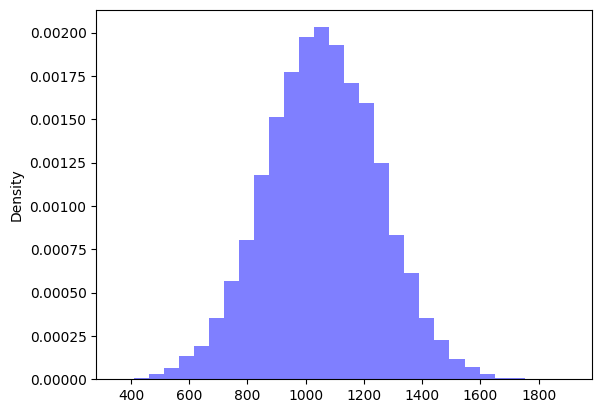

In [38]:
t.plot()

Find the mean:

In [39]:
t.mean()

1057.73382661426

Calculate the variance:

In [40]:
t.var()

37874.010057748535

Calculate the standard deviation:

In [41]:
t.sd()

194.61246120880475

Simulate with different correlations:

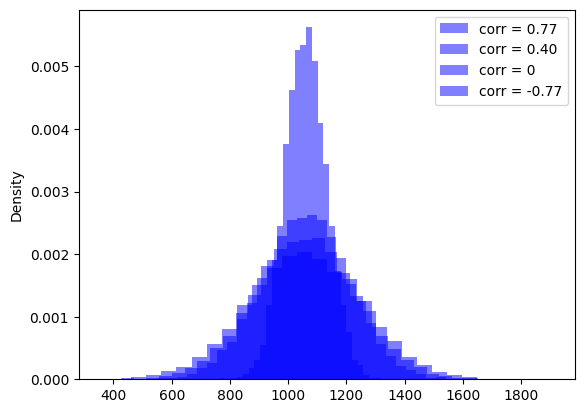

In [42]:
X2, Y2 = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = 0.4))
t2 = (X2 + Y2).sim(10000)

X3, Y3 = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = 0))
t3 = (X3 + Y3).sim(10000)

X4, Y4 = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = -0.77))
t4 = (X4 + Y4).sim(10000)

plt.figure()
t.plot()
t2.plot()
t3.plot()
t4.plot()

plt.legend(['corr = 0.77', 'corr = 0.40', 'corr = 0', 'corr = -0.77']);
plt.show()

Compare the means:

In [43]:
t.mean(), t2.mean(), t3.mean(), t4.mean()

(1057.73382661426, 1059.3125146860075, 1060.345475464974, 1060.6447154759203)

Compare the standard deviations:

In [44]:
t.sd(), t2.sd(), t3.sd(), t4.sd()

(194.61246120880475, 173.55202954349176, 148.24317525316422, 71.16219638646757)

Define and plot the difference in X and Y, instead of the sum:

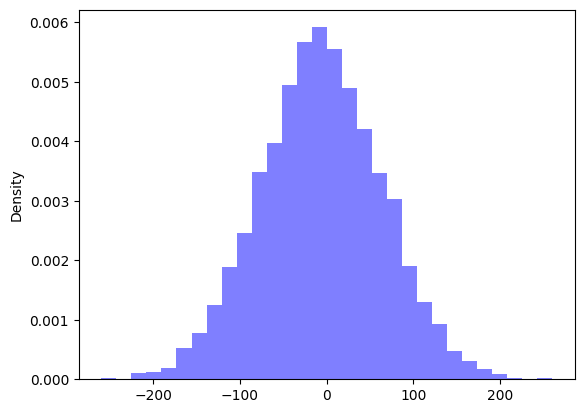

In [45]:
d = x - y

d.plot()

Compare difference values under different correlations:

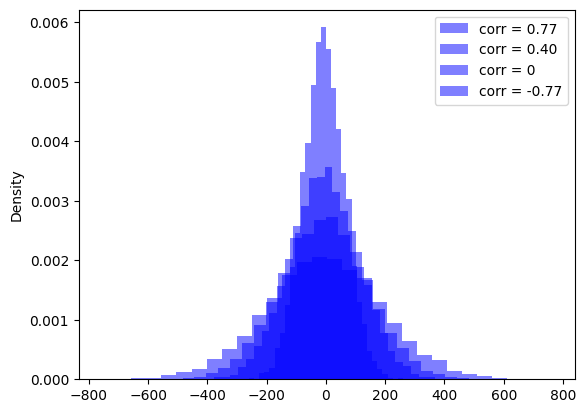

In [46]:
X2, Y2 = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = 0.4))
d2 = (X2 - Y2).sim(10000)

X3, Y3 = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = 0))
d3 = (X3 - Y3).sim(10000)

X4, Y4 = RV(BivariateNormal(mean1 = 527, sd1 = 107, mean2 = 533, sd2 = 100, corr = -0.77))
d4 = (X4 - Y4).sim(10000)

plt.figure()
d.plot()
d2.plot()
d3.plot()
d4.plot()

plt.legend(['corr = 0.77', 'corr = 0.40', 'corr = 0', 'corr = -0.77']);
plt.show()

Compare the means:

In [47]:
d.mean(), d2.mean(), d3.mean(), d4.mean()

(-6.698631513490877,
 -5.812982542517375,
 -6.724939621876896,
 -5.854323053231881)

Compare the standard deviations:

In [48]:
d.sd(), d2.sd(), d3.sd(), d4.sd()

(70.09911584470852, 114.24410244196802, 145.57887492022905, 193.70679860363308)

Compare the 90th percentiles:

In [49]:
d.quantile(0.9), d2.quantile(0.9), d3.quantile(0.9), d4.quantile(0.9)

(82.77887851105335, 142.25404854412767, 178.9966060745033, 239.55510081869284)

### 5.6 Conditional expected value

Simulate join discrete uniform distribution, then find max given that X = 6:

In [50]:
U1, U2 = RV(DiscreteUniform(1, 4) ** 2)

X = U1 + U2

Y = (U1 & U2).apply(max)

y_given_Xeq6 = (Y | (X == 6) ).sim(3000)

y_given_Xeq6

Index Result
0     4
1     3
2     4
3     4
4     4
5     4
6     3
7     4
8     4
....  .
2999  4

Summarize the values:

In [51]:
y_given_Xeq6.tabulate()

Value Frequency
3     1014
4     1986
Total 3000

Find the conditional mean:

In [52]:
y_given_Xeq6.mean()

3.662

Simulate conditional distribution with continuous random variables:

In [53]:
U1, U2 = RV(Uniform(1, 4) ** 2)

X = U1 + U2

Y = (U1 & U2).apply(max)

x_given_Yeq3 = (X | (abs(Y - 3) < 0.05) ).sim(1000)

x_given_Yeq3

Index Result
0     5.37711175392668
1     5.706803905957273
2     5.269201748437361
3     5.7088751663425406
4     4.187897351150432
5     4.153687456927011
6     4.9708408179599335
7     4.2914211385841625
8     4.051770437128462
...   ..................
999   4.0966672998641425

Plot the values:

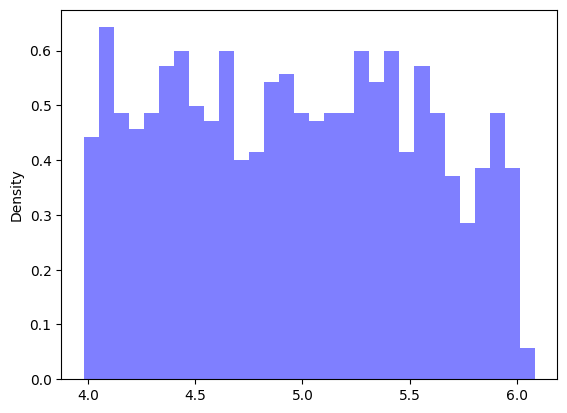

In [54]:
x_given_Yeq3.plot()
plt.show()

Find the mean:

In [55]:
x_given_Yeq3.mean()

4.964627611418949

#### 5.6.3 Law of total expectation

Simulate the lookaway problem:

In [56]:
def count_rounds(sequence):
    for r, pair in enumerate(sequence):
        if pair[0] == pair[1]:
            return r + 1

P = BoxModel([1, 2, 3, 4], size = 2) ** inf

X = RV(P, count_rounds)

x = X.sim(25000)

x

Index Result
0     3
1     5
2     32
3     2
4     4
5     2
6     1
7     3
8     2
..... .
24999 2

Plot the results:

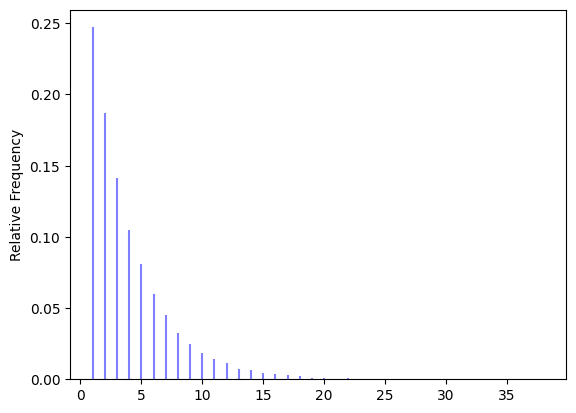

In [57]:
x.plot()

Approximate the probability that the player who starts as the pointer wins the game (which occurs if the game ends in an odd number of rounds):

In [58]:
def is_odd(u):
    return (u % 2) == 1 

x.count(is_odd) / x.count()

0.57096

Approximate the expected number of rounds:

In [59]:
x.mean()

4.01888

Approximate conditional probability that the player who starts as the pointer wins in the first round given that the player who starts as the pointer wins the game:

In [60]:
x.count_eq(1) / x.count(is_odd)

0.43295502311895756

Approximate conditional expected number of rounds given that the player who starts as the pointer wins the game:

In [61]:
x.filter(is_odd).mean()

3.5618607257951522

Approximate conditional expected number of rounds given that the player who starts as the pointer does not win the game:

In [62]:
def is_even(x):
    return (x % 2) == 0

x.filter(is_even).mean()

4.627074398657467

### 6.1 Hypergeometric distributions

Simulate drawing 5 items of 2 types using a box model, and compare to the hypergeometric distribution:

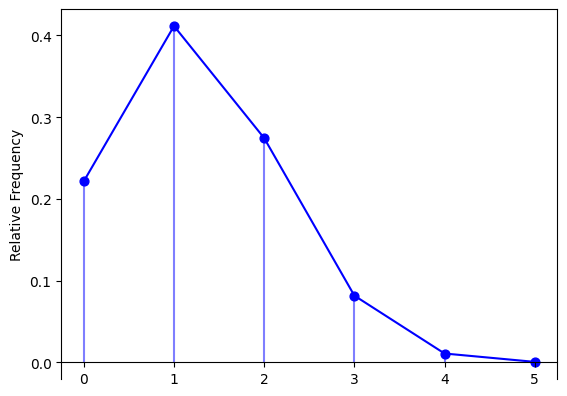

In [63]:
P = BoxModel({1: 13, 0: 39}, size = 5, replace = False)
X = RV(P, count_eq(1))
x = X.sim(10000)

x.plot()
Hypergeometric(N1 = 13, N0 = 39, n = 5).plot()
plt.show()

Compare the relative frequencies of the value 2:

In [64]:
x.count_eq(2) / 10000, Hypergeometric(N1 = 13, N0 = 39, n = 5).pmf(2)

(0.2766, np.float64(0.27427971188475386))

Compare the means:

In [65]:
x.mean(), Hypergeometric(N1 = 13, N0 = 39, n = 5).mean()

(1.2453, np.float64(1.25))

Compare the variances:

In [66]:
x.var(), Hypergeometric(N1 = 13, N0 = 39, n = 5).var()

(0.85512791, np.float64(0.8639705882352942))

### 6.2 Binomial distributions

Compare binomial distributions with different n parameters:

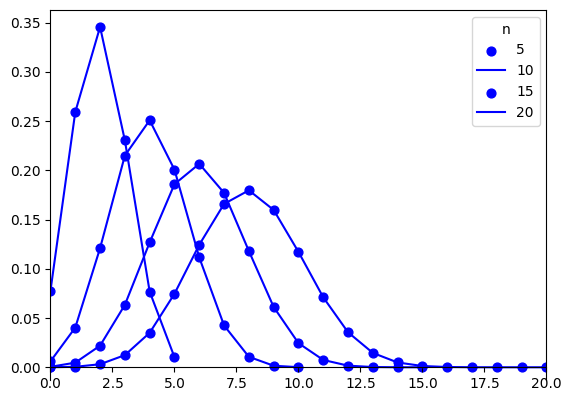

In [67]:
p = 0.4

ns = [5, 10, 15, 20]

for n in ns:
  Binomial(n, p).plot()

plt.legend(ns, title = "n")

plt.show()

Compare distributions with different p parameters:

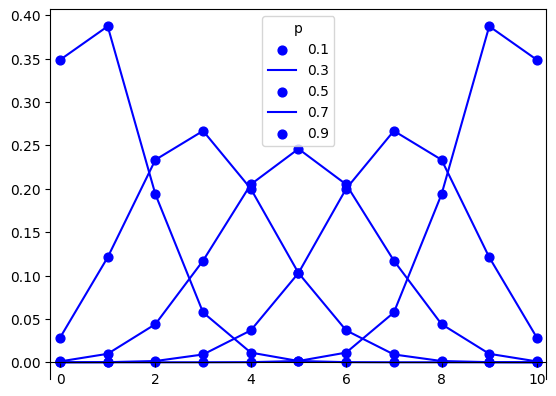

In [68]:
n = 10

ps = [0.1, 0.3, 0.5, 0.7, 0.9]

for p in ps:
  Binomial(n, p).plot()

plt.legend(ps, title = "p", loc = "upper center");
plt.xlim(-0.2, n + 0.2)

plt.show()

Compare binomial and hypergeometric distributions:

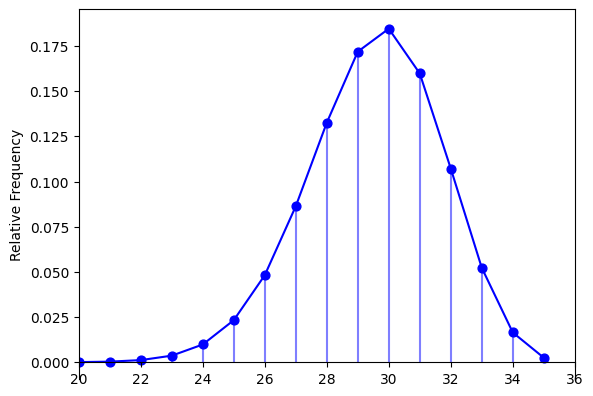

In [69]:
RV(Binomial(35, 18388 / 21812)).sim(100000).plot()
Hypergeometric(n = 35, N1 = 18388, N0 = 21812 - 18388).plot()
plt.xlim(20, 36);
plt.show()

Compare cdf values:

In [70]:
Binomial(35, 18388 / 21812).cdf(27), Hypergeometric(n = 35, N1 = 18388, N0 = 21812 - 18388).cdf(27)

(np.float64(0.17312264334846825), np.float64(0.17295479015783238))

Compare variances:

In [71]:
Binomial(35, 18388 / 21812).var(), Hypergeometric(n = 35, N1 = 18388, N0 = 21812 - 18388).var()

(np.float64(4.631752209981105), np.float64(4.624532019474508))

### 6.3 Negative Binomial distributions

Define and plot a negative binomial distribution using a geometric distribution and counting until the first success:

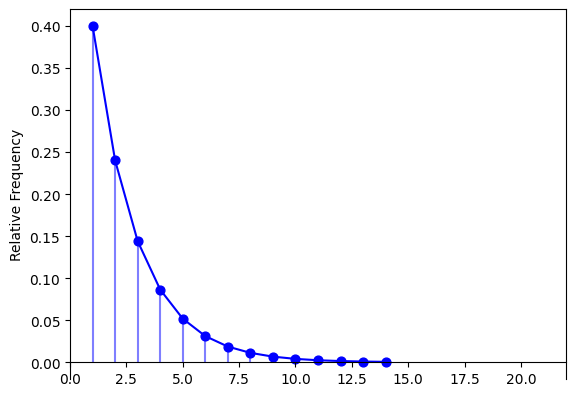

In [72]:
def count_until_first_success(omega):
    for i, w in enumerate(omega):
        if w == 1:
            return i + 1
        
P = Bernoulli(0.4) ** inf

X = RV(P, count_until_first_success)
x = X.sim(10000)

x.plot()

Geometric(0.4).plot()
plt.show()

Compare relative frequencies of the value 3:

In [73]:
x.count_eq(3) / 10000, Geometric(0.4).pmf(3)

(0.1423, np.float64(0.144))

Compare means:

In [74]:
x.mean(), Geometric(0.4).mean()

(2.5168, np.float64(2.5))

Compare variances:

In [75]:
x.var(), Geometric(0.4).var()

(3.790317760000001, np.float64(3.749999999999999))

Compare geometric distributions with different parameters:

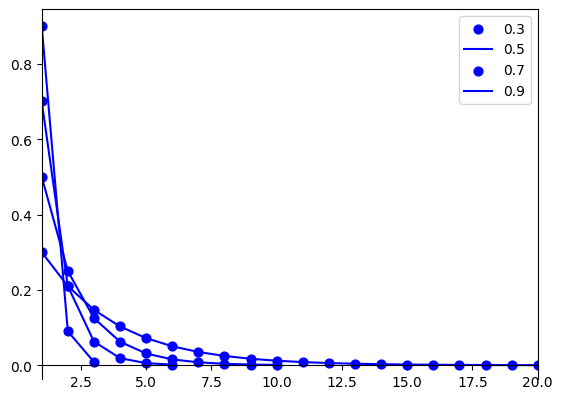

In [76]:
plt.figure()

ps = [0.3, 0.5, 0.7, 0.9]

for p in ps:
  Geometric(p).plot()

plt.legend(ps)
plt.show()

Find the probability of an odd number lower than 100:

In [77]:
Geometric(0.25).pmf(range(1, 100, 2)).sum()

np.float64(0.5714285714283882)

Simulate the lookaway challenge problem using a geomtric(0.4) distribution:

In [78]:
def count_rounds(sequence):
    for r, pair in enumerate(sequence):
        if pair[0] == pair[1]:
            return r + 1

P = BoxModel([1, 2, 3, 4], size = 2) ** inf

X = RV(P, count_rounds)

x = X.sim(25000)

x

Index Result
0     7
1     1
2     8
3     1
4     1
5     6
6     5
7     3
8     7
..... .
24999 6

Plot the results:

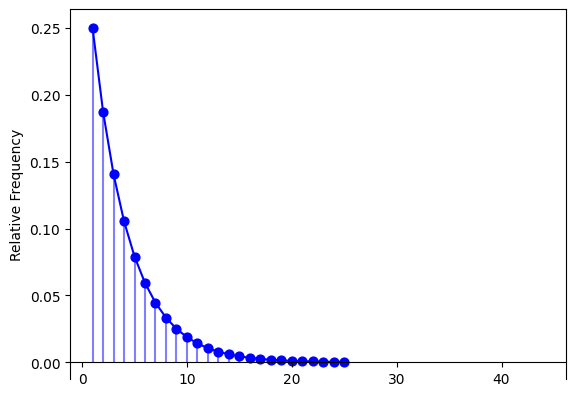

In [79]:
x.plot()

Geometric(0.25).plot()

Approximate probability that the player who starts as the pointer wins the game (which occurs if the game ends in an odd number of rounds):

In [80]:
def is_odd(u):
    return (u % 2) == 1

x.count(is_odd) / x.count()

0.57372

Simulate basketball free throw results:

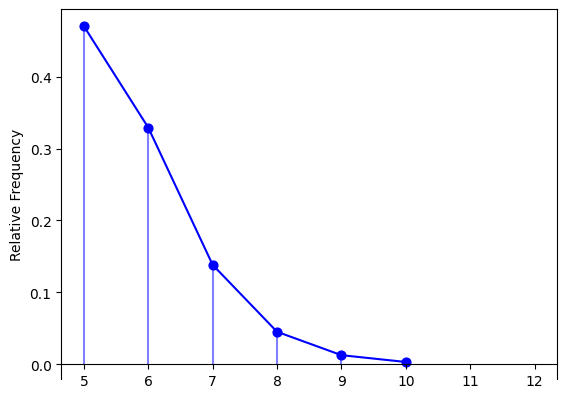

In [81]:
r = 5
def count_until_rth_success(omega):
    trials_so_far = []
    for i, w in enumerate(omega):
        trials_so_far.append(w)
        if sum(trials_so_far) == r:
            return i + 1 
        
P = Bernoulli(0.86) ** inf

X = RV(P, count_until_rth_success)
x = X.sim(10000)

x.plot()

NegativeBinomial(r = 5, p = 0.86).plot()
plt.show()

Calculate the probability of the 7th shot being the first success:

In [82]:
x.count_eq(7) / 10000, NegativeBinomial(r = 5, p = 0.86).pmf(7)

(0.1372, np.float64(0.13830554317440005))

Calculate the mean:

In [83]:
x.mean(), NegativeBinomial(r = 5, p = 0.86).mean()

(5.8216, np.float64(5.813953488372093))

Calculate the variance:

In [85]:
x.var(), NegativeBinomial(r = 5, p = 0.86).var()

(0.9545734400000001, np.float64(0.946457544618713))

### 6.4 Poisson distributions

Compare Poisson distributions with different rates:

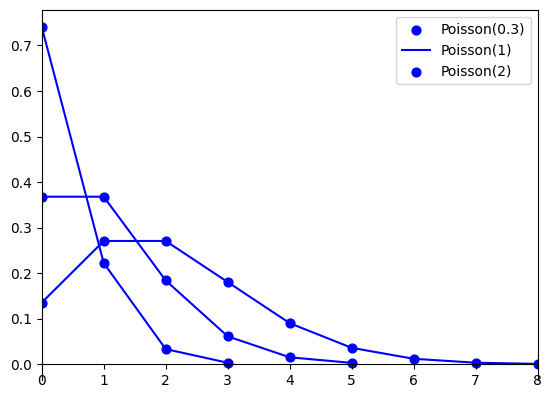

In [86]:
Poisson(0.3).plot()
Poisson(1).plot()
Poisson(2).plot()
plt.legend(['Poisson(0.3)', 'Poisson(1)', 'Poisson(2)']);
plt.show()

Simulate 10000 values using a Poisson distribution with rate 0.3:

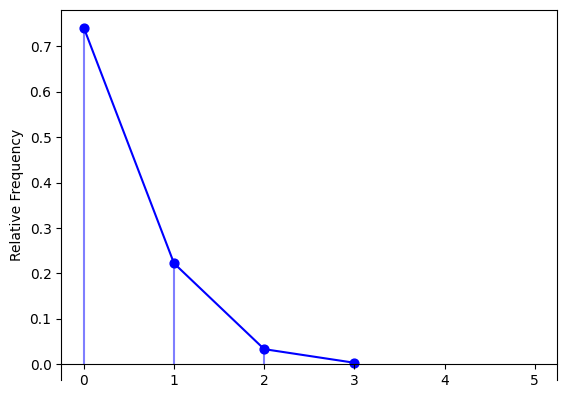

In [87]:
X = RV(Poisson(0.3))

x = X.sim(10000)

x.plot('impulse')

Poisson(0.3).plot()

plt.show()

Display the relative frequencies:

In [88]:
x.tabulate(normalize = True)

Value Relative Frequency
0     0.743
1     0.2163
2     0.0365
3     0.0035
4     0.0006
5     0.0001
Total 1.0

Find the probability of the value 0:

In [89]:
x.count_eq(0) / 10000, Poisson(0.3).pmf(0)

(0.743, np.float64(0.7408182206817179))

Find the probability of getting a value less than or equal to 2:

In [90]:
x.count_leq(2) / 10000, Poisson(0.3).cdf(2)

(0.9958, np.float64(0.9964005068169105))

Find the mean:

In [91]:
x.mean(), Poisson(0.3).mean()

(0.3027, np.float64(0.3))

Find the variance:

In [92]:
x.var(), Poisson(0.3).var()

(0.31427271, np.float64(0.3))

Compare binomial and Poisson distributions:

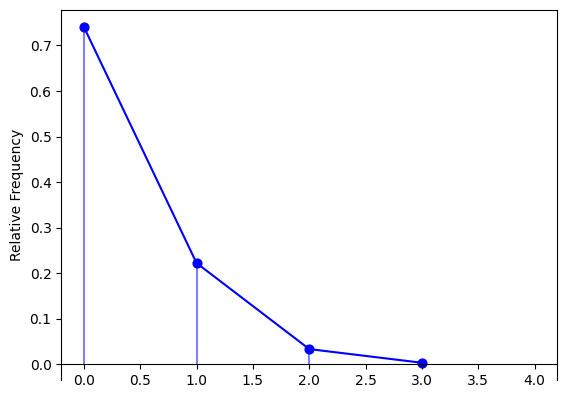

In [93]:
RV(Binomial(2000, 0.00015)).sim(10000).plot('impulse')

Poisson(0.3).plot()

plt.show()

Compare sum of Poisson squared with lambda=1 to Poisson distribution with lambda=2:

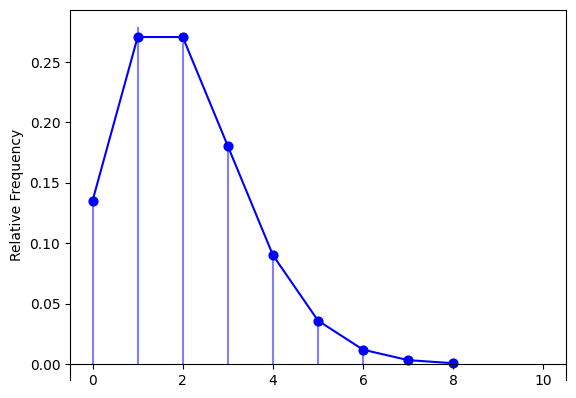

In [94]:
X1, X2 = RV(Poisson(1) ** 2)
X = X1 + X2

X.sim(10000).plot()

Poisson(2).plot()
plt.show()

Display conditional distribution given sum = 2:

In [95]:
X, Y = RV(Poisson(1) * Poisson(2))

x_given_Zeq2 = (X | (X + Y == 2)).sim(10000)

x_given_Zeq2.tabulate()

Value Frequency
0     4468
1     4415
2     1117
Total 10000

Find the mean:

In [96]:
x_given_Zeq2.mean()

0.6649

Plot the conditional distribution compared to the binomial distribution:

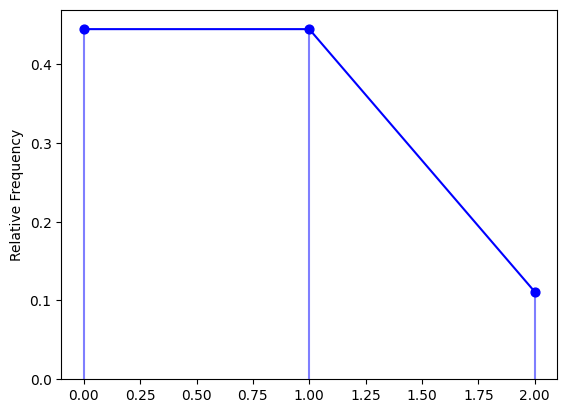

In [97]:
x_given_Zeq2.plot()

Binomial(2, 1 / 3).plot()
plt.show()

#### 6.4.1 Poisson approximation

Simulate the number of matches with 10 shuffled items, and compare to a Poisson distribution with parameter 1:

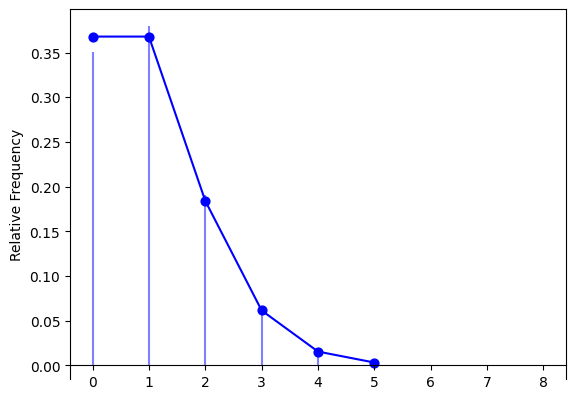

In [98]:
n = 10
labels = list(range(n))

def count_matches(x):
    count = 0
    for i in range(0, n, 1):
        if x[i] == labels[i]:
            count += 1
    return count

P = BoxModel(labels, size = n, replace = False)

Y = RV(P, count_matches)

y = Y.sim(10000)

y.plot()

Poisson(1).plot()
plt.show()

Summarize the values:

In [99]:
y.tabulate(normalize = True)

Value Relative Frequency
0     0.3502
1     0.3795
2     0.1905
3     0.0596
4     0.0157
5     0.0036
6     0.0008
8     0.0001
Total 1.0

Compare a Poisson distribution to the binomial for the birthday problem, with 35 people:

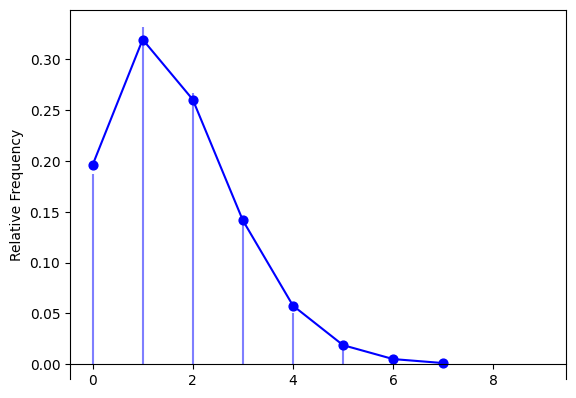

In [100]:
import itertools

def count_matching_pairs(outcome):
    return sum([1 for i in itertools.combinations(outcome, 2) if len(set(i)) == 1])

n = 35

P = BoxModel(list(range(365)), size = n, replace = True)

X = RV(P, count_matching_pairs)

X.sim(10000).plot()

import scipy
mu = scipy.special.binom(n, 2) / 365

Poisson(mu).plot()
plt.show()

### 7.1 Exponential distributions

Simulate 10000 values using the exponential distribution:

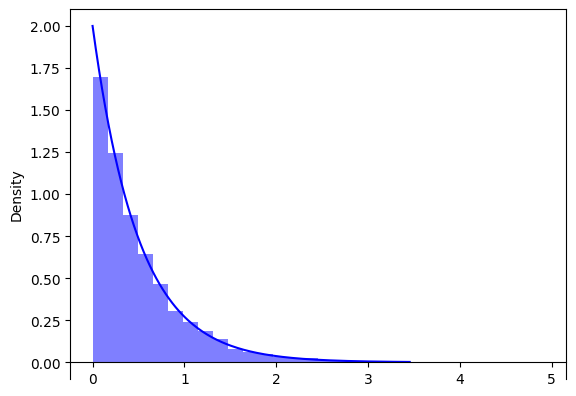

In [101]:
X = RV(Exponential(rate = 2))

x = X.sim(10000)

x.plot()

Exponential(rate = 2).plot()
plt.show()

Find the probability of getting a value less than or equal to 3:

In [102]:
x.count_leq(3) / 10000, Exponential(rate = 2).cdf(3)

(0.9977, np.float64(0.9975212478233336))

Calculate the mean:

In [103]:
x.mean(), Exponential(rate = 2).mean()

(0.5013134930260362, np.float64(0.5))

Calculate the variance:

In [104]:
x.var(), Exponential(rate = 2).var()

(0.2514085947259645, np.float64(0.25))

Compare distributions with different rates:

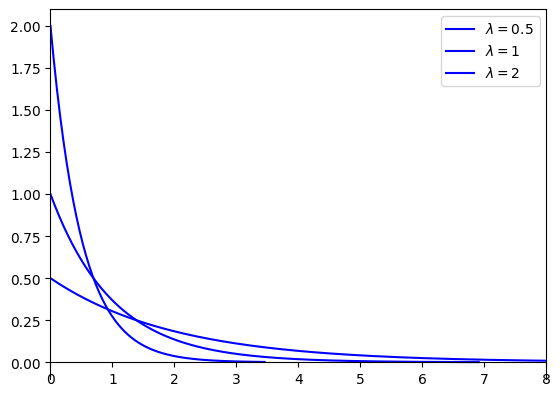

In [106]:
plt.figure()
rates = [0.5, 1, 2]
for rate in rates:
    Exponential(rate).plot()
    
plt.legend(['$\\lambda=$' + str(i) for i in rates]);
plt.xlim(0, 8);
plt.show()

Calculate a joint distribution with transformations:

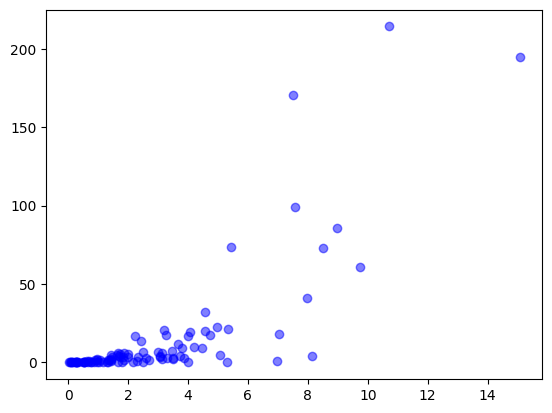

In [107]:
U1, U2 = RV(Exponential(1) ** 2)

X = 3 * U1
Y = X ** 2 * U2

(X & Y).sim(100).plot()
plt.show()

Find the covariance:

In [108]:
(X & Y).sim(10000).cov()

np.float64(113.53509612221664)

Plot 10000 values for Y:

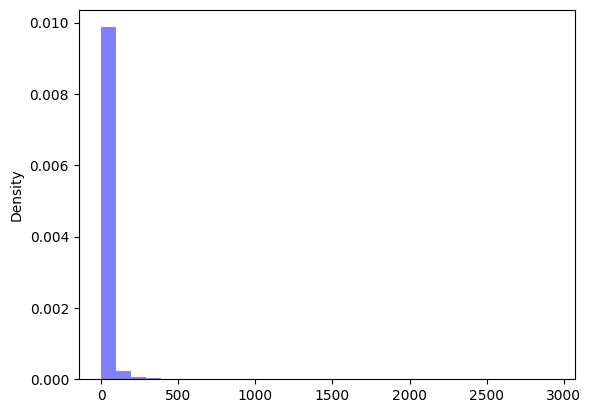

In [109]:
y = Y.sim(10000)

y.plot()
plt.show()

Find the mean and standard deviation of Y:

In [110]:
y.mean(), y.sd()

(17.39354833009333, 58.89223071266936)

Demonstrate the memoryless property:

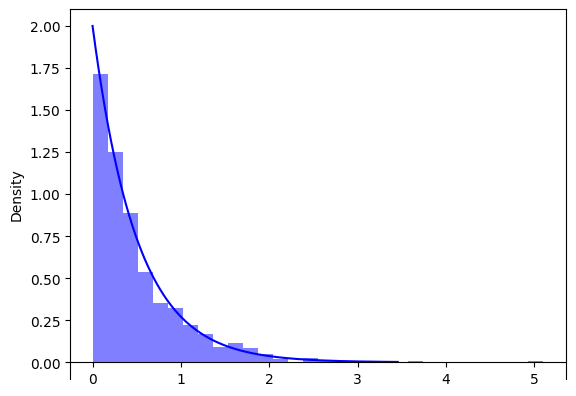

In [111]:
X = RV(Exponential(rate = 2))

( (X - 3) | (X > 3) ).sim(1000).plot()
Exponential(rate = 2).plot()
plt.show()

#### 7.1.2 Exponential race

Simulate and plot first arrival times:

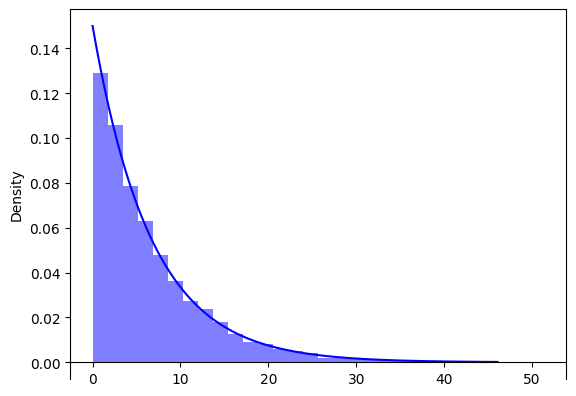

In [112]:
X, Y = RV(Exponential(rate = 1 / 10 ) * Exponential(rate = 1 / 20))

W = (X & Y).apply(min)

(X & Y & W).sim(5)

w = W.sim(10000)
w.plot()

Exponential(rate = 1 / 10 + 1 / 20).plot()
plt.show()

Find the mean and standard deviation:

In [113]:
w.mean(), w.sd()

(6.612948241332677, 6.505250701639112)

Find when Rogelio arrives later:

In [115]:
(Y > X).sim(10000).tabulate(normalize = True)

Outcome Relative Frequency
False   0.3443
True    0.6557
  Total 1.0

#### 7.1.3 Gamma distributions

Define and simulate a gamma distribution using three exponential random variables:

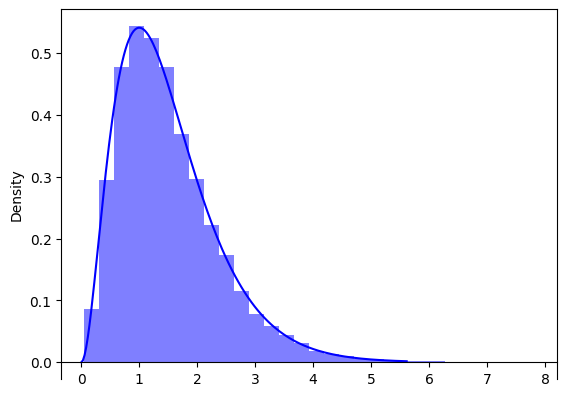

In [117]:
W1, W2, W3 = RV(Exponential(rate = 2) ** 3)

T = W1 + W2 + W3

T.sim(10000).plot()

Gamma(3, rate = 2).plot()
plt.show()

### 7.2 Normal distributions

Plot 100 values using a standard normal distribution:

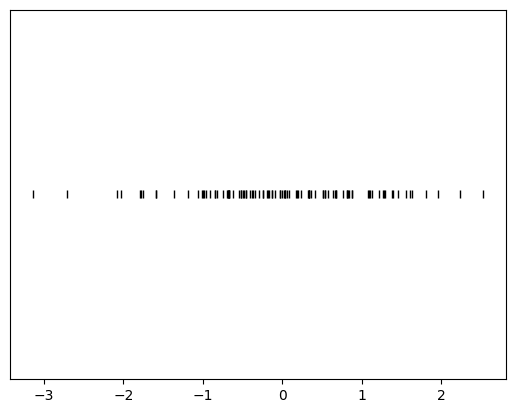

In [118]:
Z = RV(Normal())

Z.sim(100).plot('rug')
plt.show()

Plot 10000 values:

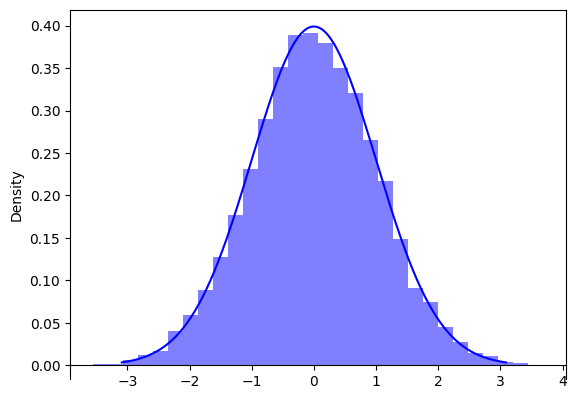

In [119]:
z = Z.sim(10000)

z.plot()

Normal().plot()
plt.show()

Find the mean and standard distribution:

In [120]:
z.mean(), z.sd()

(0.0018469728788004269, 1.0152151532536136)

Find the probability of values being between -1 and 1.5:

In [121]:
Normal().cdf(-1), Normal().cdf(1.5)

(np.float64(0.15865525393145707), np.float64(0.9331927987311419))

Calculate quantiles:

In [122]:
Normal().quantile(0.31), Normal().quantile(0.975)

(np.float64(-0.4958503473474533), np.float64(1.959963984540054))

Define and simulate joint normal distributions, and find the minimum of the absolute difference:

In [123]:
X, Y = RV(Normal(mean = 30, sd = 17) * Normal(mean = 30, sd = 17))

W = abs(X - Y)

T = (X & Y).apply(min)

Simulate and plot the absolute difference

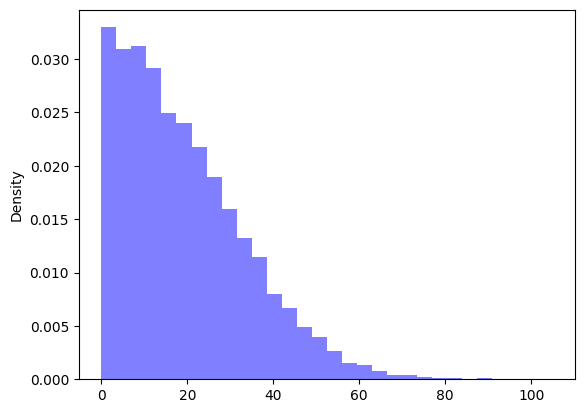

In [124]:
w = W.sim(10000)

plt.figure()
w.plot()
plt.show()

Find the mean, standard deviation, and relative frequency of values greater than 15:

In [125]:
w.mean(), w.sd(), w.count_gt(15) / w.count()

(19.388799501031293, 14.503725009346832, 0.5376)

Simulate and plot the minimum absolute difference:

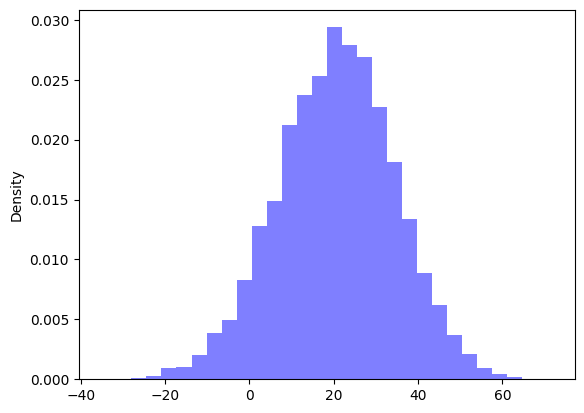

In [126]:
t = T.sim(10000)

plt.figure()
t.plot()
plt.show()

Find the mean, standard deviation, and relative frequency of values less than 15:

In [127]:
t.mean(), t.sd(), t.count_lt(15) / w.count()

(20.5335732506636, 13.936444198966935, 0.3412)

### 7.3 Bivariate Normal distributions

Simulate two random variables using a bivariate normal distribution, and plot along with the marginal distributions:

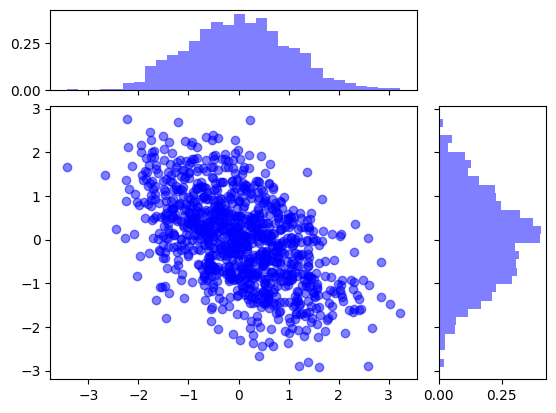

In [128]:
X,Y = RV(BivariateNormal(mean1 = 0, mean2 = 0, sd1 = 1, sd2 = 1, corr = -0.5))

(X & Y).sim(1000).plot(['scatter', 'marginal'])
plt.show()

Verify that conditional distributions with any conditioning are also normal:

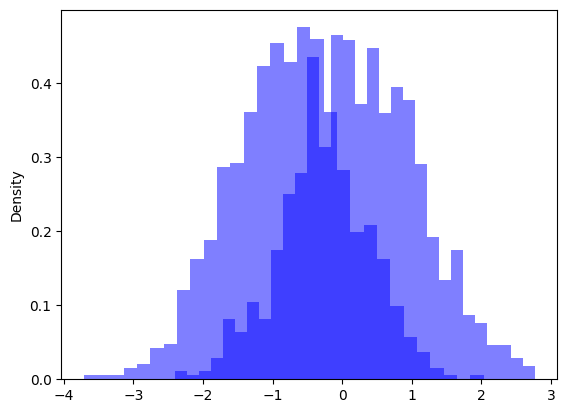

In [129]:
(Y | (abs(X - 1.5) < 0.1) ).sim(1000).plot()
(Y | (abs(X - (-0.5)) < 0.1) ).sim(1000).plot()
plt.show()

Verify that summing two random variables with normal distributions also creates a normal distribution:

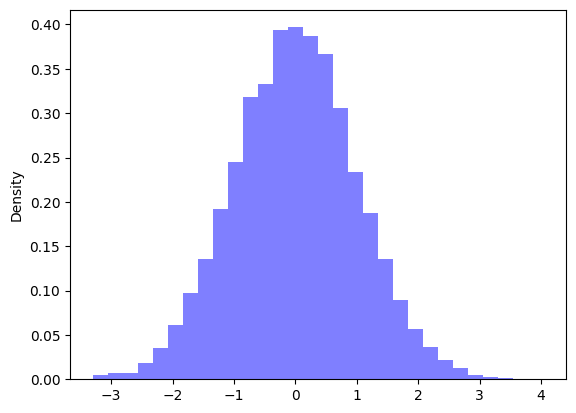

In [130]:
(X + Y).sim(10000).plot()
plt.show()

Simulate SAT scores:

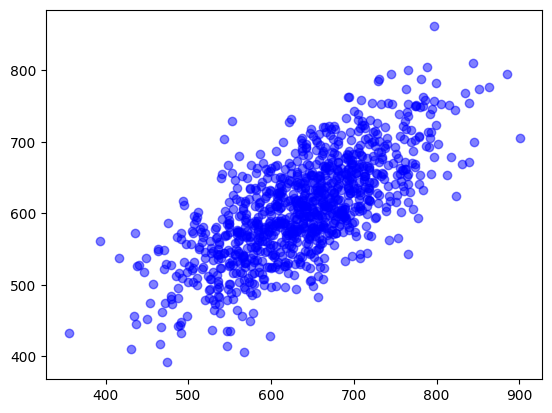

In [131]:
M, R = RV(BivariateNormal(mean1 = 640, sd1 = 80, mean2 = 610, sd2 = 70, corr = 0.7))

(M & R).sim(1000).plot()
plt.show()